# Programming Assignment 2
# CSCI-5930 ML Spring 2019
# Author: Amit Hulandageri

In [ ]:
import numpy as np
import cv2
import imageio
import glob
from numpy import linalg as LA
from scipy.io import loadmat
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from PIL import Image
np.set_printoptions(suppress=True)

# Step 1: Reading the Data

In [2]:
#Load the data
metaData = loadmat("wiki_labeled.mat",squeeze_me=True, struct_as_record=True)

#converting data to dataframe
Data=pd.DataFrame(data=metaData['wiki_labeled']['ID'].item(0),columns=['ID'],index=None)
Data['full_path']=metaData['wiki_labeled']['full_path'].item(0)
Data['age']=metaData['wiki_labeled']['age'].item(0)
Data.head()

,ID,full_path,age
0,2002,17/10000217_1981-05-05_2009.png,27.746119
1,2003,12/100012_1948-07-03_2008.png,59.582192
2,2004,65/10001965_1930-05-23_1961.png,30.696804
3,2005,16/10002116_1971-05-31_2012.png,40.672146
4,2006,02/10002702_1960-11-09_2012.png,51.224201


# Step 2: Splitting the data into training and test data

In [3]:
train, test = train_test_split(Data, test_size=0.2)

In [4]:
#accessing the images and storing in matrix
train_matrix=np.zeros((train.shape[0],10000))
test_matrix=np.zeros((test.shape[0],10000))
path_train=train['full_path']
path_test=test['full_path']
folders = ('C:/Users/amith/Desktop/ML/Assignments/2/wiki_labeled/wiki_labeled/')

In [5]:
#creating a matrix for training data
for matIndex in range(0,train.shape[0]):
    if (path_train.values[matIndex].find(':')==-1):
        file=folders+path_train.values[matIndex]
        im = cv2.imread(file,0)
        train_matrix[matIndex,:]=im.reshape(1,10000)
    else:
        path_train.values[matIndex]=path_train.values[matIndex].replace(":","_")
        file=folders+path_train.values[matIndex]
        im = cv2.imread(file,0)
        train_matrix[matIndex,:]=im.reshape(1,10000)

In [6]:
#creating a matrix for testing data
for matIndex in range(0,test.shape[0]):
    if (path_test.values[matIndex].find(':')==-1):
        file=folders+path_test.values[matIndex]
        im = cv2.imread(file,0)
        test_matrix[matIndex,:]=im.reshape(1,10000)
    else:
        path_test.values[matIndex]=path_test.values[matIndex].replace(":","_")
        file=folders+path_test.values[matIndex]
        im = cv2.imread(file,0)
        test_matrix[matIndex,:]=im.reshape(1,10000)

# Step 3: Computing the Principal Components

In [7]:
# PCA: Step 3
afv=train_matrix.mean(0)
print("AFV",afv.shape)

AFV (10000,)


In [8]:
# PCA: Step 4
A=train_matrix-afv
print("A",A.shape)

A (48261, 10000)


In [9]:
# PCA: Step 5
C=(np.dot(A.T,A))/(train.shape[0]-1)
print("C",C.shape)

C (10000, 10000)


In [10]:
# PCA: Step 6
w, v = LA.eig(C)
print("Eigenvalues shape: ",w.shape)
print("Eigen Vectors shape: ",v.shape)

Eigenvalues shape:  (10000,)
Eigen Vectors shape:  (10000, 10000)


In [11]:
eig_pairs = [(np.abs(w[i]), v[:,i]) for i in range(len(w))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [12]:
eig_vec=np.zeros((10000,10000))
for i in range (0,10000):
    eig_vec[:,i]=eig_pairs[i][1]
eig_vec

array([[ 0.01190765, -0.01576099, -0.00692446, ...,  0.00054384,
        -0.00308754, -0.00438505],
       [ 0.01189603, -0.01575591, -0.00710448, ...,  0.00014529,
         0.0060781 ,  0.00481398],
       [ 0.0118842 , -0.01574936, -0.00728501, ..., -0.00111496,
        -0.00194433, -0.00095886],
       ...,
       [ 0.00909608, -0.00076134,  0.01747068, ..., -0.0027884 ,
        -0.00097367, -0.00004261],
       [ 0.00911329, -0.00098213,  0.01732339, ...,  0.0023824 ,
         0.00114654, -0.00010032],
       [ 0.00915053, -0.00117673,  0.01715913, ..., -0.00236813,
        -0.00047909,  0.00020971]])

# Step 4: Scree-plot

Text(0,0.5,'Eigenvalue')

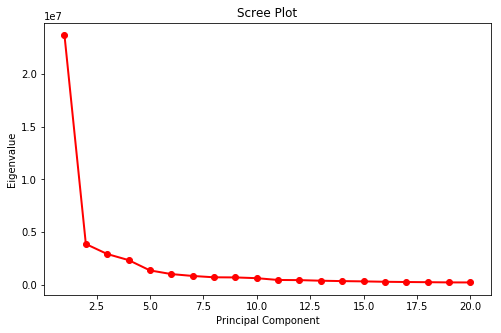

In [13]:
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(20) + 1
plt.plot(sing_vals, w[:20], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

In [14]:
k=15 # setting k value

# Step 5: Top 20 Ghosts

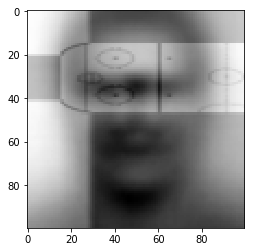

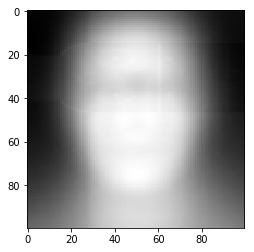

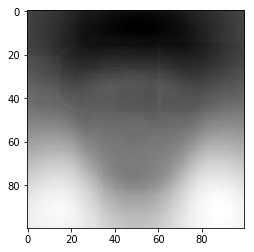

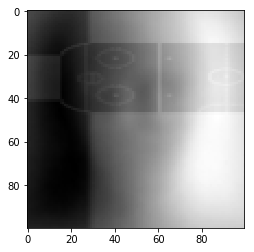

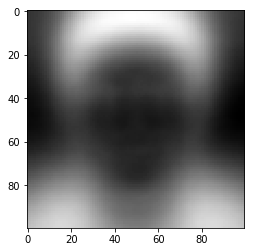

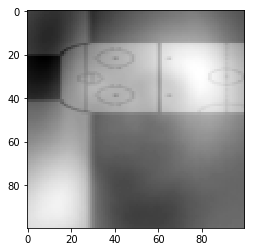

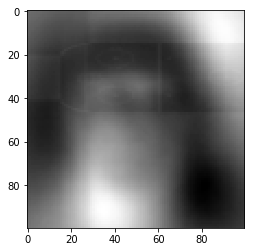

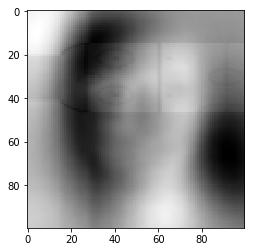

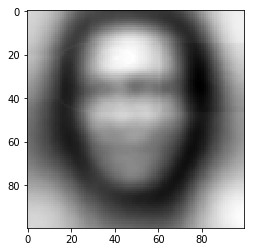

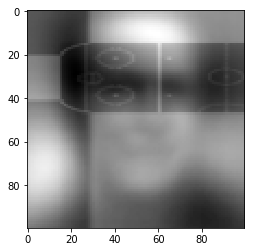

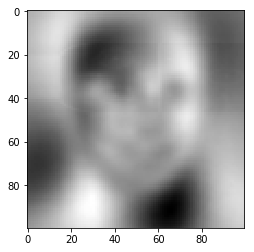

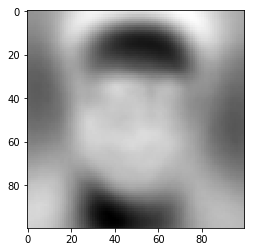

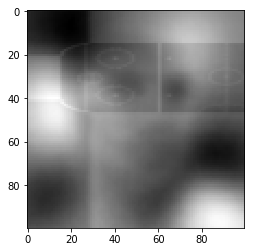

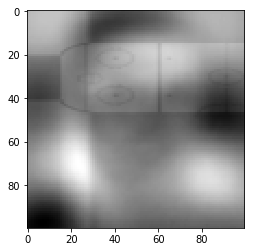

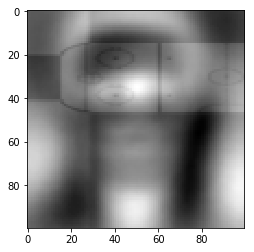

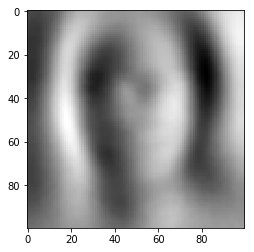

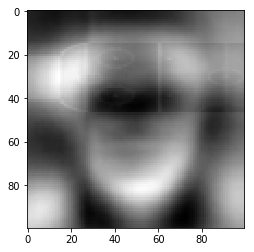

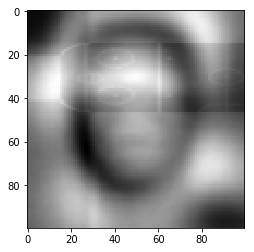

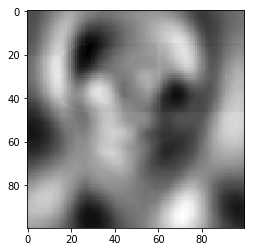

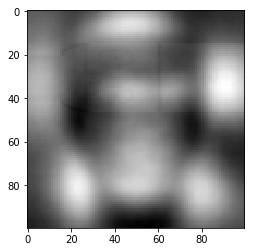

In [15]:
for i in range(0,20):
    plt.imshow(eig_vec[:,i].reshape(100,100), cmap='gray')
    plt.show()

# Step 6: Projecting Training and Test images onto the eigenfaces

In [16]:
X_train=np.dot(train_matrix,eig_vec.T[:,:k])

In [17]:
X_test=np.dot(test_matrix,eig_vec.T[:,:k])

In [18]:
X_train_max=X_train.max()
X_train_min=X_train.min()

X_test_max=X_test.max()
X_test_min=X_test.min()

# Normalizing the data

In [19]:
X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)

In [20]:
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)

# Step 7: Performing SGD

In [21]:
y_train = train['age']
y_train=y_train.tolist()
a=[]
for value in y_train:
    a.append([value])
a = np.asarray(a)
a.shape
y_train=a
y_train.shape

(48261, 1)

In [22]:
alpha=0.0001
iters=5
theta = np.zeros((1,X_train.shape[1]))

def computeCost(X,y,theta):
    h=np.dot(X,np.transpose(theta))
    tobesummed = np.power((h-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(train.shape[0])
    for i in range(iters):
        for m in range(0,train.shape[0]):
            h=np.dot(X,np.transpose(theta))
            error=h[m]-y[m]
            Y= alpha * error * (X[m,:])
            
            theta = theta - Y
            
            cost[m] = computeCost(X, y, theta)
            print(cost[m],m,"(",i,")")
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X_train,y_train,theta,iters,alpha)
print(g)
print(g.shape)

finalCost = computeCost(X_train,y_train,g)
print(finalCost)

898.0231295118753 0 ( 0 )
897.533264953015 1 ( 0 )
897.0369717758203 2 ( 0 )
896.1053404065336 3 ( 0 )
895.4646140072012 4 ( 0 )
894.4302918527432 5 ( 0 )
893.8254356856108 6 ( 0 )
893.4373917107397 7 ( 0 )
892.8614729869541 8 ( 0 )
892.306264079151 9 ( 0 )
891.8300370569425 10 ( 0 )
891.2316525777304 11 ( 0 )
890.0322575033587 12 ( 0 )
889.4911311697556 13 ( 0 )
889.0138886594785 14 ( 0 )
887.8500103490247 15 ( 0 )
887.4398416102093 16 ( 0 )
886.9189055778692 17 ( 0 )
885.4074808702928 18 ( 0 )
885.4142696842123 19 ( 0 )
885.0115205214074 20 ( 0 )
884.0473294227427 21 ( 0 )
883.4732387889869 22 ( 0 )
882.9381002699886 23 ( 0 )
881.7070836656702 24 ( 0 )
881.2385148515206 25 ( 0 )
880.9015036474106 26 ( 0 )
880.4260726904848 27 ( 0 )
879.9418337428075 28 ( 0 )
879.607104074541 29 ( 0 )
878.8410468945862 30 ( 0 )
878.4024251737311 31 ( 0 )
878.4103314341171 32 ( 0 )
877.987755672638 33 ( 0 )
877.6188834907094 34 ( 0 )
877.2627074737944 35 ( 0 )
876.1126808190113 36 ( 0 )
875.40169926994

723.8461059921342 326 ( 0 )
723.5222083661802 327 ( 0 )
723.1197917115625 328 ( 0 )
722.7782186435073 329 ( 0 )
722.4028114899393 330 ( 0 )
722.1678124042193 331 ( 0 )
721.9388934532752 332 ( 0 )
721.2985595207755 333 ( 0 )
720.8768942814539 334 ( 0 )
720.1532279108638 335 ( 0 )
719.8921630455843 336 ( 0 )
719.6148449373999 337 ( 0 )
719.3146307209918 338 ( 0 )
719.050120711816 339 ( 0 )
718.8023289684656 340 ( 0 )
718.4048768982598 341 ( 0 )
718.1604956085149 342 ( 0 )
717.8074697136962 343 ( 0 )
717.5189359396019 344 ( 0 )
717.2405715043668 345 ( 0 )
716.9619123138775 346 ( 0 )
716.7065704440748 347 ( 0 )
716.0399197902564 348 ( 0 )
715.5869305631836 349 ( 0 )
714.5648725885537 350 ( 0 )
714.0640706481072 351 ( 0 )
713.4928035677315 352 ( 0 )
713.0849751005345 353 ( 0 )
712.6954985492054 354 ( 0 )
712.4154607517962 355 ( 0 )
712.1283597411264 356 ( 0 )
710.6881685345882 357 ( 0 )
710.1205029632904 358 ( 0 )
709.4809619459776 359 ( 0 )
709.1852911218652 360 ( 0 )
708.8960322849365 361

599.4816004743744 625 ( 0 )
598.9662833850934 626 ( 0 )
598.7592975921483 627 ( 0 )
598.0517237020974 628 ( 0 )
597.6391375860223 629 ( 0 )
597.4851832124352 630 ( 0 )
597.6185073085047 631 ( 0 )
597.4988706066207 632 ( 0 )
597.2630591447789 633 ( 0 )
597.0657549969034 634 ( 0 )
595.9184963034016 635 ( 0 )
595.6277127270743 636 ( 0 )
595.1107764979064 637 ( 0 )
594.7767520338216 638 ( 0 )
594.4226972945578 639 ( 0 )
593.7748253060726 640 ( 0 )
593.5998495953098 641 ( 0 )
593.4291008148734 642 ( 0 )
593.2563190419578 643 ( 0 )
593.1381169884068 644 ( 0 )
592.9435616031756 645 ( 0 )
592.0991140684678 646 ( 0 )
591.9314146423029 647 ( 0 )
591.7863795993867 648 ( 0 )
591.3824347276447 649 ( 0 )
591.0148636917389 650 ( 0 )
590.5963212781605 651 ( 0 )
590.478681330966 652 ( 0 )
590.3149694242687 653 ( 0 )
589.7378351673038 654 ( 0 )
589.3958564082203 655 ( 0 )
589.2876381370955 656 ( 0 )
589.148707668745 657 ( 0 )
588.9315574314558 658 ( 0 )
588.8059170285126 659 ( 0 )
588.5537430415279 660 

515.6028550990231 920 ( 0 )
515.2758845409817 921 ( 0 )
515.1570205406716 922 ( 0 )
515.0695151862066 923 ( 0 )
514.878292078071 924 ( 0 )
514.770419926591 925 ( 0 )
514.6182229068587 926 ( 0 )
514.4839128164101 927 ( 0 )
513.8976095825224 928 ( 0 )
513.4543631045618 929 ( 0 )
513.2789391085023 930 ( 0 )
512.8107961545396 931 ( 0 )
512.7497838187605 932 ( 0 )
512.6222631293845 933 ( 0 )
512.5238124722877 934 ( 0 )
512.3784665343165 935 ( 0 )
512.2604343077712 936 ( 0 )
512.1422950709891 937 ( 0 )
511.97990020099405 938 ( 0 )
511.858465214487 939 ( 0 )
511.69707444266976 940 ( 0 )
511.6721304956655 941 ( 0 )
511.4965593244663 942 ( 0 )
511.3932474247375 943 ( 0 )
511.2897593015936 944 ( 0 )
511.1019231567664 945 ( 0 )
510.6908628959216 946 ( 0 )
510.5347329464705 947 ( 0 )
510.224597139931 948 ( 0 )
510.10093582847566 949 ( 0 )
509.9625401625823 950 ( 0 )
509.81445738471325 951 ( 0 )
509.5678146093778 952 ( 0 )
509.0493165824261 953 ( 0 )
508.57233935102306 954 ( 0 )
508.07715908008555 

448.8046804738757 1215 ( 0 )
448.20959392897953 1216 ( 0 )
447.9046441148793 1217 ( 0 )
447.5063628464843 1218 ( 0 )
447.1144193665082 1219 ( 0 )
446.5150927254546 1220 ( 0 )
446.39276583936334 1221 ( 0 )
446.29386255567624 1222 ( 0 )
446.2200174341653 1223 ( 0 )
446.10732266757776 1224 ( 0 )
446.00902785395624 1225 ( 0 )
445.91412546488925 1226 ( 0 )
445.495247504744 1227 ( 0 )
445.39685726580916 1228 ( 0 )
445.0384010583814 1229 ( 0 )
444.572941769626 1230 ( 0 )
444.471418286061 1231 ( 0 )
443.9377261444352 1232 ( 0 )
443.7495300409799 1233 ( 0 )
443.54969959631103 1234 ( 0 )
443.3972365038498 1235 ( 0 )
443.2073748628915 1236 ( 0 )
442.82293415974146 1237 ( 0 )
442.5889491260242 1238 ( 0 )
442.4529470879041 1239 ( 0 )
442.08045171561616 1240 ( 0 )
442.013833151089 1241 ( 0 )
441.8661140724848 1242 ( 0 )
441.33278733828223 1243 ( 0 )
441.2807039717028 1244 ( 0 )
440.7142274090473 1245 ( 0 )
440.6719320831744 1246 ( 0 )
439.59346614076503 1247 ( 0 )
439.48853472705446 1248 ( 0 )
439.4

389.1937445795346 1525 ( 0 )
389.0827275657434 1526 ( 0 )
389.0138851470652 1527 ( 0 )
388.36076960550713 1528 ( 0 )
388.348372716263 1529 ( 0 )
388.36162634957975 1530 ( 0 )
388.142997238482 1531 ( 0 )
388.1347005846175 1532 ( 0 )
387.9943189546091 1533 ( 0 )
387.80975827377154 1534 ( 0 )
387.7887161531065 1535 ( 0 )
387.8363611074961 1536 ( 0 )
387.66999399146033 1537 ( 0 )
387.36669636717176 1538 ( 0 )
386.6101661933441 1539 ( 0 )
386.369383900147 1540 ( 0 )
386.25687882098833 1541 ( 0 )
386.1279479307655 1542 ( 0 )
385.8996237252924 1543 ( 0 )
385.85428454720386 1544 ( 0 )
385.7905341068666 1545 ( 0 )
385.3899339246908 1546 ( 0 )
385.04235355011195 1547 ( 0 )
384.75469260359387 1548 ( 0 )
384.54990994587155 1549 ( 0 )
384.448505840774 1550 ( 0 )
384.4058484168844 1551 ( 0 )
384.3814635294518 1552 ( 0 )
384.30339022729464 1553 ( 0 )
384.2689346966466 1554 ( 0 )
383.8778894377799 1555 ( 0 )
383.7153024733296 1556 ( 0 )
383.7167766443322 1557 ( 0 )
383.89121446911446 1558 ( 0 )
383.86

349.95025884263464 1844 ( 0 )
349.9400769092758 1845 ( 0 )
349.8767345590107 1846 ( 0 )
349.8353960044988 1847 ( 0 )
349.7557328741052 1848 ( 0 )
349.81621229479595 1849 ( 0 )
349.45546492824866 1850 ( 0 )
349.11463405683094 1851 ( 0 )
348.9875026310529 1852 ( 0 )
348.7666110948183 1853 ( 0 )
348.75817253961236 1854 ( 0 )
348.5942017310985 1855 ( 0 )
348.6105863661749 1856 ( 0 )
348.37308669081983 1857 ( 0 )
348.2089530186444 1858 ( 0 )
348.11105255074034 1859 ( 0 )
348.0553936209632 1860 ( 0 )
347.9028147664316 1861 ( 0 )
347.882771739387 1862 ( 0 )
347.7433620415498 1863 ( 0 )
347.6418478895621 1864 ( 0 )
347.3902338656046 1865 ( 0 )
347.14171996300956 1866 ( 0 )
346.9279328718162 1867 ( 0 )
346.7894200956885 1868 ( 0 )
346.7477655308872 1869 ( 0 )
346.7031203405224 1870 ( 0 )
346.7253911138236 1871 ( 0 )
346.7371855080105 1872 ( 0 )
346.7502071589149 1873 ( 0 )
346.69851914509877 1874 ( 0 )
346.63560673487325 1875 ( 0 )
346.4359922598611 1876 ( 0 )
346.19597774311205 1877 ( 0 )
346.

315.99724296958067 2154 ( 0 )
315.93874671355303 2155 ( 0 )
315.6397928566257 2156 ( 0 )
315.2418729042653 2157 ( 0 )
315.2211091939891 2158 ( 0 )
315.2183777178309 2159 ( 0 )
315.1128144060546 2160 ( 0 )
315.0760195756397 2161 ( 0 )
315.0547460644926 2162 ( 0 )
314.8378667013722 2163 ( 0 )
314.6690044569539 2164 ( 0 )
314.64874101610235 2165 ( 0 )
314.60755544803294 2166 ( 0 )
314.3177044075352 2167 ( 0 )
314.20407595477224 2168 ( 0 )
313.9639137198213 2169 ( 0 )
313.8847340323024 2170 ( 0 )
313.6186484719878 2171 ( 0 )
313.72335860921044 2172 ( 0 )
313.5909924772723 2173 ( 0 )
313.3424063849176 2174 ( 0 )
313.33711366992367 2175 ( 0 )
313.15885017098253 2176 ( 0 )
313.0479358668143 2177 ( 0 )
313.00124913367574 2178 ( 0 )
312.9887754505428 2179 ( 0 )
312.91101066625805 2180 ( 0 )
312.79025639967307 2181 ( 0 )
312.76350640018467 2182 ( 0 )
312.77600723254295 2183 ( 0 )
312.44711099237696 2184 ( 0 )
312.43386170109517 2185 ( 0 )
312.35167807742994 2186 ( 0 )
312.1170877128789 2187 ( 0 

294.2039581790323 2464 ( 0 )
294.1474725353593 2465 ( 0 )
294.15520749459813 2466 ( 0 )
294.1622079210996 2467 ( 0 )
293.89449936023885 2468 ( 0 )
293.91004118572846 2469 ( 0 )
293.91412990150627 2470 ( 0 )
293.925714776807 2471 ( 0 )
293.91784805179634 2472 ( 0 )
293.9597207713715 2473 ( 0 )
293.90278033177304 2474 ( 0 )
293.8825811530948 2475 ( 0 )
293.71365245234836 2476 ( 0 )
293.67892823533407 2477 ( 0 )
293.6529110383381 2478 ( 0 )
293.61296768520015 2479 ( 0 )
293.5979314960027 2480 ( 0 )
293.59287011420855 2481 ( 0 )
293.7440171437165 2482 ( 0 )
293.6305712349701 2483 ( 0 )
293.5214619236954 2484 ( 0 )
293.47319723755373 2485 ( 0 )
293.4528122716234 2486 ( 0 )
293.46172499195046 2487 ( 0 )
293.46759253548106 2488 ( 0 )
293.40047786920854 2489 ( 0 )
293.40970701082233 2490 ( 0 )
293.36990552734795 2491 ( 0 )
293.1713608643279 2492 ( 0 )
293.14462717506495 2493 ( 0 )
293.1678519527372 2494 ( 0 )
293.18148544538866 2495 ( 0 )
292.823656385117 2496 ( 0 )
292.868344865192 2497 ( 0 )

276.9549180679783 2753 ( 0 )
276.92178626411976 2754 ( 0 )
276.91028611147266 2755 ( 0 )
276.8636501534514 2756 ( 0 )
276.8635605721826 2757 ( 0 )
276.91128917241076 2758 ( 0 )
276.92605970007133 2759 ( 0 )
276.2702815084227 2760 ( 0 )
276.2717855684752 2761 ( 0 )
276.30343250182426 2762 ( 0 )
276.3139499501904 2763 ( 0 )
276.31923370917116 2764 ( 0 )
276.2353661404901 2765 ( 0 )
276.18785579883087 2766 ( 0 )
276.19320089324395 2767 ( 0 )
275.9219791825749 2768 ( 0 )
275.8849000150505 2769 ( 0 )
275.8604496544099 2770 ( 0 )
275.87988550541735 2771 ( 0 )
275.87225535514426 2772 ( 0 )
275.89121524273696 2773 ( 0 )
275.9202668954385 2774 ( 0 )
275.72969654256724 2775 ( 0 )
275.75172123847693 2776 ( 0 )
275.6670387291953 2777 ( 0 )
275.6014570218221 2778 ( 0 )
275.59874335969573 2779 ( 0 )
275.5920765750063 2780 ( 0 )
275.5423255454734 2781 ( 0 )
275.5524656426559 2782 ( 0 )
275.37761026348886 2783 ( 0 )
275.51550989103987 2784 ( 0 )
275.4425043366527 2785 ( 0 )
275.39696545604164 2786 ( 0

265.06742303303093 3042 ( 0 )
264.9993326923546 3043 ( 0 )
265.01366503442836 3044 ( 0 )
264.9837637875283 3045 ( 0 )
265.0225430584989 3046 ( 0 )
264.9909227448545 3047 ( 0 )
264.96430038626727 3048 ( 0 )
264.98439652295974 3049 ( 0 )
264.9730224677342 3050 ( 0 )
265.0077940203811 3051 ( 0 )
265.0375013555671 3052 ( 0 )
265.09702699671544 3053 ( 0 )
265.0101551466567 3054 ( 0 )
265.02603690302834 3055 ( 0 )
265.0351025467418 3056 ( 0 )
265.04627296757934 3057 ( 0 )
264.85534457733934 3058 ( 0 )
264.74142429852543 3059 ( 0 )
264.7705168088328 3060 ( 0 )
264.7471413365888 3061 ( 0 )
264.7705396435692 3062 ( 0 )
264.7582256467132 3063 ( 0 )
264.75680463301467 3064 ( 0 )
264.8841576679968 3065 ( 0 )
264.9165314671856 3066 ( 0 )
264.89462001291224 3067 ( 0 )
264.92388951419076 3068 ( 0 )
264.9267328225319 3069 ( 0 )
264.84404681476974 3070 ( 0 )
264.61201190655214 3071 ( 0 )
264.58993332653336 3072 ( 0 )
264.5852796756296 3073 ( 0 )
264.6341048758034 3074 ( 0 )
264.6381731879776 3075 ( 0 )

256.50034425320024 3356 ( 0 )
256.36142787115483 3357 ( 0 )
256.396339983631 3358 ( 0 )
256.40578403619685 3359 ( 0 )
256.0835607519957 3360 ( 0 )
256.07139316123846 3361 ( 0 )
256.1017040774541 3362 ( 0 )
256.0442297933816 3363 ( 0 )
255.98566987005466 3364 ( 0 )
255.82972806209003 3365 ( 0 )
255.84515277124154 3366 ( 0 )
255.8245945102789 3367 ( 0 )
255.81793669714983 3368 ( 0 )
255.84514954763677 3369 ( 0 )
255.49820893671955 3370 ( 0 )
255.44755073381455 3371 ( 0 )
255.42906678091524 3372 ( 0 )
255.51760152175302 3373 ( 0 )
255.5392345079539 3374 ( 0 )
255.4857305473884 3375 ( 0 )
255.36951638056817 3376 ( 0 )
255.37748472711488 3377 ( 0 )
255.41302529167916 3378 ( 0 )
255.42043551282376 3379 ( 0 )
255.4166552756793 3380 ( 0 )
255.40122293100782 3381 ( 0 )
255.45480668562473 3382 ( 0 )
255.33620791732758 3383 ( 0 )
255.36548564423174 3384 ( 0 )
255.31871501005082 3385 ( 0 )
255.33475896846306 3386 ( 0 )
255.35998509720582 3387 ( 0 )
255.39107001385764 3388 ( 0 )
255.39901672503 338

249.7269685564034 3634 ( 0 )
249.75098997241878 3635 ( 0 )
249.72012582438563 3636 ( 0 )
249.73990468890239 3637 ( 0 )
249.66004353478547 3638 ( 0 )
249.60792924673746 3639 ( 0 )
249.59730997995433 3640 ( 0 )
249.5424582047929 3641 ( 0 )
249.4988040794053 3642 ( 0 )
249.53258171937034 3643 ( 0 )
249.57583917440158 3644 ( 0 )
249.58710290753947 3645 ( 0 )
249.6299573097293 3646 ( 0 )
249.45676370581813 3647 ( 0 )
249.50305941568192 3648 ( 0 )
249.521011065992 3649 ( 0 )
249.47019756316934 3650 ( 0 )
249.30591376689253 3651 ( 0 )
249.32832995623468 3652 ( 0 )
249.2364605699323 3653 ( 0 )
249.13066060244694 3654 ( 0 )
249.12988949220093 3655 ( 0 )
248.93976596934385 3656 ( 0 )
248.8076131632057 3657 ( 0 )
248.7405149856208 3658 ( 0 )
248.75187755219866 3659 ( 0 )
248.7869100826694 3660 ( 0 )
248.8175991071655 3661 ( 0 )
248.813665169537 3662 ( 0 )
248.80293451646045 3663 ( 0 )
248.77266736390683 3664 ( 0 )
248.79004586744577 3665 ( 0 )
248.8049961413305 3666 ( 0 )
248.80784707799037 3667 

244.29380189234385 3941 ( 0 )
244.17490323015977 3942 ( 0 )
244.14650587533654 3943 ( 0 )
244.1700559461499 3944 ( 0 )
244.14051033537848 3945 ( 0 )
244.15431345171788 3946 ( 0 )
244.1700966710141 3947 ( 0 )
244.17573311136218 3948 ( 0 )
244.21565852718427 3949 ( 0 )
244.16775953859718 3950 ( 0 )
244.18574080558025 3951 ( 0 )
244.20902926511826 3952 ( 0 )
244.18408571083845 3953 ( 0 )
244.1605371736412 3954 ( 0 )
244.14083560682445 3955 ( 0 )
244.21450418573593 3956 ( 0 )
244.15274234586508 3957 ( 0 )
244.1782604949349 3958 ( 0 )
244.21208188891868 3959 ( 0 )
244.11864039103023 3960 ( 0 )
244.15199435464368 3961 ( 0 )
244.00474890201315 3962 ( 0 )
244.011064337729 3963 ( 0 )
244.03742296385408 3964 ( 0 )
244.0164720749295 3965 ( 0 )
244.03876603510315 3966 ( 0 )
244.05076839764234 3967 ( 0 )
244.01363088341705 3968 ( 0 )
244.02631009451272 3969 ( 0 )
244.023202170966 3970 ( 0 )
244.04270516430893 3971 ( 0 )
243.8844376452939 3972 ( 0 )
243.9072644905458 3973 ( 0 )
243.85304163742288 39

240.02278339887508 4254 ( 0 )
239.9269394993249 4255 ( 0 )
239.94056943981295 4256 ( 0 )
239.92616474423932 4257 ( 0 )
239.72415836147135 4258 ( 0 )
239.72464787544126 4259 ( 0 )
239.67879661917 4260 ( 0 )
239.70367726737925 4261 ( 0 )
239.7210743932355 4262 ( 0 )
239.68339035131154 4263 ( 0 )
239.64782813234717 4264 ( 0 )
239.65792313176033 4265 ( 0 )
239.67995429658686 4266 ( 0 )
239.67347869207893 4267 ( 0 )
239.71579988842817 4268 ( 0 )
239.68157485100647 4269 ( 0 )
239.69074722761235 4270 ( 0 )
239.65549420971485 4271 ( 0 )
239.6656531154329 4272 ( 0 )
239.68548035939386 4273 ( 0 )
239.63167378027632 4274 ( 0 )
239.64758659255637 4275 ( 0 )
239.6482345686031 4276 ( 0 )
239.6660982356476 4277 ( 0 )
239.66941159401853 4278 ( 0 )
239.69492097267874 4279 ( 0 )
239.72278104143652 4280 ( 0 )
239.73842283876368 4281 ( 0 )
239.76393975680486 4282 ( 0 )
239.76395190095624 4283 ( 0 )
239.65685954534973 4284 ( 0 )
239.35724499908648 4285 ( 0 )
239.302832632861 4286 ( 0 )
239.31839609399103 4

235.89385643491318 4564 ( 0 )
235.83215721831718 4565 ( 0 )
235.85458972371464 4566 ( 0 )
235.856772248743 4567 ( 0 )
235.83958858812892 4568 ( 0 )
235.79262874522664 4569 ( 0 )
235.7984147784711 4570 ( 0 )
235.8202114893927 4571 ( 0 )
235.82399598400892 4572 ( 0 )
235.84324658618598 4573 ( 0 )
235.83360330626334 4574 ( 0 )
235.80677987191464 4575 ( 0 )
235.82287399309598 4576 ( 0 )
235.8394001394476 4577 ( 0 )
235.85181667557694 4578 ( 0 )
235.8098844656 4579 ( 0 )
235.8299781777768 4580 ( 0 )
235.83954390683368 4581 ( 0 )
235.85950259052672 4582 ( 0 )
235.84827855361266 4583 ( 0 )
235.8265103316969 4584 ( 0 )
235.82535247567586 4585 ( 0 )
235.79578357895792 4586 ( 0 )
235.80291036181592 4587 ( 0 )
235.78979092852566 4588 ( 0 )
235.8104782226442 4589 ( 0 )
235.73290603519555 4590 ( 0 )
235.73507750917707 4591 ( 0 )
235.7593822057711 4592 ( 0 )
235.76430468146665 4593 ( 0 )
235.75051591540418 4594 ( 0 )
235.68218075046047 4595 ( 0 )
235.6237614421211 4596 ( 0 )
235.6183721546805 4597 (

232.31340194571172 4867 ( 0 )
232.32043905055224 4868 ( 0 )
232.33175895487932 4869 ( 0 )
232.25188484213953 4870 ( 0 )
232.2445825286187 4871 ( 0 )
232.2630806149897 4872 ( 0 )
232.2842424952391 4873 ( 0 )
232.22317920575134 4874 ( 0 )
232.18687337034163 4875 ( 0 )
232.1989488516318 4876 ( 0 )
232.19193168928194 4877 ( 0 )
232.1137951961896 4878 ( 0 )
232.05592303128967 4879 ( 0 )
232.1162777900978 4880 ( 0 )
232.08843543022365 4881 ( 0 )
232.06866858486066 4882 ( 0 )
231.99629738187016 4883 ( 0 )
232.01103704272418 4884 ( 0 )
232.02059513102338 4885 ( 0 )
232.03643472505112 4886 ( 0 )
232.05022731119178 4887 ( 0 )
231.98466366820145 4888 ( 0 )
231.945772701879 4889 ( 0 )
231.94999386070944 4890 ( 0 )
231.92171803879816 4891 ( 0 )
231.87715408321063 4892 ( 0 )
231.8607420885533 4893 ( 0 )
231.90093664521007 4894 ( 0 )
231.91112688719753 4895 ( 0 )
231.89040359906528 4896 ( 0 )
231.9097756155401 4897 ( 0 )
231.86613027624023 4898 ( 0 )
231.88585916343177 4899 ( 0 )
231.88102815464023 4

231.13422908326763 5170 ( 0 )
231.15096011577302 5171 ( 0 )
231.16616354170642 5172 ( 0 )
231.16990968322025 5173 ( 0 )
231.18044084522143 5174 ( 0 )
231.17789887864234 5175 ( 0 )
231.12822611272392 5176 ( 0 )
231.09614385191549 5177 ( 0 )
231.04652927920495 5178 ( 0 )
231.04603686702578 5179 ( 0 )
231.0639005750233 5180 ( 0 )
231.0329141010665 5181 ( 0 )
231.04267182454163 5182 ( 0 )
231.05584228201405 5183 ( 0 )
231.05973638095654 5184 ( 0 )
231.0738036316711 5185 ( 0 )
231.05851696005206 5186 ( 0 )
231.03331852257685 5187 ( 0 )
231.01397751448047 5188 ( 0 )
230.99632296443198 5189 ( 0 )
231.02563113731875 5190 ( 0 )
231.01428479601103 5191 ( 0 )
230.99138646756913 5192 ( 0 )
231.0033675845587 5193 ( 0 )
230.95382693956907 5194 ( 0 )
230.96484338042598 5195 ( 0 )
230.9822667074889 5196 ( 0 )
230.97433273029577 5197 ( 0 )
230.99085553043574 5198 ( 0 )
230.94254472718853 5199 ( 0 )
230.95714439965028 5200 ( 0 )
230.97312981177137 5201 ( 0 )
230.92604607159197 5202 ( 0 )
230.93629036993

229.97785808281284 5477 ( 0 )
229.9663705654483 5478 ( 0 )
229.9701848002506 5479 ( 0 )
229.98310152577096 5480 ( 0 )
229.99355989852342 5481 ( 0 )
230.0119930895444 5482 ( 0 )
229.99125800395416 5483 ( 0 )
229.97885341082332 5484 ( 0 )
229.98764553865553 5485 ( 0 )
230.0060380610756 5486 ( 0 )
229.95906640076035 5487 ( 0 )
229.9827500176102 5488 ( 0 )
229.99353488261693 5489 ( 0 )
229.96104648199335 5490 ( 0 )
229.91458938008384 5491 ( 0 )
229.9274840106886 5492 ( 0 )
229.945321734145 5493 ( 0 )
229.95790104225912 5494 ( 0 )
229.88573898815375 5495 ( 0 )
229.91509648089516 5496 ( 0 )
229.91801958905313 5497 ( 0 )
229.9480211708174 5498 ( 0 )
229.9395288863098 5499 ( 0 )
229.9335603647144 5500 ( 0 )
229.9340496131067 5501 ( 0 )
229.94702096906104 5502 ( 0 )
229.9539917504897 5503 ( 0 )
229.9358453706092 5504 ( 0 )
229.9430503885073 5505 ( 0 )
229.92725859380838 5506 ( 0 )
229.91818675072415 5507 ( 0 )
229.92564261663807 5508 ( 0 )
229.947317823483 5509 ( 0 )
229.95113520564914 5510 ( 0

228.50221162361134 5792 ( 0 )
228.49561998317324 5793 ( 0 )
228.50285987991424 5794 ( 0 )
228.51566500569825 5795 ( 0 )
228.51527729081081 5796 ( 0 )
228.497990292867 5797 ( 0 )
228.50441557357303 5798 ( 0 )
228.513181503035 5799 ( 0 )
228.50076809805913 5800 ( 0 )
228.500061722108 5801 ( 0 )
228.49925384700524 5802 ( 0 )
228.47144796295382 5803 ( 0 )
228.446532060794 5804 ( 0 )
228.4545249204466 5805 ( 0 )
228.4685556927507 5806 ( 0 )
228.4731911011784 5807 ( 0 )
228.4864369785077 5808 ( 0 )
228.46799203638 5809 ( 0 )
228.47594341521025 5810 ( 0 )
228.45202358226805 5811 ( 0 )
228.45897323404174 5812 ( 0 )
228.4689598139797 5813 ( 0 )
228.47105359882275 5814 ( 0 )
228.48359891469553 5815 ( 0 )
228.48223082384834 5816 ( 0 )
228.44834017754505 5817 ( 0 )
228.4118435318351 5818 ( 0 )
228.4213021975861 5819 ( 0 )
228.4312860918902 5820 ( 0 )
228.44435728455613 5821 ( 0 )
228.42502226619362 5822 ( 0 )
228.4225875758164 5823 ( 0 )
228.41861553300612 5824 ( 0 )
228.3970537416557 5825 ( 0 )
2

227.71668052479723 6119 ( 0 )
227.72171955085554 6120 ( 0 )
227.72523986219 6121 ( 0 )
227.7274924330081 6122 ( 0 )
227.732363263612 6123 ( 0 )
227.74167252040783 6124 ( 0 )
227.7391116265831 6125 ( 0 )
227.74500382017655 6126 ( 0 )
227.7177914804898 6127 ( 0 )
227.71437631722364 6128 ( 0 )
227.71702510114008 6129 ( 0 )
227.7443322063872 6130 ( 0 )
227.72178682981124 6131 ( 0 )
227.72069904476072 6132 ( 0 )
227.7217236916741 6133 ( 0 )
227.7293379877417 6134 ( 0 )
227.74385058303204 6135 ( 0 )
227.73433559034163 6136 ( 0 )
227.7431679462966 6137 ( 0 )
227.73405084816636 6138 ( 0 )
227.74288645808244 6139 ( 0 )
227.74755147342097 6140 ( 0 )
227.75687741358743 6141 ( 0 )
227.735771081515 6142 ( 0 )
227.74380903198917 6143 ( 0 )
227.74779966122978 6144 ( 0 )
227.75943912749017 6145 ( 0 )
227.76724436001754 6146 ( 0 )
227.77495946303324 6147 ( 0 )
227.76306934402967 6148 ( 0 )
227.75141207933177 6149 ( 0 )
227.71272212925757 6150 ( 0 )
227.71937265370704 6151 ( 0 )
227.7329322970043 6152 (

227.1372694668222 6430 ( 0 )
227.12671948385778 6431 ( 0 )
227.10732103374292 6432 ( 0 )
227.07836262558487 6433 ( 0 )
227.06919026163632 6434 ( 0 )
227.07207428530836 6435 ( 0 )
227.05015723735826 6436 ( 0 )
227.04755843054986 6437 ( 0 )
227.0460738256127 6438 ( 0 )
227.05795192732987 6439 ( 0 )
227.0619602529262 6440 ( 0 )
227.03656847941522 6441 ( 0 )
227.04009512187915 6442 ( 0 )
227.02496457107168 6443 ( 0 )
227.0323941838583 6444 ( 0 )
227.03919242701582 6445 ( 0 )
227.04131315950826 6446 ( 0 )
227.0471161504054 6447 ( 0 )
227.0558527096559 6448 ( 0 )
227.05677458882334 6449 ( 0 )
227.0644704486006 6450 ( 0 )
227.02382359284618 6451 ( 0 )
227.02701244225193 6452 ( 0 )
227.04035365853778 6453 ( 0 )
227.0451585798442 6454 ( 0 )
227.03074522931672 6455 ( 0 )
227.03390869803255 6456 ( 0 )
227.041744808034 6457 ( 0 )
227.02997291730458 6458 ( 0 )
227.0246781886463 6459 ( 0 )
227.0176548390334 6460 ( 0 )
226.98445279625673 6461 ( 0 )
226.99506249840994 6462 ( 0 )
227.00369016886876 646

226.6878220594381 6713 ( 0 )
226.6950151466921 6714 ( 0 )
226.68658033728505 6715 ( 0 )
226.66444371859833 6716 ( 0 )
226.63261092697144 6717 ( 0 )
226.6254852474146 6718 ( 0 )
226.62518356398783 6719 ( 0 )
226.60670448807917 6720 ( 0 )
226.59599575300516 6721 ( 0 )
226.60577184973616 6722 ( 0 )
226.6005364144365 6723 ( 0 )
226.6068607205424 6724 ( 0 )
226.60299371815108 6725 ( 0 )
226.60782380870216 6726 ( 0 )
226.61504658302624 6727 ( 0 )
226.61967604355354 6728 ( 0 )
226.6105789017481 6729 ( 0 )
226.6115294136712 6730 ( 0 )
226.61847174811314 6731 ( 0 )
226.64167564135795 6732 ( 0 )
226.45276989678484 6733 ( 0 )
226.45780354417653 6734 ( 0 )
226.46636723971463 6735 ( 0 )
226.46614426198641 6736 ( 0 )
226.48721092777987 6737 ( 0 )
226.4867818512596 6738 ( 0 )
226.49078319378953 6739 ( 0 )
226.49914962906394 6740 ( 0 )
226.50156673367056 6741 ( 0 )
226.51084941159638 6742 ( 0 )
226.4946495437124 6743 ( 0 )
226.45140980142742 6744 ( 0 )
226.45794356485774 6745 ( 0 )
226.46121478135925 

226.57078137823083 7031 ( 0 )
226.57762852873296 7032 ( 0 )
226.58020780247526 7033 ( 0 )
226.58292073054045 7034 ( 0 )
226.55394526342158 7035 ( 0 )
226.55833743380862 7036 ( 0 )
226.55301718463588 7037 ( 0 )
226.5753843493928 7038 ( 0 )
226.5811065950227 7039 ( 0 )
226.58596465992363 7040 ( 0 )
226.59180141403527 7041 ( 0 )
226.58295454768188 7042 ( 0 )
226.57312809585449 7043 ( 0 )
226.57526774167476 7044 ( 0 )
226.5830998475757 7045 ( 0 )
226.58876770109552 7046 ( 0 )
226.59452276631714 7047 ( 0 )
226.56124375763756 7048 ( 0 )
226.56554400202032 7049 ( 0 )
226.56078693640438 7050 ( 0 )
226.56612290185456 7051 ( 0 )
226.57300805089176 7052 ( 0 )
226.57615656374085 7053 ( 0 )
226.55841315265445 7054 ( 0 )
226.56614661692797 7055 ( 0 )
226.5587777422157 7056 ( 0 )
226.540075170208 7057 ( 0 )
226.54313904569946 7058 ( 0 )
226.53273869846268 7059 ( 0 )
226.52353329116772 7060 ( 0 )
226.51570869365685 7061 ( 0 )
226.5261663709612 7062 ( 0 )
226.5058593623693 7063 ( 0 )
226.50031289487924

226.46074013544623 7322 ( 0 )
226.4627726840392 7323 ( 0 )
226.44380393742537 7324 ( 0 )
226.43361692513142 7325 ( 0 )
226.43607538765608 7326 ( 0 )
226.42912488159533 7327 ( 0 )
226.4275335428663 7328 ( 0 )
226.43182546520282 7329 ( 0 )
226.42892603636662 7330 ( 0 )
226.43407238542846 7331 ( 0 )
226.440184809197 7332 ( 0 )
226.44352789476787 7333 ( 0 )
226.45105906339893 7334 ( 0 )
226.44965489269194 7335 ( 0 )
226.45607331180796 7336 ( 0 )
226.44641488635926 7337 ( 0 )
226.45111801313286 7338 ( 0 )
226.44167532441682 7339 ( 0 )
226.43847847026032 7340 ( 0 )
226.44753627330252 7341 ( 0 )
226.45484296655354 7342 ( 0 )
226.45564878910415 7343 ( 0 )
226.4528790054448 7344 ( 0 )
226.45474421734622 7345 ( 0 )
226.46483536992258 7346 ( 0 )
226.46374648394274 7347 ( 0 )
226.4682874956632 7348 ( 0 )
226.47262325797902 7349 ( 0 )
226.479094355955 7350 ( 0 )
226.48398135406882 7351 ( 0 )
226.47352867292437 7352 ( 0 )
226.4614083740389 7353 ( 0 )
226.46213938203036 7354 ( 0 )
226.46286587753886 

226.29747342683578 7604 ( 0 )
226.30077581086863 7605 ( 0 )
226.29521513863355 7606 ( 0 )
226.29023426557245 7607 ( 0 )
226.28226732317592 7608 ( 0 )
226.27498866376672 7609 ( 0 )
226.2785856460931 7610 ( 0 )
226.2820950479027 7611 ( 0 )
226.28390305925956 7612 ( 0 )
226.28511308361774 7613 ( 0 )
226.2726544041357 7614 ( 0 )
226.26943950103546 7615 ( 0 )
226.27253170420937 7616 ( 0 )
226.26242817211912 7617 ( 0 )
226.25750390799675 7618 ( 0 )
226.2651442522134 7619 ( 0 )
226.2498342942909 7620 ( 0 )
226.25287800346354 7621 ( 0 )
226.2583615104571 7622 ( 0 )
226.26367556698128 7623 ( 0 )
226.26422789231484 7624 ( 0 )
226.2430105186525 7625 ( 0 )
226.23295654904254 7626 ( 0 )
226.236735116704 7627 ( 0 )
226.2410529432838 7628 ( 0 )
226.25527811509247 7629 ( 0 )
226.2392224520783 7630 ( 0 )
226.24338621136928 7631 ( 0 )
226.25184846461724 7632 ( 0 )
226.25586327089405 7633 ( 0 )
226.23766682083667 7634 ( 0 )
226.24303092662097 7635 ( 0 )
226.24657945321195 7636 ( 0 )
226.24521196042642 76

226.14135350380548 7884 ( 0 )
226.12871465026203 7885 ( 0 )
226.11343298188274 7886 ( 0 )
226.09218145981453 7887 ( 0 )
226.07187336194116 7888 ( 0 )
226.07762516925317 7889 ( 0 )
226.07139227227844 7890 ( 0 )
226.05861251521924 7891 ( 0 )
226.06289587669193 7892 ( 0 )
226.0537298022437 7893 ( 0 )
226.04874482736017 7894 ( 0 )
226.05422399654805 7895 ( 0 )
226.04908835110936 7896 ( 0 )
226.05240095164888 7897 ( 0 )
226.05220710651932 7898 ( 0 )
226.04967787501897 7899 ( 0 )
226.05510370223485 7900 ( 0 )
226.04411786997156 7901 ( 0 )
226.0552834541124 7902 ( 0 )
226.05985531644848 7903 ( 0 )
226.06453161336051 7904 ( 0 )
226.06161361457401 7905 ( 0 )
226.05308420942168 7906 ( 0 )
226.04908812705176 7907 ( 0 )
226.0549677440679 7908 ( 0 )
226.0602899329392 7909 ( 0 )
226.0571563734948 7910 ( 0 )
226.06005651043878 7911 ( 0 )
226.0636318973065 7912 ( 0 )
226.06851841196774 7913 ( 0 )
226.07506333487723 7914 ( 0 )
226.07197133488177 7915 ( 0 )
226.0615038292372 7916 ( 0 )
226.0673997225155

226.0674824134578 8175 ( 0 )
226.0716878484874 8176 ( 0 )
226.06877207470927 8177 ( 0 )
226.06832761380133 8178 ( 0 )
226.07260607367874 8179 ( 0 )
226.0601357099537 8180 ( 0 )
226.05462444447593 8181 ( 0 )
226.06008391015664 8182 ( 0 )
226.04609157479558 8183 ( 0 )
226.04594277500942 8184 ( 0 )
226.05046506275906 8185 ( 0 )
226.0550086952607 8186 ( 0 )
226.0527657796389 8187 ( 0 )
226.04468435297323 8188 ( 0 )
226.0427996060487 8189 ( 0 )
226.04730741155774 8190 ( 0 )
226.03791999230134 8191 ( 0 )
226.04126670281804 8192 ( 0 )
226.0387525332234 8193 ( 0 )
226.03602079828048 8194 ( 0 )
226.03921039924933 8195 ( 0 )
226.03651127956994 8196 ( 0 )
226.045997367433 8197 ( 0 )
226.04601944614 8198 ( 0 )
226.0439585903125 8199 ( 0 )
226.05070531304605 8200 ( 0 )
226.05242635847154 8201 ( 0 )
226.0521570071098 8202 ( 0 )
226.0490753080233 8203 ( 0 )
226.0540115884669 8204 ( 0 )
226.05874761939845 8205 ( 0 )
226.05961840840942 8206 ( 0 )
226.06291991142564 8207 ( 0 )
226.05675542810022 8208 ( 

226.01524466012103 8493 ( 0 )
226.0087662789837 8494 ( 0 )
226.01310415970823 8495 ( 0 )
226.0118199837613 8496 ( 0 )
226.01166280049597 8497 ( 0 )
226.00829314882048 8498 ( 0 )
226.01373024998378 8499 ( 0 )
226.0043322592716 8500 ( 0 )
226.01105363504394 8501 ( 0 )
226.00850257462105 8502 ( 0 )
226.00170796001223 8503 ( 0 )
226.00469807759993 8504 ( 0 )
225.99484715147273 8505 ( 0 )
225.99011793339022 8506 ( 0 )
225.98883353868092 8507 ( 0 )
225.9952756343095 8508 ( 0 )
226.00785676440037 8509 ( 0 )
226.01076544001228 8510 ( 0 )
226.01020786294094 8511 ( 0 )
226.01332095057785 8512 ( 0 )
226.01122058329506 8513 ( 0 )
226.0144877863919 8514 ( 0 )
226.0178611357281 8515 ( 0 )
226.02244541490123 8516 ( 0 )
226.02584224080834 8517 ( 0 )
226.0305725078235 8518 ( 0 )
226.03623566219522 8519 ( 0 )
226.0376238971597 8520 ( 0 )
226.04058595278315 8521 ( 0 )
226.03590069878686 8522 ( 0 )
226.03385407745873 8523 ( 0 )
226.0348760488999 8524 ( 0 )
226.03922235683444 8525 ( 0 )
226.0378978505776 8

225.9292854524906 8811 ( 0 )
225.9221118074275 8812 ( 0 )
225.92283779455866 8813 ( 0 )
225.92713068213538 8814 ( 0 )
225.93066925079637 8815 ( 0 )
225.9315626928743 8816 ( 0 )
225.93205577070069 8817 ( 0 )
225.9295293564426 8818 ( 0 )
225.93145004878156 8819 ( 0 )
225.92819888831607 8820 ( 0 )
225.93038557098234 8821 ( 0 )
225.92327330698845 8822 ( 0 )
225.92717762967288 8823 ( 0 )
225.9241725257711 8824 ( 0 )
225.91793169183597 8825 ( 0 )
225.91923022684267 8826 ( 0 )
225.92336632285787 8827 ( 0 )
225.9141262023039 8828 ( 0 )
225.91721578154414 8829 ( 0 )
225.91385330251472 8830 ( 0 )
225.90064618891725 8831 ( 0 )
225.89903252655967 8832 ( 0 )
225.90110244409013 8833 ( 0 )
225.90328637406222 8834 ( 0 )
225.9014708566905 8835 ( 0 )
225.89625677899048 8836 ( 0 )
225.894841696944 8837 ( 0 )
225.8974483177869 8838 ( 0 )
225.87787473111806 8839 ( 0 )
225.88000347329594 8840 ( 0 )
225.88172220196162 8841 ( 0 )
225.8749978586425 8842 ( 0 )
225.86861472275606 8843 ( 0 )
225.87002221056093 88

225.89662764628216 9124 ( 0 )
225.89957819281423 9125 ( 0 )
225.90201138439826 9126 ( 0 )
225.89750827338077 9127 ( 0 )
225.8941642102913 9128 ( 0 )
225.88574403795798 9129 ( 0 )
225.88907247437115 9130 ( 0 )
225.8903875458344 9131 ( 0 )
225.87942818862794 9132 ( 0 )
225.88345074343653 9133 ( 0 )
225.8835658067702 9134 ( 0 )
225.88643854567354 9135 ( 0 )
225.88643015721394 9136 ( 0 )
225.88701854257755 9137 ( 0 )
225.88913252520894 9138 ( 0 )
225.8799854092406 9139 ( 0 )
225.88361546908334 9140 ( 0 )
225.88437863144023 9141 ( 0 )
225.88842833431053 9142 ( 0 )
225.88986856157797 9143 ( 0 )
225.882969693779 9144 ( 0 )
225.879231897189 9145 ( 0 )
225.8757244618991 9146 ( 0 )
225.87000840870778 9147 ( 0 )
225.8726315906713 9148 ( 0 )
225.87533184826927 9149 ( 0 )
225.86391115702313 9150 ( 0 )
225.85908143171807 9151 ( 0 )
225.8548984701635 9152 ( 0 )
225.84755206782452 9153 ( 0 )
225.8507111585262 9154 ( 0 )
225.8410653125982 9155 ( 0 )
225.84388873105476 9156 ( 0 )
225.84584263379935 9157

225.79135860250486 9424 ( 0 )
225.7911650359912 9425 ( 0 )
225.79305235516554 9426 ( 0 )
225.79332882704475 9427 ( 0 )
225.78853850928917 9428 ( 0 )
225.78617006889343 9429 ( 0 )
225.78836425387004 9430 ( 0 )
225.7898056856628 9431 ( 0 )
225.78901604017608 9432 ( 0 )
225.79020198990315 9433 ( 0 )
225.791809899586 9434 ( 0 )
225.77806800341943 9435 ( 0 )
225.7744564064787 9436 ( 0 )
225.77480586027409 9437 ( 0 )
225.771582368162 9438 ( 0 )
225.77041090271936 9439 ( 0 )
225.77321711820238 9440 ( 0 )
225.77503406255394 9441 ( 0 )
225.77628469137065 9442 ( 0 )
225.7748106581975 9443 ( 0 )
225.77793719971166 9444 ( 0 )
225.77791032348557 9445 ( 0 )
225.77977821604796 9446 ( 0 )
225.77860811904884 9447 ( 0 )
225.7802596344088 9448 ( 0 )
225.78129881000135 9449 ( 0 )
225.782695618384 9450 ( 0 )
225.7841444516167 9451 ( 0 )
225.78530374447251 9452 ( 0 )
225.77878521345912 9453 ( 0 )
225.78088881396144 9454 ( 0 )
225.78295073350185 9455 ( 0 )
225.78180192128815 9456 ( 0 )
225.78258886172225 945

225.7838342934603 9744 ( 0 )
225.7825020442532 9745 ( 0 )
225.78041507303945 9746 ( 0 )
225.78321337911268 9747 ( 0 )
225.78511523147694 9748 ( 0 )
225.7872024780542 9749 ( 0 )
225.78958601415553 9750 ( 0 )
225.78327936282307 9751 ( 0 )
225.78425980345267 9752 ( 0 )
225.78703265277852 9753 ( 0 )
225.78804886370415 9754 ( 0 )
225.79041768989202 9755 ( 0 )
225.7889278467161 9756 ( 0 )
225.7908614317322 9757 ( 0 )
225.79183683292038 9758 ( 0 )
225.7919790860832 9759 ( 0 )
225.79435722823936 9760 ( 0 )
225.79659558856972 9761 ( 0 )
225.79916082849175 9762 ( 0 )
225.80268187501514 9763 ( 0 )
225.8039298307313 9764 ( 0 )
225.802691995004 9765 ( 0 )
225.80470836793722 9766 ( 0 )
225.80700863813075 9767 ( 0 )
225.8089642071694 9768 ( 0 )
225.81033152391151 9769 ( 0 )
225.81261747870093 9770 ( 0 )
225.81604826692293 9771 ( 0 )
225.81785769305108 9772 ( 0 )
225.82071375115058 9773 ( 0 )
225.80239067143376 9774 ( 0 )
225.80409126986567 9775 ( 0 )
225.80501701369874 9776 ( 0 )
225.80711985774838 9

225.8461992285167 10024 ( 0 )
225.84784595065668 10025 ( 0 )
225.85146050774733 10026 ( 0 )
225.85285593052458 10027 ( 0 )
225.85343841780426 10028 ( 0 )
225.8454997337373 10029 ( 0 )
225.8452881674547 10030 ( 0 )
225.847191010054 10031 ( 0 )
225.8493961579757 10032 ( 0 )
225.85074136156518 10033 ( 0 )
225.849530035328 10034 ( 0 )
225.84552191654276 10035 ( 0 )
225.84152818080628 10036 ( 0 )
225.84551261501494 10037 ( 0 )
225.84752870156038 10038 ( 0 )
225.8499812896398 10039 ( 0 )
225.85209853145386 10040 ( 0 )
225.84581161715394 10041 ( 0 )
225.84861499620578 10042 ( 0 )
225.8501370710971 10043 ( 0 )
225.85015823199205 10044 ( 0 )
225.84733738593636 10045 ( 0 )
225.84589584515277 10046 ( 0 )
225.8439752189857 10047 ( 0 )
225.84719330369285 10048 ( 0 )
225.84862636863497 10049 ( 0 )
225.85022391998024 10050 ( 0 )
225.849710330493 10051 ( 0 )
225.84318389300392 10052 ( 0 )
225.84644924893206 10053 ( 0 )
225.84853729569966 10054 ( 0 )
225.85040333212868 10055 ( 0 )
225.8583633136206 100

225.7087589252877 10304 ( 0 )
225.709024207057 10305 ( 0 )
225.70801929438983 10306 ( 0 )
225.70932208416883 10307 ( 0 )
225.71020191777663 10308 ( 0 )
225.70869877384527 10309 ( 0 )
225.70824065763378 10310 ( 0 )
225.70898424035215 10311 ( 0 )
225.70989970989612 10312 ( 0 )
225.71106580169175 10313 ( 0 )
225.71216355207173 10314 ( 0 )
225.710210182544 10315 ( 0 )
225.7101700088319 10316 ( 0 )
225.7115356365617 10317 ( 0 )
225.7114400105464 10318 ( 0 )
225.71155318301456 10319 ( 0 )
225.71197920269464 10320 ( 0 )
225.7126452669814 10321 ( 0 )
225.71343772413599 10322 ( 0 )
225.7122276555005 10323 ( 0 )
225.7110271991554 10324 ( 0 )
225.71106831656354 10325 ( 0 )
225.70842425168598 10326 ( 0 )
225.70701926670344 10327 ( 0 )
225.7074709971464 10328 ( 0 )
225.70800077963764 10329 ( 0 )
225.70811643446643 10330 ( 0 )
225.70739332251628 10331 ( 0 )
225.7077557146711 10332 ( 0 )
225.70729816119885 10333 ( 0 )
225.7057269666953 10334 ( 0 )
225.70691093822106 10335 ( 0 )
225.70259411061275 103

225.69925725542038 10581 ( 0 )
225.699366969459 10582 ( 0 )
225.7003234760864 10583 ( 0 )
225.69943259342273 10584 ( 0 )
225.69946637351222 10585 ( 0 )
225.70026007309428 10586 ( 0 )
225.70134138399803 10587 ( 0 )
225.7019638668776 10588 ( 0 )
225.70326732336696 10589 ( 0 )
225.70393991090398 10590 ( 0 )
225.70330089987803 10591 ( 0 )
225.70445077746848 10592 ( 0 )
225.70307154723685 10593 ( 0 )
225.70354886407193 10594 ( 0 )
225.70464591996392 10595 ( 0 )
225.70553809208826 10596 ( 0 )
225.70601372791796 10597 ( 0 )
225.70679673110527 10598 ( 0 )
225.70778602013115 10599 ( 0 )
225.70669761233603 10600 ( 0 )
225.70658206609932 10601 ( 0 )
225.70242585966486 10602 ( 0 )
225.70142062730375 10603 ( 0 )
225.6995947060077 10604 ( 0 )
225.7007068489413 10605 ( 0 )
225.70170648419196 10606 ( 0 )
225.70267677713807 10607 ( 0 )
225.70056124814823 10608 ( 0 )
225.70144346141 10609 ( 0 )
225.69934153403068 10610 ( 0 )
225.70180510339986 10611 ( 0 )
225.70168927219686 10612 ( 0 )
225.7044011860258

225.71076877259927 10851 ( 0 )
225.71178191698937 10852 ( 0 )
225.7084628878768 10853 ( 0 )
225.7094671165021 10854 ( 0 )
225.71009559661303 10855 ( 0 )
225.71202785892666 10856 ( 0 )
225.709704660958 10857 ( 0 )
225.71158316749447 10858 ( 0 )
225.70728086844915 10859 ( 0 )
225.70306486101984 10860 ( 0 )
225.70367565124022 10861 ( 0 )
225.7042655002782 10862 ( 0 )
225.70389574012196 10863 ( 0 )
225.70524592383424 10864 ( 0 )
225.70346709527024 10865 ( 0 )
225.70467122034822 10866 ( 0 )
225.7057617012327 10867 ( 0 )
225.70622138781235 10868 ( 0 )
225.70631974606576 10869 ( 0 )
225.70729377267796 10870 ( 0 )
225.70764626151194 10871 ( 0 )
225.70909032905897 10872 ( 0 )
225.70719140903716 10873 ( 0 )
225.7065666172543 10874 ( 0 )
225.70879063205075 10875 ( 0 )
225.70980633058977 10876 ( 0 )
225.7102038512431 10877 ( 0 )
225.71401942782285 10878 ( 0 )
225.7155164527765 10879 ( 0 )
225.71635764688511 10880 ( 0 )
225.71457342709616 10881 ( 0 )
225.718656272755 10882 ( 0 )
225.71529465806415 

225.6854374805854 11133 ( 0 )
225.68573445182884 11134 ( 0 )
225.68570423756057 11135 ( 0 )
225.6845336824611 11136 ( 0 )
225.68485858284518 11137 ( 0 )
225.6849806739886 11138 ( 0 )
225.68562241141166 11139 ( 0 )
225.68610467452342 11140 ( 0 )
225.68534127163267 11141 ( 0 )
225.68575953632515 11142 ( 0 )
225.68610273879372 11143 ( 0 )
225.68653185184834 11144 ( 0 )
225.68689567119745 11145 ( 0 )
225.6865758882658 11146 ( 0 )
225.6860760993259 11147 ( 0 )
225.68616419086135 11148 ( 0 )
225.68668267647112 11149 ( 0 )
225.685776667805 11150 ( 0 )
225.68619381147542 11151 ( 0 )
225.6853583325686 11152 ( 0 )
225.68575231593044 11153 ( 0 )
225.68682704518332 11154 ( 0 )
225.6866174626566 11155 ( 0 )
225.68717159086228 11156 ( 0 )
225.68605798695245 11157 ( 0 )
225.68536966312809 11158 ( 0 )
225.6850920863964 11159 ( 0 )
225.6850248255818 11160 ( 0 )
225.68483849447972 11161 ( 0 )
225.68471581313617 11162 ( 0 )
225.68518488623707 11163 ( 0 )
225.6849297228864 11164 ( 0 )
225.68440956156752 1

225.68069677586448 11428 ( 0 )
225.68027528985237 11429 ( 0 )
225.6800401727353 11430 ( 0 )
225.68043556265616 11431 ( 0 )
225.68076427777223 11432 ( 0 )
225.68085190176885 11433 ( 0 )
225.6814481623994 11434 ( 0 )
225.68182321973578 11435 ( 0 )
225.68059633981724 11436 ( 0 )
225.6811241524395 11437 ( 0 )
225.68138587707045 11438 ( 0 )
225.68205543779453 11439 ( 0 )
225.68247658075478 11440 ( 0 )
225.68324447336101 11441 ( 0 )
225.6840369151092 11442 ( 0 )
225.68490974305442 11443 ( 0 )
225.6853647674636 11444 ( 0 )
225.68592559768712 11445 ( 0 )
225.68494438552662 11446 ( 0 )
225.68406015217855 11447 ( 0 )
225.6848506124974 11448 ( 0 )
225.68566636945948 11449 ( 0 )
225.68433351508867 11450 ( 0 )
225.68339364264048 11451 ( 0 )
225.6840111069167 11452 ( 0 )
225.68464371909258 11453 ( 0 )
225.684336905351 11454 ( 0 )
225.6852401012079 11455 ( 0 )
225.6853444065146 11456 ( 0 )
225.6861772866714 11457 ( 0 )
225.68667451227677 11458 ( 0 )
225.68586155107857 11459 ( 0 )
225.68624956330348 1

225.6816924212253 11714 ( 0 )
225.6826744377366 11715 ( 0 )
225.68049658881452 11716 ( 0 )
225.68062810189113 11717 ( 0 )
225.67968164846528 11718 ( 0 )
225.6788695088705 11719 ( 0 )
225.67981190878157 11720 ( 0 )
225.68039267214849 11721 ( 0 )
225.679565710497 11722 ( 0 )
225.68024707319165 11723 ( 0 )
225.68071562143183 11724 ( 0 )
225.68111939944757 11725 ( 0 )
225.67958837722492 11726 ( 0 )
225.6798006653772 11727 ( 0 )
225.6799108663862 11728 ( 0 )
225.6795818830945 11729 ( 0 )
225.68024871672503 11730 ( 0 )
225.6807529197648 11731 ( 0 )
225.6814364645258 11732 ( 0 )
225.68068048022332 11733 ( 0 )
225.6808112667209 11734 ( 0 )
225.67951729397677 11735 ( 0 )
225.6800747848633 11736 ( 0 )
225.67991315851324 11737 ( 0 )
225.67993272673442 11738 ( 0 )
225.6783989546282 11739 ( 0 )
225.67919601471772 11740 ( 0 )
225.67913248725583 11741 ( 0 )
225.67931532259462 11742 ( 0 )
225.68042635011895 11743 ( 0 )
225.68115822550737 11744 ( 0 )
225.68217836880757 11745 ( 0 )
225.68288260609742 11

225.67305499638502 11983 ( 0 )
225.67203807993192 11984 ( 0 )
225.6716709612183 11985 ( 0 )
225.67124717206434 11986 ( 0 )
225.6698139224584 11987 ( 0 )
225.67015910990872 11988 ( 0 )
225.67020974699216 11989 ( 0 )
225.67060186766508 11990 ( 0 )
225.66948241155782 11991 ( 0 )
225.66996169199217 11992 ( 0 )
225.66883057063603 11993 ( 0 )
225.66925951551147 11994 ( 0 )
225.66949142228071 11995 ( 0 )
225.6688020318087 11996 ( 0 )
225.6690969077748 11997 ( 0 )
225.66917426466702 11998 ( 0 )
225.66509082740285 11999 ( 0 )
225.66492719922712 12000 ( 0 )
225.6649022851756 12001 ( 0 )
225.6649482309441 12002 ( 0 )
225.6649431571469 12003 ( 0 )
225.6649126226306 12004 ( 0 )
225.66501602656467 12005 ( 0 )
225.66514301961573 12006 ( 0 )
225.66543487918995 12007 ( 0 )
225.66524479120315 12008 ( 0 )
225.6652753224271 12009 ( 0 )
225.66534618280448 12010 ( 0 )
225.66527705652473 12011 ( 0 )
225.6653383691679 12012 ( 0 )
225.66508319125558 12013 ( 0 )
225.66497453190323 12014 ( 0 )
225.665048386968 1

225.6931641770204 12294 ( 0 )
225.69000900633148 12295 ( 0 )
225.68725006718574 12296 ( 0 )
225.68773279302056 12297 ( 0 )
225.68951351705957 12298 ( 0 )
225.69014552581362 12299 ( 0 )
225.6921046666411 12300 ( 0 )
225.69327013349167 12301 ( 0 )
225.6914776995349 12302 ( 0 )
225.6935037015961 12303 ( 0 )
225.694397224463 12304 ( 0 )
225.69463599858912 12305 ( 0 )
225.69156563604537 12306 ( 0 )
225.6912181603916 12307 ( 0 )
225.68847828494197 12308 ( 0 )
225.68359784645483 12309 ( 0 )
225.68412909289628 12310 ( 0 )
225.68487755910664 12311 ( 0 )
225.6856298671918 12312 ( 0 )
225.68461509568 12313 ( 0 )
225.6826644819545 12314 ( 0 )
225.68410553672217 12315 ( 0 )
225.68549718344264 12316 ( 0 )
225.68642672029884 12317 ( 0 )
225.68723890142593 12318 ( 0 )
225.68880430949173 12319 ( 0 )
225.68811668612966 12320 ( 0 )
225.68524351891568 12321 ( 0 )
225.68384385747376 12322 ( 0 )
225.68551730181056 12323 ( 0 )
225.68586613250017 12324 ( 0 )
225.68647350298417 12325 ( 0 )
225.68521740765004 1

225.7602295295303 12562 ( 0 )
225.76246681509912 12563 ( 0 )
225.76520622344046 12564 ( 0 )
225.7667893235654 12565 ( 0 )
225.76876886473207 12566 ( 0 )
225.77275497332994 12567 ( 0 )
225.77186162624932 12568 ( 0 )
225.76644350948217 12569 ( 0 )
225.7696339975224 12570 ( 0 )
225.77256511378283 12571 ( 0 )
225.76716352299943 12572 ( 0 )
225.76665657867773 12573 ( 0 )
225.766545069083 12574 ( 0 )
225.77087427874218 12575 ( 0 )
225.77301367725744 12576 ( 0 )
225.7740547710853 12577 ( 0 )
225.7708165503112 12578 ( 0 )
225.763230393539 12579 ( 0 )
225.7658112120277 12580 ( 0 )
225.76661215003762 12581 ( 0 )
225.77508330881912 12582 ( 0 )
225.77223110252788 12583 ( 0 )
225.77398342174382 12584 ( 0 )
225.77705020856624 12585 ( 0 )
225.7789612178246 12586 ( 0 )
225.78182654126087 12587 ( 0 )
225.7826656399555 12588 ( 0 )
225.7803591934685 12589 ( 0 )
225.78313438488138 12590 ( 0 )
225.7865240425188 12591 ( 0 )
225.78784771781122 12592 ( 0 )
225.78869062722487 12593 ( 0 )
225.7911294090724 1259

225.84040953746364 12864 ( 0 )
225.8373675573835 12865 ( 0 )
225.83888079177194 12866 ( 0 )
225.84155679360575 12867 ( 0 )
225.84235989173638 12868 ( 0 )
225.84464073768712 12869 ( 0 )
225.84793202191426 12870 ( 0 )
225.85363303993267 12871 ( 0 )
225.85490628609838 12872 ( 0 )
225.84410590556527 12873 ( 0 )
225.8390999893306 12874 ( 0 )
225.8395073890013 12875 ( 0 )
225.83693998219624 12876 ( 0 )
225.83498381723456 12877 ( 0 )
225.83163128515378 12878 ( 0 )
225.8269731670038 12879 ( 0 )
225.82422800930416 12880 ( 0 )
225.82002248481595 12881 ( 0 )
225.81983374591738 12882 ( 0 )
225.81252768621906 12883 ( 0 )
225.81722567395036 12884 ( 0 )
225.82053406801393 12885 ( 0 )
225.82381054941848 12886 ( 0 )
225.82467008709386 12887 ( 0 )
225.82480129380477 12888 ( 0 )
225.81359022291025 12889 ( 0 )
225.81755947347034 12890 ( 0 )
225.8178499263632 12891 ( 0 )
225.80513873290187 12892 ( 0 )
225.80322822786889 12893 ( 0 )
225.8060512109252 12894 ( 0 )
225.80865596984427 12895 ( 0 )
225.8133801307

225.71312697055558 13162 ( 0 )
225.71530342556042 13163 ( 0 )
225.71670244064663 13164 ( 0 )
225.71761460653525 13165 ( 0 )
225.71542635551 13166 ( 0 )
225.7182785029374 13167 ( 0 )
225.71635024691565 13168 ( 0 )
225.71565428997235 13169 ( 0 )
225.71405123658218 13170 ( 0 )
225.7115876470516 13171 ( 0 )
225.71484176964958 13172 ( 0 )
225.7163270669764 13173 ( 0 )
225.71437051807555 13174 ( 0 )
225.70728242006157 13175 ( 0 )
225.70118964695953 13176 ( 0 )
225.6976291664417 13177 ( 0 )
225.69509759353534 13178 ( 0 )
225.68762424576076 13179 ( 0 )
225.68735757802907 13180 ( 0 )
225.68650602427326 13181 ( 0 )
225.68899673071468 13182 ( 0 )
225.6898465175724 13183 ( 0 )
225.69112635275604 13184 ( 0 )
225.69264915301406 13185 ( 0 )
225.69195848047917 13186 ( 0 )
225.69105757882784 13187 ( 0 )
225.69691556321158 13188 ( 0 )
225.698927741949 13189 ( 0 )
225.69381248980898 13190 ( 0 )
225.6926143180816 13191 ( 0 )
225.69454095534616 13192 ( 0 )
225.69133267277695 13193 ( 0 )
225.687434851869 13

225.76247761552975 13478 ( 0 )
225.76637872314896 13479 ( 0 )
225.76900290401483 13480 ( 0 )
225.76981294380548 13481 ( 0 )
225.77512608989113 13482 ( 0 )
225.77745233787144 13483 ( 0 )
225.7795467713163 13484 ( 0 )
225.77959832135994 13485 ( 0 )
225.77848076499285 13486 ( 0 )
225.78027454206133 13487 ( 0 )
225.78334543284953 13488 ( 0 )
225.7879509289466 13489 ( 0 )
225.78929308191536 13490 ( 0 )
225.79279018452272 13491 ( 0 )
225.79547532652336 13492 ( 0 )
225.78488684465546 13493 ( 0 )
225.78655384088887 13494 ( 0 )
225.7757914499225 13495 ( 0 )
225.7709967945253 13496 ( 0 )
225.7728667612919 13497 ( 0 )
225.7714700589769 13498 ( 0 )
225.7737092671163 13499 ( 0 )
225.76964882915232 13500 ( 0 )
225.77159032534448 13501 ( 0 )
225.7723801747399 13502 ( 0 )
225.77560090730768 13503 ( 0 )
225.77849421456133 13504 ( 0 )
225.7835849695942 13505 ( 0 )
225.7843344809779 13506 ( 0 )
225.76802801875138 13507 ( 0 )
225.7553590280343 13508 ( 0 )
225.7579386784138 13509 ( 0 )
225.7585745149477 13

225.77943079301645 13776 ( 0 )
225.75891614270085 13777 ( 0 )
225.76054389072533 13778 ( 0 )
225.76156526303163 13779 ( 0 )
225.76685563542475 13780 ( 0 )
225.76820609852456 13781 ( 0 )
225.76949697418806 13782 ( 0 )
225.76391196776981 13783 ( 0 )
225.76856411331255 13784 ( 0 )
225.76844955540167 13785 ( 0 )
225.76868919884436 13786 ( 0 )
225.76962907374033 13787 ( 0 )
225.760801740765 13788 ( 0 )
225.76532456902137 13789 ( 0 )
225.76386550568392 13790 ( 0 )
225.7656945060549 13791 ( 0 )
225.76656259281643 13792 ( 0 )
225.76993315309343 13793 ( 0 )
225.77408596162954 13794 ( 0 )
225.76890546558096 13795 ( 0 )
225.77280785917043 13796 ( 0 )
225.76959780526676 13797 ( 0 )
225.7597009774553 13798 ( 0 )
225.76264844449415 13799 ( 0 )
225.76525181793616 13800 ( 0 )
225.76192146080737 13801 ( 0 )
225.7569017276119 13802 ( 0 )
225.7535645543154 13803 ( 0 )
225.75755319251604 13804 ( 0 )
225.76213099834953 13805 ( 0 )
225.7640308310728 13806 ( 0 )
225.7661101755708 13807 ( 0 )
225.768935788391

225.61252916814453 14044 ( 0 )
225.61263024118352 14045 ( 0 )
225.61307818640014 14046 ( 0 )
225.61345571719974 14047 ( 0 )
225.61363877911396 14048 ( 0 )
225.61392021848133 14049 ( 0 )
225.6143803924173 14050 ( 0 )
225.61510180130188 14051 ( 0 )
225.6149924852054 14052 ( 0 )
225.61551911804352 14053 ( 0 )
225.61512055189164 14054 ( 0 )
225.61488541644403 14055 ( 0 )
225.61531658946248 14056 ( 0 )
225.6154139688346 14057 ( 0 )
225.61445255249427 14058 ( 0 )
225.61463613425286 14059 ( 0 )
225.61446316278222 14060 ( 0 )
225.61336558074694 14061 ( 0 )
225.61053350404026 14062 ( 0 )
225.6105723697539 14063 ( 0 )
225.6106888575494 14064 ( 0 )
225.61058737487767 14065 ( 0 )
225.61076364184717 14066 ( 0 )
225.61114354616987 14067 ( 0 )
225.61113226615205 14068 ( 0 )
225.61099593576608 14069 ( 0 )
225.61077766648958 14070 ( 0 )
225.6106768237123 14071 ( 0 )
225.61029879165918 14072 ( 0 )
225.6103967257465 14073 ( 0 )
225.61073796992082 14074 ( 0 )
225.6108375468844 14075 ( 0 )
225.611435346004

225.60702053673046 14325 ( 0 )
225.60747851603273 14326 ( 0 )
225.60804283268425 14327 ( 0 )
225.60979450354787 14328 ( 0 )
225.60993207541213 14329 ( 0 )
225.6095670143411 14330 ( 0 )
225.61016358938804 14331 ( 0 )
225.6111259212914 14332 ( 0 )
225.6114935982426 14333 ( 0 )
225.6114661084852 14334 ( 0 )
225.61163306070492 14335 ( 0 )
225.61172873991993 14336 ( 0 )
225.6117450984867 14337 ( 0 )
225.61256090924684 14338 ( 0 )
225.61193278686324 14339 ( 0 )
225.608010453759 14340 ( 0 )
225.6079176776332 14341 ( 0 )
225.60786548283002 14342 ( 0 )
225.60758541063598 14343 ( 0 )
225.6084614641255 14344 ( 0 )
225.6073354216002 14345 ( 0 )
225.60735739461896 14346 ( 0 )
225.6069010863131 14347 ( 0 )
225.6075381697783 14348 ( 0 )
225.6083923040536 14349 ( 0 )
225.60764855694325 14350 ( 0 )
225.60803191185636 14351 ( 0 )
225.60801902086425 14352 ( 0 )
225.60618025232876 14353 ( 0 )
225.60572106041639 14354 ( 0 )
225.60512009208753 14355 ( 0 )
225.60555295009536 14356 ( 0 )
225.60524256906152 14

225.59829919278437 14619 ( 0 )
225.5983569626534 14620 ( 0 )
225.59831145397047 14621 ( 0 )
225.5983532650332 14622 ( 0 )
225.59833481671234 14623 ( 0 )
225.59801195691966 14624 ( 0 )
225.59814543386403 14625 ( 0 )
225.59842328148264 14626 ( 0 )
225.5986597147638 14627 ( 0 )
225.59924037321895 14628 ( 0 )
225.5983862995943 14629 ( 0 )
225.59864111139063 14630 ( 0 )
225.5987177828958 14631 ( 0 )
225.5989839938834 14632 ( 0 )
225.5986942293535 14633 ( 0 )
225.5990801879191 14634 ( 0 )
225.59924995899524 14635 ( 0 )
225.59941043198575 14636 ( 0 )
225.5988074505258 14637 ( 0 )
225.5982888547755 14638 ( 0 )
225.59822297786312 14639 ( 0 )
225.59850877582574 14640 ( 0 )
225.59817165247946 14641 ( 0 )
225.5982976766736 14642 ( 0 )
225.59815568477313 14643 ( 0 )
225.5982661678104 14644 ( 0 )
225.59815408700152 14645 ( 0 )
225.59830255233493 14646 ( 0 )
225.5983406510598 14647 ( 0 )
225.59843749735265 14648 ( 0 )
225.59822654060537 14649 ( 0 )
225.59819519327147 14650 ( 0 )
225.5977732189488 146

225.59370865948813 14896 ( 0 )
225.59351796603553 14897 ( 0 )
225.593402857544 14898 ( 0 )
225.59361050891508 14899 ( 0 )
225.5936447244629 14900 ( 0 )
225.59332083674292 14901 ( 0 )
225.5934166165507 14902 ( 0 )
225.59331601279118 14903 ( 0 )
225.593654549063 14904 ( 0 )
225.59373183969467 14905 ( 0 )
225.5937326715946 14906 ( 0 )
225.5939138504877 14907 ( 0 )
225.59332128098606 14908 ( 0 )
225.5933163501159 14909 ( 0 )
225.59304069364 14910 ( 0 )
225.59312894329926 14911 ( 0 )
225.59292629983045 14912 ( 0 )
225.59258767128767 14913 ( 0 )
225.59322554375748 14914 ( 0 )
225.59332064615762 14915 ( 0 )
225.5935734011841 14916 ( 0 )
225.59322227674429 14917 ( 0 )
225.59327677055816 14918 ( 0 )
225.59303618604 14919 ( 0 )
225.59315783675427 14920 ( 0 )
225.59315764945816 14921 ( 0 )
225.59315189559655 14922 ( 0 )
225.59286461955955 14923 ( 0 )
225.59297507272098 14924 ( 0 )
225.59310032014318 14925 ( 0 )
225.59292214142147 14926 ( 0 )
225.59331688355402 14927 ( 0 )
225.59356129584225 14928

225.5846651229956 15197 ( 0 )
225.58481918289593 15198 ( 0 )
225.58554566788817 15199 ( 0 )
225.58513477056724 15200 ( 0 )
225.5844566609882 15201 ( 0 )
225.5843523293354 15202 ( 0 )
225.58496459597282 15203 ( 0 )
225.58455862384778 15204 ( 0 )
225.58427420203176 15205 ( 0 )
225.5844147824919 15206 ( 0 )
225.58417824152838 15207 ( 0 )
225.58371706836047 15208 ( 0 )
225.58354099029432 15209 ( 0 )
225.58376713607336 15210 ( 0 )
225.58357180495437 15211 ( 0 )
225.58349058333093 15212 ( 0 )
225.5836799321993 15213 ( 0 )
225.58343352354353 15214 ( 0 )
225.58309502377537 15215 ( 0 )
225.5834283533717 15216 ( 0 )
225.58368234844517 15217 ( 0 )
225.58363431204543 15218 ( 0 )
225.584177038838 15219 ( 0 )
225.58393552152543 15220 ( 0 )
225.58483032370947 15221 ( 0 )
225.58444221385747 15222 ( 0 )
225.58429137767527 15223 ( 0 )
225.58429411978773 15224 ( 0 )
225.58402698821305 15225 ( 0 )
225.584852587861 15226 ( 0 )
225.58533991681887 15227 ( 0 )
225.5849797346648 15228 ( 0 )
225.58439199132982 

225.57905482730797 15476 ( 0 )
225.5785147825048 15477 ( 0 )
225.57800510473518 15478 ( 0 )
225.57760882004786 15479 ( 0 )
225.57729984414962 15480 ( 0 )
225.57728470112573 15481 ( 0 )
225.57702180913535 15482 ( 0 )
225.57687981423535 15483 ( 0 )
225.57690274931554 15484 ( 0 )
225.57693907468774 15485 ( 0 )
225.57690970868737 15486 ( 0 )
225.57695921824134 15487 ( 0 )
225.57699337898333 15488 ( 0 )
225.57719814783863 15489 ( 0 )
225.5770903338807 15490 ( 0 )
225.5770905426041 15491 ( 0 )
225.5772478414055 15492 ( 0 )
225.5782947591938 15493 ( 0 )
225.5781042236341 15494 ( 0 )
225.57740910203847 15495 ( 0 )
225.57806300685158 15496 ( 0 )
225.578091357977 15497 ( 0 )
225.57822750625846 15498 ( 0 )
225.57800253053264 15499 ( 0 )
225.5776682965697 15500 ( 0 )
225.57787737709518 15501 ( 0 )
225.57791973543453 15502 ( 0 )
225.57775048600752 15503 ( 0 )
225.5774723240389 15504 ( 0 )
225.5772703270308 15505 ( 0 )
225.5768410809834 15506 ( 0 )
225.57783347279587 15507 ( 0 )
225.57856119068762 1

225.5723144883698 15771 ( 0 )
225.57264193949132 15772 ( 0 )
225.57281079396236 15773 ( 0 )
225.57310635603886 15774 ( 0 )
225.57270558898298 15775 ( 0 )
225.5724325619114 15776 ( 0 )
225.5722517872629 15777 ( 0 )
225.572701989003 15778 ( 0 )
225.57255776228072 15779 ( 0 )
225.57266272652913 15780 ( 0 )
225.57294077367624 15781 ( 0 )
225.57305848339533 15782 ( 0 )
225.57256967289277 15783 ( 0 )
225.57394252967367 15784 ( 0 )
225.57383131690398 15785 ( 0 )
225.5748066848777 15786 ( 0 )
225.5755111410085 15787 ( 0 )
225.57659244933956 15788 ( 0 )
225.57695040307215 15789 ( 0 )
225.57763864352083 15790 ( 0 )
225.5773420971027 15791 ( 0 )
225.57804752275268 15792 ( 0 )
225.57885083505042 15793 ( 0 )
225.5806693834401 15794 ( 0 )
225.58045473883143 15795 ( 0 )
225.57972852202013 15796 ( 0 )
225.5791601531961 15797 ( 0 )
225.57889459949112 15798 ( 0 )
225.5780607644782 15799 ( 0 )
225.57726499872544 15800 ( 0 )
225.57689156849105 15801 ( 0 )
225.57696225351177 15802 ( 0 )
225.5768232885294 1

225.60721991321358 16076 ( 0 )
225.60600378006868 16077 ( 0 )
225.60768709406526 16078 ( 0 )
225.6055574228467 16079 ( 0 )
225.6042643963397 16080 ( 0 )
225.60166856028445 16081 ( 0 )
225.59973075375137 16082 ( 0 )
225.59858570983613 16083 ( 0 )
225.5978513339839 16084 ( 0 )
225.6029617541899 16085 ( 0 )
225.6035199798541 16086 ( 0 )
225.6019374128264 16087 ( 0 )
225.6004833364272 16088 ( 0 )
225.60378184115726 16089 ( 0 )
225.60209076461484 16090 ( 0 )
225.6005604759913 16091 ( 0 )
225.59977842871 16092 ( 0 )
225.599961739605 16093 ( 0 )
225.59930435740475 16094 ( 0 )
225.60194343521235 16095 ( 0 )
225.6026932513438 16096 ( 0 )
225.60691549546024 16097 ( 0 )
225.6057079688505 16098 ( 0 )
225.60473792473684 16099 ( 0 )
225.6032190750933 16100 ( 0 )
225.60257887362266 16101 ( 0 )
225.60121172806782 16102 ( 0 )
225.60040752622254 16103 ( 0 )
225.59940527683563 16104 ( 0 )
225.5978912562532 16105 ( 0 )
225.59906251150937 16106 ( 0 )
225.59364314047986 16107 ( 0 )
225.59267425650327 16108 

225.56583702826453 16362 ( 0 )
225.56604120276148 16363 ( 0 )
225.56440162948405 16364 ( 0 )
225.5648667760479 16365 ( 0 )
225.5652061520934 16366 ( 0 )
225.566331982165 16367 ( 0 )
225.56577057049918 16368 ( 0 )
225.56569243969602 16369 ( 0 )
225.56594256206023 16370 ( 0 )
225.56577826529582 16371 ( 0 )
225.56501378428564 16372 ( 0 )
225.5643562302536 16373 ( 0 )
225.56375902711181 16374 ( 0 )
225.5640145033346 16375 ( 0 )
225.56472516137572 16376 ( 0 )
225.56462195247863 16377 ( 0 )
225.56517812542162 16378 ( 0 )
225.56563834251074 16379 ( 0 )
225.5665210089001 16380 ( 0 )
225.56743145428254 16381 ( 0 )
225.56840125684954 16382 ( 0 )
225.57065936532774 16383 ( 0 )
225.57188781818343 16384 ( 0 )
225.57105880471678 16385 ( 0 )
225.57026534076408 16386 ( 0 )
225.57091934619683 16387 ( 0 )
225.57171979537443 16388 ( 0 )
225.5724920565193 16389 ( 0 )
225.57158394766367 16390 ( 0 )
225.5722553581659 16391 ( 0 )
225.57270498084324 16392 ( 0 )
225.57210136724342 16393 ( 0 )
225.5737165111287

225.56113716190376 16631 ( 0 )
225.56129660480144 16632 ( 0 )
225.56183869018378 16633 ( 0 )
225.5606775617555 16634 ( 0 )
225.56000130635545 16635 ( 0 )
225.55975660873455 16636 ( 0 )
225.55935966405443 16637 ( 0 )
225.55935499262816 16638 ( 0 )
225.5596011153467 16639 ( 0 )
225.55987697697543 16640 ( 0 )
225.56017997229236 16641 ( 0 )
225.56045377144062 16642 ( 0 )
225.5605512074815 16643 ( 0 )
225.56109931502164 16644 ( 0 )
225.56160007124245 16645 ( 0 )
225.56192296802558 16646 ( 0 )
225.56230925999375 16647 ( 0 )
225.56411790991132 16648 ( 0 )
225.5626259275697 16649 ( 0 )
225.5624666796336 16650 ( 0 )
225.56255287557536 16651 ( 0 )
225.56274709703737 16652 ( 0 )
225.56315709808578 16653 ( 0 )
225.5638780658235 16654 ( 0 )
225.56427504854423 16655 ( 0 )
225.5628239555726 16656 ( 0 )
225.56293122022774 16657 ( 0 )
225.56207826275534 16658 ( 0 )
225.56132628378398 16659 ( 0 )
225.56080864479085 16660 ( 0 )
225.56007523540518 16661 ( 0 )
225.56026247178963 16662 ( 0 )
225.56071039927

225.56740606903531 16923 ( 0 )
225.5666000284844 16924 ( 0 )
225.56704158622608 16925 ( 0 )
225.56701695993854 16926 ( 0 )
225.56778031952942 16927 ( 0 )
225.56914809985727 16928 ( 0 )
225.57044155010755 16929 ( 0 )
225.5733819878892 16930 ( 0 )
225.57115678491886 16931 ( 0 )
225.57105218593207 16932 ( 0 )
225.5735145925099 16933 ( 0 )
225.57736818811765 16934 ( 0 )
225.57751995831296 16935 ( 0 )
225.5757933917686 16936 ( 0 )
225.5777021439548 16937 ( 0 )
225.57306517165443 16938 ( 0 )
225.57512090444413 16939 ( 0 )
225.57404847173686 16940 ( 0 )
225.57568651007304 16941 ( 0 )
225.57731990328685 16942 ( 0 )
225.57587086994133 16943 ( 0 )
225.57404627425777 16944 ( 0 )
225.57522250146957 16945 ( 0 )
225.5756341920281 16946 ( 0 )
225.57611766843823 16947 ( 0 )
225.5734372746606 16948 ( 0 )
225.57473954750265 16949 ( 0 )
225.5758971277016 16950 ( 0 )
225.57484786453074 16951 ( 0 )
225.57548088924764 16952 ( 0 )
225.57564812178433 16953 ( 0 )
225.57348442105177 16954 ( 0 )
225.574568125953

225.57409930226882 17229 ( 0 )
225.5709191938125 17230 ( 0 )
225.57177586738234 17231 ( 0 )
225.5695637958593 17232 ( 0 )
225.5674186110654 17233 ( 0 )
225.56182548561983 17234 ( 0 )
225.563231649313 17235 ( 0 )
225.56456671304227 17236 ( 0 )
225.56596396812134 17237 ( 0 )
225.5641919878261 17238 ( 0 )
225.56298761705148 17239 ( 0 )
225.56084927468953 17240 ( 0 )
225.5582661520401 17241 ( 0 )
225.55787821011322 17242 ( 0 )
225.55883854481743 17243 ( 0 )
225.56016352855298 17244 ( 0 )
225.56060432170725 17245 ( 0 )
225.55724571168 17246 ( 0 )
225.55712574794944 17247 ( 0 )
225.55758303339547 17248 ( 0 )
225.55863905425593 17249 ( 0 )
225.55997035738636 17250 ( 0 )
225.56077152443413 17251 ( 0 )
225.56166781402942 17252 ( 0 )
225.56236256105853 17253 ( 0 )
225.5633404644086 17254 ( 0 )
225.5641294216152 17255 ( 0 )
225.5640023434666 17256 ( 0 )
225.56442340359524 17257 ( 0 )
225.56528458865017 17258 ( 0 )
225.5673151970086 17259 ( 0 )
225.5688538807861 17260 ( 0 )
225.5684049930916 17261

225.61265096712708 17548 ( 0 )
225.61422519267805 17549 ( 0 )
225.61633489124412 17550 ( 0 )
225.61800470740198 17551 ( 0 )
225.62011882295405 17552 ( 0 )
225.61769605921629 17553 ( 0 )
225.62021942419042 17554 ( 0 )
225.62312185361495 17555 ( 0 )
225.6211908977829 17556 ( 0 )
225.62763106177525 17557 ( 0 )
225.6264091887144 17558 ( 0 )
225.62891918855541 17559 ( 0 )
225.62996991673768 17560 ( 0 )
225.63264191119475 17561 ( 0 )
225.63497364963283 17562 ( 0 )
225.6379289581132 17563 ( 0 )
225.63786895591028 17564 ( 0 )
225.64109292700044 17565 ( 0 )
225.649219795936 17566 ( 0 )
225.65823876786024 17567 ( 0 )
225.66222244364656 17568 ( 0 )
225.66361412430993 17569 ( 0 )
225.66613858579586 17570 ( 0 )
225.66734158708041 17571 ( 0 )
225.6635102290731 17572 ( 0 )
225.666646767221 17573 ( 0 )
225.665928224633 17574 ( 0 )
225.66967541200552 17575 ( 0 )
225.67178601676517 17576 ( 0 )
225.67337902427033 17577 ( 0 )
225.67512672584118 17578 ( 0 )
225.67035361220053 17579 ( 0 )
225.67962343856965

225.61280963319328 17861 ( 0 )
225.6137337165743 17862 ( 0 )
225.61368638579185 17863 ( 0 )
225.61514009181127 17864 ( 0 )
225.61678594986338 17865 ( 0 )
225.61672951572686 17866 ( 0 )
225.61918216097624 17867 ( 0 )
225.62142793405394 17868 ( 0 )
225.6168894702249 17869 ( 0 )
225.61629537487363 17870 ( 0 )
225.6164431955521 17871 ( 0 )
225.6185274377856 17872 ( 0 )
225.6207747847869 17873 ( 0 )
225.62318619834724 17874 ( 0 )
225.61890385282575 17875 ( 0 )
225.6216648055167 17876 ( 0 )
225.62420200329979 17877 ( 0 )
225.6202489261455 17878 ( 0 )
225.60961347010326 17879 ( 0 )
225.60499913983762 17880 ( 0 )
225.59973377506344 17881 ( 0 )
225.60174833993855 17882 ( 0 )
225.60356947508882 17883 ( 0 )
225.60139077921127 17884 ( 0 )
225.5993166425563 17885 ( 0 )
225.59817395087003 17886 ( 0 )
225.5983846545212 17887 ( 0 )
225.59891789529308 17888 ( 0 )
225.60040369407574 17889 ( 0 )
225.60145952461252 17890 ( 0 )
225.60335733538696 17891 ( 0 )
225.60250605052656 17892 ( 0 )
225.6010350997663

225.55410193567513 18131 ( 0 )
225.55516396488278 18132 ( 0 )
225.55701302812278 18133 ( 0 )
225.55887493594975 18134 ( 0 )
225.55651647146365 18135 ( 0 )
225.5583406339809 18136 ( 0 )
225.55964386176618 18137 ( 0 )
225.56060864148904 18138 ( 0 )
225.5554945410283 18139 ( 0 )
225.5572153090619 18140 ( 0 )
225.55551134945986 18141 ( 0 )
225.55500000111772 18142 ( 0 )
225.55360152975211 18143 ( 0 )
225.555194264552 18144 ( 0 )
225.5557584149898 18145 ( 0 )
225.5578470591663 18146 ( 0 )
225.55865800433614 18147 ( 0 )
225.56085747761819 18148 ( 0 )
225.56219842839505 18149 ( 0 )
225.56359919520443 18150 ( 0 )
225.56504038480665 18151 ( 0 )
225.5702939865836 18152 ( 0 )
225.5640145420806 18153 ( 0 )
225.5660471190934 18154 ( 0 )
225.56496121211285 18155 ( 0 )
225.55662846472472 18156 ( 0 )
225.55596138848625 18157 ( 0 )
225.55831001663515 18158 ( 0 )
225.56016420381383 18159 ( 0 )
225.5613445696626 18160 ( 0 )
225.5613798815044 18161 ( 0 )
225.56280232589646 18162 ( 0 )
225.5646971955295 18

225.50517707961947 18445 ( 0 )
225.5052058540636 18446 ( 0 )
225.50521346681975 18447 ( 0 )
225.5052982680371 18448 ( 0 )
225.50536501341622 18449 ( 0 )
225.505466554864 18450 ( 0 )
225.50556482098887 18451 ( 0 )
225.50558198646527 18452 ( 0 )
225.5053313289142 18453 ( 0 )
225.50542301207227 18454 ( 0 )
225.50572350744866 18455 ( 0 )
225.50445838758873 18456 ( 0 )
225.50464804633148 18457 ( 0 )
225.5048217691044 18458 ( 0 )
225.5051776045893 18459 ( 0 )
225.5055177402797 18460 ( 0 )
225.50582477299605 18461 ( 0 )
225.5062238642373 18462 ( 0 )
225.50480646510053 18463 ( 0 )
225.5052043086953 18464 ( 0 )
225.50548251920665 18465 ( 0 )
225.50576862515214 18466 ( 0 )
225.50516543597834 18467 ( 0 )
225.50315732194292 18468 ( 0 )
225.50330975695164 18469 ( 0 )
225.5020090019896 18470 ( 0 )
225.50189221455184 18471 ( 0 )
225.50192724599785 18472 ( 0 )
225.50197837346565 18473 ( 0 )
225.5020378023634 18474 ( 0 )
225.5020866139203 18475 ( 0 )
225.50223856655106 18476 ( 0 )
225.50236752872465 18

225.50358098810858 18753 ( 0 )
225.50379100924852 18754 ( 0 )
225.50461509313755 18755 ( 0 )
225.50500478632895 18756 ( 0 )
225.50446850448137 18757 ( 0 )
225.50527946525463 18758 ( 0 )
225.50601875077163 18759 ( 0 )
225.50537159423868 18760 ( 0 )
225.5052217380829 18761 ( 0 )
225.50522316279174 18762 ( 0 )
225.50561974359596 18763 ( 0 )
225.50661095063276 18764 ( 0 )
225.50742241432457 18765 ( 0 )
225.508081906761 18766 ( 0 )
225.49390755037618 18767 ( 0 )
225.49386336979163 18768 ( 0 )
225.49386553684144 18769 ( 0 )
225.49387066777575 18770 ( 0 )
225.49394196314634 18771 ( 0 )
225.4939081208465 18772 ( 0 )
225.4940330222003 18773 ( 0 )
225.49423932849308 18774 ( 0 )
225.494242032397 18775 ( 0 )
225.49476296408585 18776 ( 0 )
225.49438242148634 18777 ( 0 )
225.49479541632107 18778 ( 0 )
225.49498075553709 18779 ( 0 )
225.49404969643257 18780 ( 0 )
225.4941325109645 18781 ( 0 )
225.49404338028017 18782 ( 0 )
225.49409747170958 18783 ( 0 )
225.49417446874656 18784 ( 0 )
225.494224281270

225.49138257002508 19071 ( 0 )
225.49134370512303 19072 ( 0 )
225.49107171987598 19073 ( 0 )
225.49108098870767 19074 ( 0 )
225.49101807018 19075 ( 0 )
225.49100956940455 19076 ( 0 )
225.49102628353532 19077 ( 0 )
225.49101499761034 19078 ( 0 )
225.49095304101704 19079 ( 0 )
225.4910356337424 19080 ( 0 )
225.49107224602292 19081 ( 0 )
225.4910674372422 19082 ( 0 )
225.4910305489079 19083 ( 0 )
225.49100748166128 19084 ( 0 )
225.49091039221742 19085 ( 0 )
225.49090113830115 19086 ( 0 )
225.49083444528995 19087 ( 0 )
225.49093074580546 19088 ( 0 )
225.49084758987559 19089 ( 0 )
225.4908526817184 19090 ( 0 )
225.49084806477117 19091 ( 0 )
225.4909548136735 19092 ( 0 )
225.49101830910024 19093 ( 0 )
225.49107011782127 19094 ( 0 )
225.49059310231095 19095 ( 0 )
225.49080684517838 19096 ( 0 )
225.49081449152484 19097 ( 0 )
225.4909563209369 19098 ( 0 )
225.49132290263822 19099 ( 0 )
225.49127732344348 19100 ( 0 )
225.4915379140355 19101 ( 0 )
225.49188611394652 19102 ( 0 )
225.49199456059443

225.48627942120532 19343 ( 0 )
225.48633064887898 19344 ( 0 )
225.48617278393647 19345 ( 0 )
225.48607683448213 19346 ( 0 )
225.48605662963496 19347 ( 0 )
225.4860599869609 19348 ( 0 )
225.48608643401354 19349 ( 0 )
225.48616080292626 19350 ( 0 )
225.48634046373058 19351 ( 0 )
225.48638794096516 19352 ( 0 )
225.48639382398045 19353 ( 0 )
225.4860323738733 19354 ( 0 )
225.48605766179375 19355 ( 0 )
225.4859038535123 19356 ( 0 )
225.485751452058 19357 ( 0 )
225.4857977309826 19358 ( 0 )
225.4858071929856 19359 ( 0 )
225.48552798863957 19360 ( 0 )
225.48555804985227 19361 ( 0 )
225.48574034532058 19362 ( 0 )
225.48575558626416 19363 ( 0 )
225.4859627434003 19364 ( 0 )
225.48602245125184 19365 ( 0 )
225.4863262847305 19366 ( 0 )
225.4863846779024 19367 ( 0 )
225.4857379453652 19368 ( 0 )
225.48558990376335 19369 ( 0 )
225.48569884507825 19370 ( 0 )
225.48565466484786 19371 ( 0 )
225.48548050664405 19372 ( 0 )
225.48560752369974 19373 ( 0 )
225.48560508027975 19374 ( 0 )
225.48561069830086 

225.4851469045405 19656 ( 0 )
225.4856491158946 19657 ( 0 )
225.48728584466141 19658 ( 0 )
225.4857210385825 19659 ( 0 )
225.48561944745953 19660 ( 0 )
225.48649287292378 19661 ( 0 )
225.48571510929847 19662 ( 0 )
225.4845349256819 19663 ( 0 )
225.48467720766402 19664 ( 0 )
225.48213983126726 19665 ( 0 )
225.48137498221786 19666 ( 0 )
225.4820260455855 19667 ( 0 )
225.48193934050087 19668 ( 0 )
225.4821280481732 19669 ( 0 )
225.48264514370058 19670 ( 0 )
225.48328365383406 19671 ( 0 )
225.48131876864642 19672 ( 0 )
225.48144217997455 19673 ( 0 )
225.4828541841857 19674 ( 0 )
225.48315633576647 19675 ( 0 )
225.4836838762361 19676 ( 0 )
225.48384726273005 19677 ( 0 )
225.48571845456513 19678 ( 0 )
225.4840413481093 19679 ( 0 )
225.48450193219924 19680 ( 0 )
225.48479825766015 19681 ( 0 )
225.4850336536389 19682 ( 0 )
225.48530958912815 19683 ( 0 )
225.48517842136062 19684 ( 0 )
225.4854476578084 19685 ( 0 )
225.48563632524414 19686 ( 0 )
225.48481036069728 19687 ( 0 )
225.48503893928074 

225.47922843152435 19929 ( 0 )
225.48008541174067 19930 ( 0 )
225.48073362595488 19931 ( 0 )
225.48129182718446 19932 ( 0 )
225.48013547879992 19933 ( 0 )
225.48067994717576 19934 ( 0 )
225.4811872317989 19935 ( 0 )
225.48163284571498 19936 ( 0 )
225.4825678282708 19937 ( 0 )
225.48249011949795 19938 ( 0 )
225.48350556109202 19939 ( 0 )
225.48462701270304 19940 ( 0 )
225.48396889956732 19941 ( 0 )
225.4839957586554 19942 ( 0 )
225.48268203259994 19943 ( 0 )
225.48341882430785 19944 ( 0 )
225.48441996657127 19945 ( 0 )
225.48340571038716 19946 ( 0 )
225.48412465173087 19947 ( 0 )
225.4827292978121 19948 ( 0 )
225.4822280329552 19949 ( 0 )
225.4821829802544 19950 ( 0 )
225.4830864767456 19951 ( 0 )
225.48325204200162 19952 ( 0 )
225.48390187837282 19953 ( 0 )
225.48372016329907 19954 ( 0 )
225.48297147735434 19955 ( 0 )
225.48363164558782 19956 ( 0 )
225.4843326021808 19957 ( 0 )
225.48543218039168 19958 ( 0 )
225.48571567708683 19959 ( 0 )
225.48675235956745 19960 ( 0 )
225.483406712121

225.4793401306492 20202 ( 0 )
225.4773831427015 20203 ( 0 )
225.47772374944998 20204 ( 0 )
225.47690450370703 20205 ( 0 )
225.47782975696165 20206 ( 0 )
225.47749581027645 20207 ( 0 )
225.47801912153113 20208 ( 0 )
225.47763049675422 20209 ( 0 )
225.47806425777267 20210 ( 0 )
225.47490957204764 20211 ( 0 )
225.47548175982195 20212 ( 0 )
225.47573795560623 20213 ( 0 )
225.47638708823834 20214 ( 0 )
225.47491005393852 20215 ( 0 )
225.47585614099305 20216 ( 0 )
225.47330208988055 20217 ( 0 )
225.4729971444856 20218 ( 0 )
225.47302318447493 20219 ( 0 )
225.47332735314697 20220 ( 0 )
225.47301869251564 20221 ( 0 )
225.47333248816676 20222 ( 0 )
225.4725717477869 20223 ( 0 )
225.472820509849 20224 ( 0 )
225.47275027156007 20225 ( 0 )
225.47291731207235 20226 ( 0 )
225.47362497565047 20227 ( 0 )
225.47427144372085 20228 ( 0 )
225.4747293563815 20229 ( 0 )
225.47421696885215 20230 ( 0 )
225.4747114979786 20231 ( 0 )
225.47421432752284 20232 ( 0 )
225.47330609754428 20233 ( 0 )
225.474362584411

225.4626368853689 20476 ( 0 )
225.46263354001334 20477 ( 0 )
225.462659813486 20478 ( 0 )
225.46258198425127 20479 ( 0 )
225.4622993690209 20480 ( 0 )
225.46248409261716 20481 ( 0 )
225.46202519187685 20482 ( 0 )
225.46168665309847 20483 ( 0 )
225.46225101159834 20484 ( 0 )
225.46222801375316 20485 ( 0 )
225.46217149061764 20486 ( 0 )
225.46178351800756 20487 ( 0 )
225.46143967393982 20488 ( 0 )
225.46117842810375 20489 ( 0 )
225.46110401292978 20490 ( 0 )
225.46097124941357 20491 ( 0 )
225.46095285908467 20492 ( 0 )
225.46078239453254 20493 ( 0 )
225.46067056083436 20494 ( 0 )
225.46063637807057 20495 ( 0 )
225.46064438689646 20496 ( 0 )
225.4607732212246 20497 ( 0 )
225.46076653130922 20498 ( 0 )
225.46091146736785 20499 ( 0 )
225.46095150922284 20500 ( 0 )
225.46050823150838 20501 ( 0 )
225.46041644491612 20502 ( 0 )
225.46039899100325 20503 ( 0 )
225.4603010497642 20504 ( 0 )
225.46033043197147 20505 ( 0 )
225.46025939845663 20506 ( 0 )
225.46013859359675 20507 ( 0 )
225.4601740073

225.48539028994244 20745 ( 0 )
225.4847986008305 20746 ( 0 )
225.48456792480414 20747 ( 0 )
225.48498107760065 20748 ( 0 )
225.48362536474704 20749 ( 0 )
225.48632817969954 20750 ( 0 )
225.4864348892145 20751 ( 0 )
225.48572091492142 20752 ( 0 )
225.4860447498745 20753 ( 0 )
225.48472254155587 20754 ( 0 )
225.4844520887159 20755 ( 0 )
225.48827600526226 20756 ( 0 )
225.48915133934557 20757 ( 0 )
225.48936181537547 20758 ( 0 )
225.4871072077818 20759 ( 0 )
225.48846612548957 20760 ( 0 )
225.48708239758454 20761 ( 0 )
225.48543353452007 20762 ( 0 )
225.48643014129257 20763 ( 0 )
225.48943949775366 20764 ( 0 )
225.48971371350248 20765 ( 0 )
225.48857382243517 20766 ( 0 )
225.4876419810208 20767 ( 0 )
225.4870037612534 20768 ( 0 )
225.48562039975047 20769 ( 0 )
225.48516027363578 20770 ( 0 )
225.48447231063625 20771 ( 0 )
225.48771039749082 20772 ( 0 )
225.48588339458263 20773 ( 0 )
225.4845849466199 20774 ( 0 )
225.48525534044654 20775 ( 0 )
225.48421343920955 20776 ( 0 )
225.486782178450

225.45770371797718 21038 ( 0 )
225.45793802899394 21039 ( 0 )
225.457538925872 21040 ( 0 )
225.45730675638208 21041 ( 0 )
225.45802905918907 21042 ( 0 )
225.45712425012664 21043 ( 0 )
225.45652381021503 21044 ( 0 )
225.45535800773226 21045 ( 0 )
225.47542295535752 21046 ( 0 )
225.4738393820337 21047 ( 0 )
225.47680726176685 21048 ( 0 )
225.4759387131817 21049 ( 0 )
225.47408503277788 21050 ( 0 )
225.47314181821855 21051 ( 0 )
225.47395628424138 21052 ( 0 )
225.47283004550152 21053 ( 0 )
225.47263727387832 21054 ( 0 )
225.47255489254968 21055 ( 0 )
225.4713488917759 21056 ( 0 )
225.47094449583943 21057 ( 0 )
225.4720784217077 21058 ( 0 )
225.47084409790634 21059 ( 0 )
225.4699684178647 21060 ( 0 )
225.47129777747213 21061 ( 0 )
225.47233871673475 21062 ( 0 )
225.47587793647594 21063 ( 0 )
225.4767795420686 21064 ( 0 )
225.47505741571592 21065 ( 0 )
225.47882159852753 21066 ( 0 )
225.47919684454055 21067 ( 0 )
225.47862642560352 21068 ( 0 )
225.47731522362298 21069 ( 0 )
225.475973530733

225.460681329424 21319 ( 0 )
225.46102463947565 21320 ( 0 )
225.46017159624031 21321 ( 0 )
225.4591894867939 21322 ( 0 )
225.45744165850877 21323 ( 0 )
225.45879579592568 21324 ( 0 )
225.46042066492518 21325 ( 0 )
225.45908338188696 21326 ( 0 )
225.4600355516718 21327 ( 0 )
225.46012678464174 21328 ( 0 )
225.45994810767925 21329 ( 0 )
225.45762273130723 21330 ( 0 )
225.45733158145998 21331 ( 0 )
225.45769474259998 21332 ( 0 )
225.45806704492662 21333 ( 0 )
225.45784079900278 21334 ( 0 )
225.4579953635197 21335 ( 0 )
225.4622536192144 21336 ( 0 )
225.46077044395983 21337 ( 0 )
225.45947273311972 21338 ( 0 )
225.46047793210838 21339 ( 0 )
225.46085015216056 21340 ( 0 )
225.46094791478362 21341 ( 0 )
225.4596426719259 21342 ( 0 )
225.45962579765126 21343 ( 0 )
225.45869276489722 21344 ( 0 )
225.45854295083362 21345 ( 0 )
225.45755607872468 21346 ( 0 )
225.45693753346077 21347 ( 0 )
225.4647171797372 21348 ( 0 )
225.4639634207164 21349 ( 0 )
225.48679272886932 21350 ( 0 )
225.4859911642743

225.46159130938577 21587 ( 0 )
225.46018563435442 21588 ( 0 )
225.46134359095066 21589 ( 0 )
225.46050587096093 21590 ( 0 )
225.45858059694376 21591 ( 0 )
225.45765988194486 21592 ( 0 )
225.4575255845017 21593 ( 0 )
225.45803164117774 21594 ( 0 )
225.45420849851814 21595 ( 0 )
225.45734066644889 21596 ( 0 )
225.45822818236857 21597 ( 0 )
225.46018363795665 21598 ( 0 )
225.4592714310775 21599 ( 0 )
225.45526700369342 21600 ( 0 )
225.4565855625989 21601 ( 0 )
225.4599820342563 21602 ( 0 )
225.45892077072375 21603 ( 0 )
225.458216719338 21604 ( 0 )
225.45854340626633 21605 ( 0 )
225.45770838803304 21606 ( 0 )
225.45679872901897 21607 ( 0 )
225.4592713207004 21608 ( 0 )
225.45781691225852 21609 ( 0 )
225.45738820029206 21610 ( 0 )
225.45611607272153 21611 ( 0 )
225.45507770992722 21612 ( 0 )
225.4537103106959 21613 ( 0 )
225.4527050101857 21614 ( 0 )
225.45172594013698 21615 ( 0 )
225.45297065167549 21616 ( 0 )
225.45204863956468 21617 ( 0 )
225.45371733828702 21618 ( 0 )
225.4545741156509

225.45893115367986 21861 ( 0 )
225.45789528922828 21862 ( 0 )
225.4587875510663 21863 ( 0 )
225.45763359865646 21864 ( 0 )
225.45746296122354 21865 ( 0 )
225.45770237889784 21866 ( 0 )
225.45753189306882 21867 ( 0 )
225.45685198710055 21868 ( 0 )
225.4556392939611 21869 ( 0 )
225.45265340758837 21870 ( 0 )
225.45207197012328 21871 ( 0 )
225.4517540568975 21872 ( 0 )
225.44998538154294 21873 ( 0 )
225.44881128566666 21874 ( 0 )
225.44808799055656 21875 ( 0 )
225.44737709137868 21876 ( 0 )
225.44411056983867 21877 ( 0 )
225.44343185685588 21878 ( 0 )
225.4422944174416 21879 ( 0 )
225.44116032181293 21880 ( 0 )
225.44164302263272 21881 ( 0 )
225.44116345125087 21882 ( 0 )
225.44069896034958 21883 ( 0 )
225.4401224775555 21884 ( 0 )
225.44028798411082 21885 ( 0 )
225.4405057387728 21886 ( 0 )
225.44049903842426 21887 ( 0 )
225.43996231699734 21888 ( 0 )
225.43960800043743 21889 ( 0 )
225.4402198071053 21890 ( 0 )
225.4403026695753 21891 ( 0 )
225.440359090799 21892 ( 0 )
225.4400652313755 

225.47221720326942 22179 ( 0 )
225.47522669305988 22180 ( 0 )
225.47241796949555 22181 ( 0 )
225.47235576289972 22182 ( 0 )
225.47029093199052 22183 ( 0 )
225.4716724673582 22184 ( 0 )
225.46948953967032 22185 ( 0 )
225.4689578332752 22186 ( 0 )
225.46826115199332 22187 ( 0 )
225.4697106029894 22188 ( 0 )
225.46790466737215 22189 ( 0 )
225.47061986384446 22190 ( 0 )
225.46982673273448 22191 ( 0 )
225.4637888131511 22192 ( 0 )
225.46453855731198 22193 ( 0 )
225.46384609046999 22194 ( 0 )
225.46190850723673 22195 ( 0 )
225.46765397137133 22196 ( 0 )
225.46877804770588 22197 ( 0 )
225.46732580757035 22198 ( 0 )
225.47083518661879 22199 ( 0 )
225.4715835878022 22200 ( 0 )
225.47398040041293 22201 ( 0 )
225.47594667278264 22202 ( 0 )
225.4749041204103 22203 ( 0 )
225.4754862389168 22204 ( 0 )
225.4749754492975 22205 ( 0 )
225.47300052113724 22206 ( 0 )
225.4710435635186 22207 ( 0 )
225.47052181742208 22208 ( 0 )
225.46953644327763 22209 ( 0 )
225.4681788930082 22210 ( 0 )
225.46672440005034

225.42131007960387 22488 ( 0 )
225.42141018862924 22489 ( 0 )
225.421405192065 22490 ( 0 )
225.42145913302906 22491 ( 0 )
225.42155674781264 22492 ( 0 )
225.4218287154301 22493 ( 0 )
225.42197157537294 22494 ( 0 )
225.42225127839768 22495 ( 0 )
225.42247131279336 22496 ( 0 )
225.42294252360364 22497 ( 0 )
225.4221806433947 22498 ( 0 )
225.4223934324761 22499 ( 0 )
225.42287009805847 22500 ( 0 )
225.4232962012704 22501 ( 0 )
225.42382118480657 22502 ( 0 )
225.42493126055317 22503 ( 0 )
225.4246895679206 22504 ( 0 )
225.42285768567407 22505 ( 0 )
225.4219926726937 22506 ( 0 )
225.42152483210714 22507 ( 0 )
225.42172353449948 22508 ( 0 )
225.42199500998652 22509 ( 0 )
225.42200647752105 22510 ( 0 )
225.4222951340584 22511 ( 0 )
225.42239509609036 22512 ( 0 )
225.42293048398716 22513 ( 0 )
225.42312591018214 22514 ( 0 )
225.42378003896607 22515 ( 0 )
225.42409605924948 22516 ( 0 )
225.4240517852437 22517 ( 0 )
225.4244212490498 22518 ( 0 )
225.4234562999474 22519 ( 0 )
225.4195968632328 22

225.4344020658808 22799 ( 0 )
225.43591747997797 22800 ( 0 )
225.4387419962093 22801 ( 0 )
225.4389132111624 22802 ( 0 )
225.43402917936442 22803 ( 0 )
225.4348415511693 22804 ( 0 )
225.4351766114636 22805 ( 0 )
225.4358612626927 22806 ( 0 )
225.43657838006408 22807 ( 0 )
225.4385026875461 22808 ( 0 )
225.43753280054878 22809 ( 0 )
225.43844195070963 22810 ( 0 )
225.43302594688535 22811 ( 0 )
225.42916808562623 22812 ( 0 )
225.43228554854375 22813 ( 0 )
225.43181347003505 22814 ( 0 )
225.42906123948006 22815 ( 0 )
225.42651798159747 22816 ( 0 )
225.42778677424835 22817 ( 0 )
225.42809318895397 22818 ( 0 )
225.42972787235624 22819 ( 0 )
225.42903591746204 22820 ( 0 )
225.42698512725295 22821 ( 0 )
225.4274070610876 22822 ( 0 )
225.42722310915295 22823 ( 0 )
225.4286375947704 22824 ( 0 )
225.42793857335104 22825 ( 0 )
225.4290571278584 22826 ( 0 )
225.42776264167284 22827 ( 0 )
225.42652864740967 22828 ( 0 )
225.42681222543575 22829 ( 0 )
225.42553345499084 22830 ( 0 )
225.42640294019228

225.41388918371072 23068 ( 0 )
225.41461341623312 23069 ( 0 )
225.4142012636227 23070 ( 0 )
225.41377505926908 23071 ( 0 )
225.41263228505616 23072 ( 0 )
225.41326295537442 23073 ( 0 )
225.4138864062854 23074 ( 0 )
225.41176462556766 23075 ( 0 )
225.41140120170957 23076 ( 0 )
225.41209765823655 23077 ( 0 )
225.41234592871163 23078 ( 0 )
225.41306138237022 23079 ( 0 )
225.4141951882115 23080 ( 0 )
225.41454795809324 23081 ( 0 )
225.41541781352853 23082 ( 0 )
225.41368889974325 23083 ( 0 )
225.4130603349361 23084 ( 0 )
225.41408952480762 23085 ( 0 )
225.41498656533628 23086 ( 0 )
225.41586118414602 23087 ( 0 )
225.4168393713395 23088 ( 0 )
225.41755653380343 23089 ( 0 )
225.4142334719737 23090 ( 0 )
225.41518390320795 23091 ( 0 )
225.4156980337748 23092 ( 0 )
225.4144541624158 23093 ( 0 )
225.41543518101585 23094 ( 0 )
225.41425610287922 23095 ( 0 )
225.41441876173744 23096 ( 0 )
225.41385991339183 23097 ( 0 )
225.4143500293086 23098 ( 0 )
225.41542048503948 23099 ( 0 )
225.4152529854691

225.41200100077526 23381 ( 0 )
225.41238606534966 23382 ( 0 )
225.41358912643997 23383 ( 0 )
225.41416331220427 23384 ( 0 )
225.4137519810917 23385 ( 0 )
225.4134635314077 23386 ( 0 )
225.413757923829 23387 ( 0 )
225.41173236910592 23388 ( 0 )
225.41303994582557 23389 ( 0 )
225.4134072297597 23390 ( 0 )
225.4135737392678 23391 ( 0 )
225.41410547639674 23392 ( 0 )
225.4134347133824 23393 ( 0 )
225.41468445019677 23394 ( 0 )
225.4158894075078 23395 ( 0 )
225.41484683003324 23396 ( 0 )
225.41557211613906 23397 ( 0 )
225.41454611335146 23398 ( 0 )
225.41069214089097 23399 ( 0 )
225.41123443840777 23400 ( 0 )
225.4141706369133 23401 ( 0 )
225.41565483941756 23402 ( 0 )
225.416460120232 23403 ( 0 )
225.41786603752777 23404 ( 0 )
225.41910306781614 23405 ( 0 )
225.41721740342075 23406 ( 0 )
225.41539047715494 23407 ( 0 )
225.4136967265965 23408 ( 0 )
225.40719779759365 23409 ( 0 )
225.40039005185986 23410 ( 0 )
225.39962814738 23411 ( 0 )
225.4000160544939 23412 ( 0 )
225.4004547566865 23413 

225.38880358789987 23652 ( 0 )
225.3887381305664 23653 ( 0 )
225.3887437292487 23654 ( 0 )
225.38888670740567 23655 ( 0 )
225.38872936672794 23656 ( 0 )
225.3887201035747 23657 ( 0 )
225.38867117256305 23658 ( 0 )
225.38855606748413 23659 ( 0 )
225.3887453084746 23660 ( 0 )
225.3885509041284 23661 ( 0 )
225.38887210851266 23662 ( 0 )
225.38887779032777 23663 ( 0 )
225.38878743187522 23664 ( 0 )
225.38883214307018 23665 ( 0 )
225.38877871526964 23666 ( 0 )
225.38876955602797 23667 ( 0 )
225.3887933814864 23668 ( 0 )
225.38860961557916 23669 ( 0 )
225.38859578561204 23670 ( 0 )
225.38879702509743 23671 ( 0 )
225.38898325169095 23672 ( 0 )
225.38897153906382 23673 ( 0 )
225.38903897818557 23674 ( 0 )
225.3891781940418 23675 ( 0 )
225.38912409989106 23676 ( 0 )
225.3894057696124 23677 ( 0 )
225.38964204039735 23678 ( 0 )
225.38980050699 23679 ( 0 )
225.39006742018378 23680 ( 0 )
225.3904540516549 23681 ( 0 )
225.39050990517927 23682 ( 0 )
225.39069421949367 23683 ( 0 )
225.3910092611872 23

225.38675481000695 23926 ( 0 )
225.38623458976576 23927 ( 0 )
225.38589632256705 23928 ( 0 )
225.38544947119874 23929 ( 0 )
225.3851615702298 23930 ( 0 )
225.38530038929696 23931 ( 0 )
225.38514980261408 23932 ( 0 )
225.38645074209808 23933 ( 0 )
225.38602258217608 23934 ( 0 )
225.38557883770042 23935 ( 0 )
225.3872696505689 23936 ( 0 )
225.38742195283606 23937 ( 0 )
225.3868517986448 23938 ( 0 )
225.38854965803796 23939 ( 0 )
225.38801125940267 23940 ( 0 )
225.38755555534888 23941 ( 0 )
225.39055066179458 23942 ( 0 )
225.39020829797258 23943 ( 0 )
225.39077226282447 23944 ( 0 )
225.3899803308767 23945 ( 0 )
225.38953058121433 23946 ( 0 )
225.388763778382 23947 ( 0 )
225.38851718650648 23948 ( 0 )
225.388068546285 23949 ( 0 )
225.38804449063892 23950 ( 0 )
225.38796892590747 23951 ( 0 )
225.38710808718977 23952 ( 0 )
225.38879819551218 23953 ( 0 )
225.3875923770487 23954 ( 0 )
225.38731573420748 23955 ( 0 )
225.3866666844683 23956 ( 0 )
225.38633073248684 23957 ( 0 )
225.38609749302785

225.40252404257473 24193 ( 0 )
225.40058399747542 24194 ( 0 )
225.4039404496663 24195 ( 0 )
225.4013131738325 24196 ( 0 )
225.3959191047232 24197 ( 0 )
225.39838851097727 24198 ( 0 )
225.39913658041772 24199 ( 0 )
225.39715000877558 24200 ( 0 )
225.39760807606 24201 ( 0 )
225.39765097566453 24202 ( 0 )
225.3958607869719 24203 ( 0 )
225.3973351244567 24204 ( 0 )
225.39603070670816 24205 ( 0 )
225.39588916846168 24206 ( 0 )
225.40532390477858 24207 ( 0 )
225.40357469514208 24208 ( 0 )
225.40719175405056 24209 ( 0 )
225.4049435198458 24210 ( 0 )
225.4040983885386 24211 ( 0 )
225.40374276824062 24212 ( 0 )
225.4060966769039 24213 ( 0 )
225.40574288475264 24214 ( 0 )
225.41057160370616 24215 ( 0 )
225.41399584981852 24216 ( 0 )
225.41885399295663 24217 ( 0 )
225.41575643775434 24218 ( 0 )
225.41333173842068 24219 ( 0 )
225.4106194277658 24220 ( 0 )
225.4087597232145 24221 ( 0 )
225.4070440391219 24222 ( 0 )
225.4075541198608 24223 ( 0 )
225.41121126781795 24224 ( 0 )
225.40993339556042 2422

225.38097520677798 24505 ( 0 )
225.38036857082741 24506 ( 0 )
225.38179680993494 24507 ( 0 )
225.38105680110473 24508 ( 0 )
225.38177523165794 24509 ( 0 )
225.38022151539852 24510 ( 0 )
225.37895518753965 24511 ( 0 )
225.37890947076662 24512 ( 0 )
225.3779665974051 24513 ( 0 )
225.3784476176245 24514 ( 0 )
225.37794812118577 24515 ( 0 )
225.3784619540557 24516 ( 0 )
225.37917428558376 24517 ( 0 )
225.37926364525342 24518 ( 0 )
225.37817148619285 24519 ( 0 )
225.37777818646867 24520 ( 0 )
225.37682146803473 24521 ( 0 )
225.37589714122925 24522 ( 0 )
225.3719099481238 24523 ( 0 )
225.37134987025496 24524 ( 0 )
225.37235740325522 24525 ( 0 )
225.37270538630094 24526 ( 0 )
225.37248471243993 24527 ( 0 )
225.36878190934658 24528 ( 0 )
225.36882896238797 24529 ( 0 )
225.36880325424502 24530 ( 0 )
225.36823250228187 24531 ( 0 )
225.3686600616779 24532 ( 0 )
225.36806644180913 24533 ( 0 )
225.36716176156324 24534 ( 0 )
225.36605044267813 24535 ( 0 )
225.36501291359772 24536 ( 0 )
225.364997973

225.40325274811659 24796 ( 0 )
225.40136431105824 24797 ( 0 )
225.40035835016656 24798 ( 0 )
225.4023359170416 24799 ( 0 )
225.40145413691047 24800 ( 0 )
225.40017920647273 24801 ( 0 )
225.39877470028102 24802 ( 0 )
225.4020636654252 24803 ( 0 )
225.4012583288412 24804 ( 0 )
225.4038359151507 24805 ( 0 )
225.40176849632445 24806 ( 0 )
225.3993917225135 24807 ( 0 )
225.40052523410804 24808 ( 0 )
225.39978961703324 24809 ( 0 )
225.397408580618 24810 ( 0 )
225.3949940499254 24811 ( 0 )
225.39311708449225 24812 ( 0 )
225.39667479111247 24813 ( 0 )
225.39494963957006 24814 ( 0 )
225.39430298397582 24815 ( 0 )
225.3940796861786 24816 ( 0 )
225.3929478010712 24817 ( 0 )
225.39176353162208 24818 ( 0 )
225.39100938235154 24819 ( 0 )
225.38851730731426 24820 ( 0 )
225.3867238831159 24821 ( 0 )
225.38177723171376 24822 ( 0 )
225.3816014981508 24823 ( 0 )
225.38201262642804 24824 ( 0 )
225.37741242941433 24825 ( 0 )
225.3777688304493 24826 ( 0 )
225.37704609782585 24827 ( 0 )
225.3777478807551 248

225.3665171219846 25097 ( 0 )
225.36716514578055 25098 ( 0 )
225.36688642838118 25099 ( 0 )
225.3678587206076 25100 ( 0 )
225.36683066839194 25101 ( 0 )
225.37143075468467 25102 ( 0 )
225.37167545592635 25103 ( 0 )
225.37377359986877 25104 ( 0 )
225.37285676791825 25105 ( 0 )
225.37145920159597 25106 ( 0 )
225.37374025951775 25107 ( 0 )
225.37661223872243 25108 ( 0 )
225.37594970196258 25109 ( 0 )
225.3801821699598 25110 ( 0 )
225.38076144812118 25111 ( 0 )
225.38117094327944 25112 ( 0 )
225.38025441034924 25113 ( 0 )
225.37728614728408 25114 ( 0 )
225.38257754076895 25115 ( 0 )
225.38583630913766 25116 ( 0 )
225.38492109774293 25117 ( 0 )
225.3878234416135 25118 ( 0 )
225.3861886712155 25119 ( 0 )
225.38781719744713 25120 ( 0 )
225.38876219834833 25121 ( 0 )
225.39691500476243 25122 ( 0 )
225.39475079853673 25123 ( 0 )
225.39232544222816 25124 ( 0 )
225.39131823150473 25125 ( 0 )
225.39049442917482 25126 ( 0 )
225.39206332083594 25127 ( 0 )
225.39082291061644 25128 ( 0 )
225.391064602

225.35083581071706 25375 ( 0 )
225.35019012566252 25376 ( 0 )
225.35061979672867 25377 ( 0 )
225.35055419383494 25378 ( 0 )
225.35157824385044 25379 ( 0 )
225.35290194222364 25380 ( 0 )
225.35205125113583 25381 ( 0 )
225.35449196474244 25382 ( 0 )
225.3542249656078 25383 ( 0 )
225.35490223522822 25384 ( 0 )
225.3578801781531 25385 ( 0 )
225.35709035996982 25386 ( 0 )
225.356499053729 25387 ( 0 )
225.35607452812908 25388 ( 0 )
225.35529726189486 25389 ( 0 )
225.35535140636946 25390 ( 0 )
225.3543105829813 25391 ( 0 )
225.35558714398405 25392 ( 0 )
225.35627833815923 25393 ( 0 )
225.35707239035608 25394 ( 0 )
225.35795185173583 25395 ( 0 )
225.3590754743329 25396 ( 0 )
225.35822746409653 25397 ( 0 )
225.35842336330086 25398 ( 0 )
225.3593891627277 25399 ( 0 )
225.3582889132472 25400 ( 0 )
225.36076307187312 25401 ( 0 )
225.36175666378557 25402 ( 0 )
225.36127248751635 25403 ( 0 )
225.35975507662863 25404 ( 0 )
225.3593968403996 25405 ( 0 )
225.35840193762903 25406 ( 0 )
225.3574517777147

225.381075377473 25683 ( 0 )
225.3799915413691 25684 ( 0 )
225.38349958925457 25685 ( 0 )
225.38271732278352 25686 ( 0 )
225.38118437997144 25687 ( 0 )
225.38292600802757 25688 ( 0 )
225.38419811788597 25689 ( 0 )
225.38283664656615 25690 ( 0 )
225.38168363870668 25691 ( 0 )
225.3805122823544 25692 ( 0 )
225.38199578017884 25693 ( 0 )
225.38705009886618 25694 ( 0 )
225.38971692450895 25695 ( 0 )
225.3887783031611 25696 ( 0 )
225.38847614300738 25697 ( 0 )
225.38855184428343 25698 ( 0 )
225.38681782907915 25699 ( 0 )
225.3868588753921 25700 ( 0 )
225.38669109697375 25701 ( 0 )
225.38428855356085 25702 ( 0 )
225.3823358719068 25703 ( 0 )
225.38047859670453 25704 ( 0 )
225.37816574281607 25705 ( 0 )
225.375746754026 25706 ( 0 )
225.3742982975822 25707 ( 0 )
225.37431001295647 25708 ( 0 )
225.37519641863452 25709 ( 0 )
225.37534388094406 25710 ( 0 )
225.37656334047045 25711 ( 0 )
225.3740425546722 25712 ( 0 )
225.37670198682324 25713 ( 0 )
225.37575314186284 25714 ( 0 )
225.37797456759782 

225.57049857125588 25970 ( 0 )
225.5663151570653 25971 ( 0 )
225.56384506677395 25972 ( 0 )
225.56101986876357 25973 ( 0 )
225.55879416632766 25974 ( 0 )
225.54545661734593 25975 ( 0 )
225.54037269500805 25976 ( 0 )
225.5481647782501 25977 ( 0 )
225.54702244797022 25978 ( 0 )
225.5587486476933 25979 ( 0 )
225.5693263625015 25980 ( 0 )
225.5638868977223 25981 ( 0 )
225.56432249213793 25982 ( 0 )
225.56107892623965 25983 ( 0 )
225.55741720814277 25984 ( 0 )
225.5570425418266 25985 ( 0 )
225.55338383003516 25986 ( 0 )
225.55172556619806 25987 ( 0 )
225.53858287572504 25988 ( 0 )
225.53549220169643 25989 ( 0 )
225.5315029795006 25990 ( 0 )
225.53321244290805 25991 ( 0 )
225.53939146041986 25992 ( 0 )
225.535583590745 25993 ( 0 )
225.53053720907295 25994 ( 0 )
225.5311241856383 25995 ( 0 )
225.53449477029426 25996 ( 0 )
225.539494225333 25997 ( 0 )
225.55343177888625 25998 ( 0 )
225.55320693599785 25999 ( 0 )
225.54888067673855 26000 ( 0 )
225.5551650346783 26001 ( 0 )
225.5493254915312 260

225.43026960032853 26245 ( 0 )
225.43315602603926 26246 ( 0 )
225.43162366296022 26247 ( 0 )
225.43196739557436 26248 ( 0 )
225.43641294314077 26249 ( 0 )
225.43864228028346 26250 ( 0 )
225.44350938248598 26251 ( 0 )
225.44426929379003 26252 ( 0 )
225.44282184738367 26253 ( 0 )
225.43828804985702 26254 ( 0 )
225.43343386780387 26255 ( 0 )
225.4317333549867 26256 ( 0 )
225.44241021851718 26257 ( 0 )
225.44319835849157 26258 ( 0 )
225.44071786710174 26259 ( 0 )
225.43675546914093 26260 ( 0 )
225.43500377421194 26261 ( 0 )
225.433988312174 26262 ( 0 )
225.44998505121134 26263 ( 0 )
225.44694405784608 26264 ( 0 )
225.45334090131945 26265 ( 0 )
225.45904540118968 26266 ( 0 )
225.45577681461015 26267 ( 0 )
225.46075762818967 26268 ( 0 )
225.4588309187783 26269 ( 0 )
225.45734310432343 26270 ( 0 )
225.45545389128716 26271 ( 0 )
225.45800496684532 26272 ( 0 )
225.45527278222735 26273 ( 0 )
225.45139498901955 26274 ( 0 )
225.45259144099333 26275 ( 0 )
225.45570178253155 26276 ( 0 )
225.46061300

225.359853471118 26515 ( 0 )
225.36075573120064 26516 ( 0 )
225.35921470492787 26517 ( 0 )
225.35795290729484 26518 ( 0 )
225.35681389035793 26519 ( 0 )
225.3558486440593 26520 ( 0 )
225.3555056512927 26521 ( 0 )
225.3545376312646 26522 ( 0 )
225.3596932507498 26523 ( 0 )
225.35768886985218 26524 ( 0 )
225.35959255824253 26525 ( 0 )
225.3632547590861 26526 ( 0 )
225.36521125100452 26527 ( 0 )
225.36454942291618 26528 ( 0 )
225.363198002783 26529 ( 0 )
225.3607817728758 26530 ( 0 )
225.3605738715792 26531 ( 0 )
225.36166957468365 26532 ( 0 )
225.36034144834568 26533 ( 0 )
225.35797429897906 26534 ( 0 )
225.35686037529643 26535 ( 0 )
225.35660083453288 26536 ( 0 )
225.3531191818896 26537 ( 0 )
225.35197735301278 26538 ( 0 )
225.34936090539122 26539 ( 0 )
225.34879832251735 26540 ( 0 )
225.3532973105746 26541 ( 0 )
225.35243563113548 26542 ( 0 )
225.35119829285455 26543 ( 0 )
225.35157381632365 26544 ( 0 )
225.34895209856109 26545 ( 0 )
225.3477881495664 26546 ( 0 )
225.35134490262504 265

225.36708917986437 26789 ( 0 )
225.36520457576063 26790 ( 0 )
225.36804558650545 26791 ( 0 )
225.36758820436594 26792 ( 0 )
225.3661031694384 26793 ( 0 )
225.3635724570832 26794 ( 0 )
225.36252287134076 26795 ( 0 )
225.36510474795685 26796 ( 0 )
225.3684622904175 26797 ( 0 )
225.36679908891796 26798 ( 0 )
225.36854191860624 26799 ( 0 )
225.37435820277418 26800 ( 0 )
225.3756792249672 26801 ( 0 )
225.37477266529743 26802 ( 0 )
225.37365588154566 26803 ( 0 )
225.3734207546875 26804 ( 0 )
225.372621662521 26805 ( 0 )
225.3718680483365 26806 ( 0 )
225.37324914794033 26807 ( 0 )
225.37173691569154 26808 ( 0 )
225.36961916518865 26809 ( 0 )
225.37222341339438 26810 ( 0 )
225.3716991537131 26811 ( 0 )
225.37099623420215 26812 ( 0 )
225.3681123847314 26813 ( 0 )
225.36621944572374 26814 ( 0 )
225.36417371088802 26815 ( 0 )
225.36539692270043 26816 ( 0 )
225.36311515296768 26817 ( 0 )
225.36583595908044 26818 ( 0 )
225.36899568305662 26819 ( 0 )
225.3661549100328 26820 ( 0 )
225.36533320807666 

225.32095407566547 27066 ( 0 )
225.3214351470593 27067 ( 0 )
225.32188866104005 27068 ( 0 )
225.32465797379433 27069 ( 0 )
225.32457236298796 27070 ( 0 )
225.32307290970513 27071 ( 0 )
225.3221818279655 27072 ( 0 )
225.32185189616027 27073 ( 0 )
225.3232010872051 27074 ( 0 )
225.3222450446556 27075 ( 0 )
225.3243702382187 27076 ( 0 )
225.32388725234375 27077 ( 0 )
225.32321129263212 27078 ( 0 )
225.32265591827064 27079 ( 0 )
225.32194313282696 27080 ( 0 )
225.32091532900253 27081 ( 0 )
225.32049470000027 27082 ( 0 )
225.3191872918612 27083 ( 0 )
225.3185957575345 27084 ( 0 )
225.32180765636818 27085 ( 0 )
225.32195946303148 27086 ( 0 )
225.321176241417 27087 ( 0 )
225.3196541179815 27088 ( 0 )
225.318266336346 27089 ( 0 )
225.31732695865247 27090 ( 0 )
225.31823681019588 27091 ( 0 )
225.31904796635447 27092 ( 0 )
225.31944037757359 27093 ( 0 )
225.31845763314314 27094 ( 0 )
225.31869572902977 27095 ( 0 )
225.32554626511572 27096 ( 0 )
225.32626217983483 27097 ( 0 )
225.32511572529344 2

225.30344052827326 27335 ( 0 )
225.30302139858432 27336 ( 0 )
225.30355751041006 27337 ( 0 )
225.30393337230703 27338 ( 0 )
225.30358504675493 27339 ( 0 )
225.304216196526 27340 ( 0 )
225.30454499937892 27341 ( 0 )
225.30481939617528 27342 ( 0 )
225.30530196307697 27343 ( 0 )
225.30418862741175 27344 ( 0 )
225.30429883987998 27345 ( 0 )
225.30503388992335 27346 ( 0 )
225.30535702819094 27347 ( 0 )
225.30608868943077 27348 ( 0 )
225.3057893649412 27349 ( 0 )
225.30638858235932 27350 ( 0 )
225.30659128779214 27351 ( 0 )
225.3071857154432 27352 ( 0 )
225.30558093835248 27353 ( 0 )
225.30480197415466 27354 ( 0 )
225.3047453576704 27355 ( 0 )
225.30518742731786 27356 ( 0 )
225.30533325204502 27357 ( 0 )
225.3058420284484 27358 ( 0 )
225.30640164492922 27359 ( 0 )
225.3069243807645 27360 ( 0 )
225.30767471581694 27361 ( 0 )
225.30844596930126 27362 ( 0 )
225.30881587193534 27363 ( 0 )
225.30938019572176 27364 ( 0 )
225.30954102026132 27365 ( 0 )
225.31025787831925 27366 ( 0 )
225.31101079131

225.36981727395386 27605 ( 0 )
225.37274666580996 27606 ( 0 )
225.3727338193388 27607 ( 0 )
225.37345902497867 27608 ( 0 )
225.37117985948316 27609 ( 0 )
225.37366445644028 27610 ( 0 )
225.375785344918 27611 ( 0 )
225.37711389189005 27612 ( 0 )
225.37728764559344 27613 ( 0 )
225.37972213055653 27614 ( 0 )
225.37760345369114 27615 ( 0 )
225.3756660986065 27616 ( 0 )
225.37733409423728 27617 ( 0 )
225.37807269506823 27618 ( 0 )
225.37740750788512 27619 ( 0 )
225.37661881540063 27620 ( 0 )
225.37863735225142 27621 ( 0 )
225.37242915341642 27622 ( 0 )
225.37321340288392 27623 ( 0 )
225.37681321084415 27624 ( 0 )
225.3714086827861 27625 ( 0 )
225.3682857582092 27626 ( 0 )
225.36949125050805 27627 ( 0 )
225.36912986806166 27628 ( 0 )
225.37082082398848 27629 ( 0 )
225.37151144678228 27630 ( 0 )
225.3720333204893 27631 ( 0 )
225.37482166281796 27632 ( 0 )
225.37133167542947 27633 ( 0 )
225.3707540240037 27634 ( 0 )
225.37148623446768 27635 ( 0 )
225.37069140761884 27636 ( 0 )
225.371296959582

225.37015445951096 27872 ( 0 )
225.36903714573913 27873 ( 0 )
225.36959639578345 27874 ( 0 )
225.37283943016035 27875 ( 0 )
225.37998233585773 27876 ( 0 )
225.37697191637028 27877 ( 0 )
225.36568270285386 27878 ( 0 )
225.3687089871213 27879 ( 0 )
225.36508684969328 27880 ( 0 )
225.36643954516245 27881 ( 0 )
225.36618353352173 27882 ( 0 )
225.36869605926125 27883 ( 0 )
225.37174573031808 27884 ( 0 )
225.37413790751913 27885 ( 0 )
225.3753657089455 27886 ( 0 )
225.37372957115383 27887 ( 0 )
225.37220169296413 27888 ( 0 )
225.36842798395242 27889 ( 0 )
225.36883006348341 27890 ( 0 )
225.37121483291392 27891 ( 0 )
225.3669680649936 27892 ( 0 )
225.36839610522213 27893 ( 0 )
225.36833476465858 27894 ( 0 )
225.37028217113885 27895 ( 0 )
225.37324525997343 27896 ( 0 )
225.37422150383583 27897 ( 0 )
225.37539558554124 27898 ( 0 )
225.37823701510885 27899 ( 0 )
225.37625580628662 27900 ( 0 )
225.37840990202997 27901 ( 0 )
225.38087175503898 27902 ( 0 )
225.3841615780704 27903 ( 0 )
225.38184830

225.37095783700067 28145 ( 0 )
225.36812486152724 28146 ( 0 )
225.36631701892327 28147 ( 0 )
225.3620901744861 28148 ( 0 )
225.36293211703168 28149 ( 0 )
225.36113348960626 28150 ( 0 )
225.3640236541219 28151 ( 0 )
225.36722060218884 28152 ( 0 )
225.35847890514722 28153 ( 0 )
225.35871491445465 28154 ( 0 )
225.35964676793103 28155 ( 0 )
225.36168221763802 28156 ( 0 )
225.36349463623182 28157 ( 0 )
225.36210911837654 28158 ( 0 )
225.36087620745758 28159 ( 0 )
225.3591783759354 28160 ( 0 )
225.3545560765874 28161 ( 0 )
225.35496682633084 28162 ( 0 )
225.3535218421246 28163 ( 0 )
225.35332391128492 28164 ( 0 )
225.3487628928651 28165 ( 0 )
225.3212961870644 28166 ( 0 )
225.32362285036058 28167 ( 0 )
225.32821783383 28168 ( 0 )
225.32985532767898 28169 ( 0 )
225.3274980705595 28170 ( 0 )
225.3280330737428 28171 ( 0 )
225.32686763245653 28172 ( 0 )
225.32877748066088 28173 ( 0 )
225.32992045417438 28174 ( 0 )
225.33106186088415 28175 ( 0 )
225.33180956284858 28176 ( 0 )
225.33434714738144 2

225.35738940133834 28419 ( 0 )
225.3640358882256 28420 ( 0 )
225.3658173683276 28421 ( 0 )
225.3647171453019 28422 ( 0 )
225.37098606079374 28423 ( 0 )
225.3702133777134 28424 ( 0 )
225.37078269925803 28425 ( 0 )
225.37033103437236 28426 ( 0 )
225.37370220774235 28427 ( 0 )
225.3699701813811 28428 ( 0 )
225.36891083139605 28429 ( 0 )
225.37060045981752 28430 ( 0 )
225.3725890076535 28431 ( 0 )
225.3755233162347 28432 ( 0 )
225.37027498230518 28433 ( 0 )
225.37329486741828 28434 ( 0 )
225.37531749559875 28435 ( 0 )
225.37925163364082 28436 ( 0 )
225.38283214924994 28437 ( 0 )
225.38061954999742 28438 ( 0 )
225.38301792989742 28439 ( 0 )
225.38007089765617 28440 ( 0 )
225.38138701924623 28441 ( 0 )
225.38151250392954 28442 ( 0 )
225.38533397195144 28443 ( 0 )
225.38714730314962 28444 ( 0 )
225.3886607338213 28445 ( 0 )
225.3912692405345 28446 ( 0 )
225.39312649050353 28447 ( 0 )
225.3953911560661 28448 ( 0 )
225.39628829427267 28449 ( 0 )
225.39770910988008 28450 ( 0 )
225.39630015390247

225.33669938467446 28737 ( 0 )
225.3373500116374 28738 ( 0 )
225.3390343550178 28739 ( 0 )
225.33969349536622 28740 ( 0 )
225.34113954312338 28741 ( 0 )
225.3415926200874 28742 ( 0 )
225.3403782215475 28743 ( 0 )
225.3396142568585 28744 ( 0 )
225.33975509284582 28745 ( 0 )
225.33662952115645 28746 ( 0 )
225.3383312939788 28747 ( 0 )
225.34057765802018 28748 ( 0 )
225.34249324508158 28749 ( 0 )
225.3407667728414 28750 ( 0 )
225.34192820637125 28751 ( 0 )
225.34523226128172 28752 ( 0 )
225.34056327390124 28753 ( 0 )
225.34360422271257 28754 ( 0 )
225.34988425011076 28755 ( 0 )
225.34593657616156 28756 ( 0 )
225.3489540677348 28757 ( 0 )
225.3459434821558 28758 ( 0 )
225.34569975253922 28759 ( 0 )
225.3393126603451 28760 ( 0 )
225.33835596335857 28761 ( 0 )
225.33932426828372 28762 ( 0 )
225.34121086925254 28763 ( 0 )
225.33945531896848 28764 ( 0 )
225.3393347868745 28765 ( 0 )
225.34080454296168 28766 ( 0 )
225.3422033614679 28767 ( 0 )
225.3441847844757 28768 ( 0 )
225.34517163484932 28

225.27810305051162 29057 ( 0 )
225.27855593532644 29058 ( 0 )
225.27952504979484 29059 ( 0 )
225.27963079990587 29060 ( 0 )
225.27970540122158 29061 ( 0 )
225.28064896811784 29062 ( 0 )
225.28154202256292 29063 ( 0 )
225.28161061290655 29064 ( 0 )
225.28247139756988 29065 ( 0 )
225.2819406577782 29066 ( 0 )
225.28277697137776 29067 ( 0 )
225.2839642650632 29068 ( 0 )
225.28194816594873 29069 ( 0 )
225.2788542173393 29070 ( 0 )
225.27943355454698 29071 ( 0 )
225.2805092209474 29072 ( 0 )
225.28084587305148 29073 ( 0 )
225.28109935874264 29074 ( 0 )
225.2799128416023 29075 ( 0 )
225.2806303051936 29076 ( 0 )
225.28146130532824 29077 ( 0 )
225.2822803777132 29078 ( 0 )
225.281156329828 29079 ( 0 )
225.28055841562522 29080 ( 0 )
225.2803436160153 29081 ( 0 )
225.27921504902758 29082 ( 0 )
225.27980434538946 29083 ( 0 )
225.27762815463853 29084 ( 0 )
225.2787323854927 29085 ( 0 )
225.2786100148555 29086 ( 0 )
225.27929844489546 29087 ( 0 )
225.2796363093108 29088 ( 0 )
225.28026261779863 29

225.2960052414668 29368 ( 0 )
225.2940519895261 29369 ( 0 )
225.2952580721843 29370 ( 0 )
225.29937591826248 29371 ( 0 )
225.29352369547493 29372 ( 0 )
225.29363071689042 29373 ( 0 )
225.2939392445382 29374 ( 0 )
225.29588708168615 29375 ( 0 )
225.29697197550178 29376 ( 0 )
225.29724397533917 29377 ( 0 )
225.2986469423578 29378 ( 0 )
225.29968910814785 29379 ( 0 )
225.3006767177382 29380 ( 0 )
225.300428812858 29381 ( 0 )
225.30023862068876 29382 ( 0 )
225.302558425406 29383 ( 0 )
225.3045847238735 29384 ( 0 )
225.30623837503725 29385 ( 0 )
225.3079141989458 29386 ( 0 )
225.30954428644066 29387 ( 0 )
225.30708265372633 29388 ( 0 )
225.3087496236401 29389 ( 0 )
225.31046382588 29390 ( 0 )
225.3081842238887 29391 ( 0 )
225.30722764292906 29392 ( 0 )
225.2946357786934 29393 ( 0 )
225.28947606416807 29394 ( 0 )
225.291286889409 29395 ( 0 )
225.29507902693805 29396 ( 0 )
225.29423234192018 29397 ( 0 )
225.29409416407273 29398 ( 0 )
225.29371645986095 29399 ( 0 )
225.29520116525256 29400 ( 0

225.3032969486718 29680 ( 0 )
225.3012448171639 29681 ( 0 )
225.30274447121266 29682 ( 0 )
225.29772297321853 29683 ( 0 )
225.30005362789714 29684 ( 0 )
225.3020332557724 29685 ( 0 )
225.3034459454472 29686 ( 0 )
225.3055400505087 29687 ( 0 )
225.307832648726 29688 ( 0 )
225.31043111872063 29689 ( 0 )
225.31193113334587 29690 ( 0 )
225.30848620378427 29691 ( 0 )
225.30987388141085 29692 ( 0 )
225.30644326731704 29693 ( 0 )
225.3013410031402 29694 ( 0 )
225.3032963404288 29695 ( 0 )
225.30173850209795 29696 ( 0 )
225.30206683196587 29697 ( 0 )
225.30364306844848 29698 ( 0 )
225.29917532888174 29699 ( 0 )
225.30069082840998 29700 ( 0 )
225.30230910515712 29701 ( 0 )
225.30460203896888 29702 ( 0 )
225.30763571676084 29703 ( 0 )
225.30979658832436 29704 ( 0 )
225.30976444127685 29705 ( 0 )
225.30970034601276 29706 ( 0 )
225.30817564308424 29707 ( 0 )
225.30983104859956 29708 ( 0 )
225.31226138612814 29709 ( 0 )
225.31344942863979 29710 ( 0 )
225.31252626768347 29711 ( 0 )
225.3057879923657

225.34069881964493 29997 ( 0 )
225.33971081988588 29998 ( 0 )
225.327621690912 29999 ( 0 )
225.32517453322694 30000 ( 0 )
225.32663664748952 30001 ( 0 )
225.3280606358537 30002 ( 0 )
225.33065483258295 30003 ( 0 )
225.3324529669864 30004 ( 0 )
225.33045515065237 30005 ( 0 )
225.32578229732 30006 ( 0 )
225.31619363411698 30007 ( 0 )
225.31550720477867 30008 ( 0 )
225.31623031108307 30009 ( 0 )
225.31858033485796 30010 ( 0 )
225.31994438918048 30011 ( 0 )
225.3133013585903 30012 ( 0 )
225.31630274496297 30013 ( 0 )
225.31842449006828 30014 ( 0 )
225.31455435797818 30015 ( 0 )
225.31334101967445 30016 ( 0 )
225.30991446784316 30017 ( 0 )
225.30556004226068 30018 ( 0 )
225.3078783283239 30019 ( 0 )
225.3087346310824 30020 ( 0 )
225.3056686895952 30021 ( 0 )
225.29862935022757 30022 ( 0 )
225.30157174023745 30023 ( 0 )
225.30075497750622 30024 ( 0 )
225.30205350353816 30025 ( 0 )
225.29713606166825 30026 ( 0 )
225.29602454968415 30027 ( 0 )
225.29681264214886 30028 ( 0 )
225.2990798818165 3

225.41234532139035 30269 ( 0 )
225.4107097596044 30270 ( 0 )
225.41258579205157 30271 ( 0 )
225.4136569504795 30272 ( 0 )
225.41485166180672 30273 ( 0 )
225.41770048481663 30274 ( 0 )
225.41028762385824 30275 ( 0 )
225.4122171707057 30276 ( 0 )
225.41448034656895 30277 ( 0 )
225.4162858984921 30278 ( 0 )
225.41984125648605 30279 ( 0 )
225.42255341333703 30280 ( 0 )
225.4252330330213 30281 ( 0 )
225.42853235817302 30282 ( 0 )
225.43167275731724 30283 ( 0 )
225.434539652838 30284 ( 0 )
225.428615204175 30285 ( 0 )
225.4252817078282 30286 ( 0 )
225.42208982175853 30287 ( 0 )
225.41467276736586 30288 ( 0 )
225.4194278058933 30289 ( 0 )
225.4218266718243 30290 ( 0 )
225.42240361049315 30291 ( 0 )
225.42197104451398 30292 ( 0 )
225.4191974577682 30293 ( 0 )
225.4234042653152 30294 ( 0 )
225.42618680369642 30295 ( 0 )
225.4298525777333 30296 ( 0 )
225.43014397004893 30297 ( 0 )
225.43210595655998 30298 ( 0 )
225.43383705530113 30299 ( 0 )
225.42725646376556 30300 ( 0 )
225.42450295965168 3030

225.3185067571481 30578 ( 0 )
225.31727462251993 30579 ( 0 )
225.31728904079122 30580 ( 0 )
225.31261573067147 30581 ( 0 )
225.3139716806782 30582 ( 0 )
225.31405370372192 30583 ( 0 )
225.31551469944944 30584 ( 0 )
225.31226605346367 30585 ( 0 )
225.31141990172094 30586 ( 0 )
225.31364976162084 30587 ( 0 )
225.31038228421724 30588 ( 0 )
225.31159602543033 30589 ( 0 )
225.31202521907306 30590 ( 0 )
225.30114284239227 30591 ( 0 )
225.30195951856228 30592 ( 0 )
225.29977369825076 30593 ( 0 )
225.3016126422777 30594 ( 0 )
225.3045510729559 30595 ( 0 )
225.3066077724707 30596 ( 0 )
225.3042278849488 30597 ( 0 )
225.30355155397925 30598 ( 0 )
225.29860402651013 30599 ( 0 )
225.30117817609573 30600 ( 0 )
225.30026929537593 30601 ( 0 )
225.30046569265315 30602 ( 0 )
225.3035022659027 30603 ( 0 )
225.30132745013296 30604 ( 0 )
225.30316071823896 30605 ( 0 )
225.3029145990105 30606 ( 0 )
225.30254152226357 30607 ( 0 )
225.30357554760883 30608 ( 0 )
225.30612893050858 30609 ( 0 )
225.303868405019

225.3228110998013 30884 ( 0 )
225.32353431980738 30885 ( 0 )
225.32592137371392 30886 ( 0 )
225.3278371486703 30887 ( 0 )
225.3245442464252 30888 ( 0 )
225.31678724557455 30889 ( 0 )
225.31764679319272 30890 ( 0 )
225.30653106618013 30891 ( 0 )
225.30684627138098 30892 ( 0 )
225.30781396441807 30893 ( 0 )
225.30436957581475 30894 ( 0 )
225.30073690054212 30895 ( 0 )
225.3017995057558 30896 ( 0 )
225.30295733000668 30897 ( 0 )
225.30475866817918 30898 ( 0 )
225.30448830741108 30899 ( 0 )
225.3077977119592 30900 ( 0 )
225.31006812324455 30901 ( 0 )
225.31189859190218 30902 ( 0 )
225.3093912064747 30903 ( 0 )
225.310897151779 30904 ( 0 )
225.3061088019412 30905 ( 0 )
225.30437418688064 30906 ( 0 )
225.3003874271925 30907 ( 0 )
225.303685857231 30908 ( 0 )
225.30475872645977 30909 ( 0 )
225.30710075969716 30910 ( 0 )
225.3034034209226 30911 ( 0 )
225.30450843425322 30912 ( 0 )
225.3061330824112 30913 ( 0 )
225.30820160054228 30914 ( 0 )
225.30781642014767 30915 ( 0 )
225.3053877631711 3091

225.38588458328505 31197 ( 0 )
225.39011949732546 31198 ( 0 )
225.38987798956592 31199 ( 0 )
225.38505646848577 31200 ( 0 )
225.38858451551366 31201 ( 0 )
225.39258669087505 31202 ( 0 )
225.392722716995 31203 ( 0 )
225.39696922547898 31204 ( 0 )
225.396828818198 31205 ( 0 )
225.40700423075188 31206 ( 0 )
225.40857986687328 31207 ( 0 )
225.39704447335555 31208 ( 0 )
225.4002544428105 31209 ( 0 )
225.39635727214034 31210 ( 0 )
225.40147649596494 31211 ( 0 )
225.40383884817007 31212 ( 0 )
225.40600199547154 31213 ( 0 )
225.4099693093479 31214 ( 0 )
225.4118300651219 31215 ( 0 )
225.4034827294578 31216 ( 0 )
225.40626757490125 31217 ( 0 )
225.39858892499785 31218 ( 0 )
225.40184740073178 31219 ( 0 )
225.40601698823016 31220 ( 0 )
225.4045014630597 31221 ( 0 )
225.40520219110365 31222 ( 0 )
225.39677217840932 31223 ( 0 )
225.39967364332085 31224 ( 0 )
225.39498801897136 31225 ( 0 )
225.3889365358983 31226 ( 0 )
225.3938724727876 31227 ( 0 )
225.39594453581392 31228 ( 0 )
225.39783669694958 

225.38732657635148 31498 ( 0 )
225.38854889543774 31499 ( 0 )
225.3864577872659 31500 ( 0 )
225.38523420355202 31501 ( 0 )
225.38824558333255 31502 ( 0 )
225.39314346926545 31503 ( 0 )
225.39661752858996 31504 ( 0 )
225.3867336418247 31505 ( 0 )
225.3905085756495 31506 ( 0 )
225.3858273343381 31507 ( 0 )
225.3890545328614 31508 ( 0 )
225.39926806678127 31509 ( 0 )
225.40251320329853 31510 ( 0 )
225.3993689603052 31511 ( 0 )
225.40155815763583 31512 ( 0 )
225.40468271869796 31513 ( 0 )
225.40796178492045 31514 ( 0 )
225.40120612682873 31515 ( 0 )
225.3969128718846 31516 ( 0 )
225.39835489550435 31517 ( 0 )
225.40275226615813 31518 ( 0 )
225.39829429801577 31519 ( 0 )
225.40225192105237 31520 ( 0 )
225.40417112917805 31521 ( 0 )
225.39093017276426 31522 ( 0 )
225.3912649348406 31523 ( 0 )
225.39434417632887 31524 ( 0 )
225.40012172605395 31525 ( 0 )
225.4025142004318 31526 ( 0 )
225.39871505228865 31527 ( 0 )
225.4015756972436 31528 ( 0 )
225.39823147821897 31529 ( 0 )
225.40120319455767

225.30152003682213 31768 ( 0 )
225.30012654692862 31769 ( 0 )
225.30075588038846 31770 ( 0 )
225.2951644868848 31771 ( 0 )
225.29271972947413 31772 ( 0 )
225.2946592264901 31773 ( 0 )
225.2910293687575 31774 ( 0 )
225.2871514239093 31775 ( 0 )
225.2854930853005 31776 ( 0 )
225.2869423997537 31777 ( 0 )
225.2886768129611 31778 ( 0 )
225.28901319249334 31779 ( 0 )
225.28981781715788 31780 ( 0 )
225.29641457197084 31781 ( 0 )
225.29934875293577 31782 ( 0 )
225.30643084471112 31783 ( 0 )
225.29999310142023 31784 ( 0 )
225.296679664327 31785 ( 0 )
225.29783805713535 31786 ( 0 )
225.29985949233637 31787 ( 0 )
225.30167547646366 31788 ( 0 )
225.30472836542017 31789 ( 0 )
225.30156194640824 31790 ( 0 )
225.3016865560322 31791 ( 0 )
225.29640884170524 31792 ( 0 )
225.29445447619415 31793 ( 0 )
225.29489963451965 31794 ( 0 )
225.29619323353865 31795 ( 0 )
225.29630347455247 31796 ( 0 )
225.2982779950587 31797 ( 0 )
225.30461772737235 31798 ( 0 )
225.30762652796486 31799 ( 0 )
225.30969882325275 

225.25907676618226 32088 ( 0 )
225.26104779874504 32089 ( 0 )
225.2661705856465 32090 ( 0 )
225.26638146942716 32091 ( 0 )
225.2721959101718 32092 ( 0 )
225.27476019816456 32093 ( 0 )
225.27654132376793 32094 ( 0 )
225.27768181605057 32095 ( 0 )
225.27221223974044 32096 ( 0 )
225.27838407722473 32097 ( 0 )
225.28490037368815 32098 ( 0 )
225.28864216212435 32099 ( 0 )
225.28912607058547 32100 ( 0 )
225.285704609272 32101 ( 0 )
225.2874298592916 32102 ( 0 )
225.28802674787283 32103 ( 0 )
225.28924793513752 32104 ( 0 )
225.2936381101299 32105 ( 0 )
225.29018993297407 32106 ( 0 )
225.29206228665575 32107 ( 0 )
225.28949307991428 32108 ( 0 )
225.28792870227244 32109 ( 0 )
225.2892671833822 32110 ( 0 )
225.29084150987126 32111 ( 0 )
225.29169611916078 32112 ( 0 )
225.29886564088605 32113 ( 0 )
225.30136897568903 32114 ( 0 )
225.29685549046383 32115 ( 0 )
225.29055665097474 32116 ( 0 )
225.29386611926932 32117 ( 0 )
225.29497218831534 32118 ( 0 )
225.28985354881394 32119 ( 0 )
225.29245969354

225.28020786336765 32399 ( 0 )
225.27479349003633 32400 ( 0 )
225.27715662105894 32401 ( 0 )
225.27857967541087 32402 ( 0 )
225.28049461693254 32403 ( 0 )
225.2765739452125 32404 ( 0 )
225.27816603042714 32405 ( 0 )
225.27996261772694 32406 ( 0 )
225.28120277006778 32407 ( 0 )
225.27966601435682 32408 ( 0 )
225.2821684013624 32409 ( 0 )
225.27949736724273 32410 ( 0 )
225.27608445929584 32411 ( 0 )
225.27637169551153 32412 ( 0 )
225.2778336587638 32413 ( 0 )
225.27897520087785 32414 ( 0 )
225.27269193301476 32415 ( 0 )
225.26931359815748 32416 ( 0 )
225.2677351534531 32417 ( 0 )
225.26654374147012 32418 ( 0 )
225.26916429071403 32419 ( 0 )
225.26270676434933 32420 ( 0 )
225.25505096602208 32421 ( 0 )
225.24904622925763 32422 ( 0 )
225.25122305992005 32423 ( 0 )
225.25392922794933 32424 ( 0 )
225.25643811553272 32425 ( 0 )
225.25049691605707 32426 ( 0 )
225.25104273205275 32427 ( 0 )
225.25228252527884 32428 ( 0 )
225.2504235864156 32429 ( 0 )
225.25384673640667 32430 ( 0 )
225.253733907

225.3563083728446 32688 ( 0 )
225.35464146715296 32689 ( 0 )
225.35856587964525 32690 ( 0 )
225.3635263351184 32691 ( 0 )
225.36373498519828 32692 ( 0 )
225.36612783084942 32693 ( 0 )
225.36800419251807 32694 ( 0 )
225.36962598988552 32695 ( 0 )
225.3723326295235 32696 ( 0 )
225.3759393691955 32697 ( 0 )
225.37368833284654 32698 ( 0 )
225.37534241401877 32699 ( 0 )
225.37352061951086 32700 ( 0 )
225.37794144477678 32701 ( 0 )
225.3831724737904 32702 ( 0 )
225.3859133981412 32703 ( 0 )
225.3483751929446 32704 ( 0 )
225.35184195886885 32705 ( 0 )
225.35060479976755 32706 ( 0 )
225.35308517218948 32707 ( 0 )
225.35788032717574 32708 ( 0 )
225.35592263136357 32709 ( 0 )
225.35524208391317 32710 ( 0 )
225.33874489516603 32711 ( 0 )
225.33262185315468 32712 ( 0 )
225.33313566564135 32713 ( 0 )
225.33625656146788 32714 ( 0 )
225.34100146749418 32715 ( 0 )
225.34354116724916 32716 ( 0 )
225.34568899536555 32717 ( 0 )
225.34672653839388 32718 ( 0 )
225.34847475881398 32719 ( 0 )
225.35145680220

225.24856388963275 32994 ( 0 )
225.2506110857285 32995 ( 0 )
225.25136894318115 32996 ( 0 )
225.25276741596332 32997 ( 0 )
225.25530918731974 32998 ( 0 )
225.2583031445184 32999 ( 0 )
225.25877532492802 33000 ( 0 )
225.25551670338464 33001 ( 0 )
225.24882808059365 33002 ( 0 )
225.25091005854102 33003 ( 0 )
225.24510122731243 33004 ( 0 )
225.2456869143433 33005 ( 0 )
225.24578498022967 33006 ( 0 )
225.24872456079177 33007 ( 0 )
225.24960541743707 33008 ( 0 )
225.2500329870182 33009 ( 0 )
225.24555936721734 33010 ( 0 )
225.24651189033574 33011 ( 0 )
225.24430201998697 33012 ( 0 )
225.24127483171068 33013 ( 0 )
225.24266270441913 33014 ( 0 )
225.24290006383293 33015 ( 0 )
225.2453916370169 33016 ( 0 )
225.24640227155948 33017 ( 0 )
225.2478910345325 33018 ( 0 )
225.24991724782566 33019 ( 0 )
225.25264117359492 33020 ( 0 )
225.25438341008848 33021 ( 0 )
225.2563494616544 33022 ( 0 )
225.26256645928814 33023 ( 0 )
225.26583123765303 33024 ( 0 )
225.26758847433365 33025 ( 0 )
225.26947820981

225.22820746585157 33310 ( 0 )
225.22610630853856 33311 ( 0 )
225.22451681082626 33312 ( 0 )
225.21923227422633 33313 ( 0 )
225.21844903005695 33314 ( 0 )
225.21947163270843 33315 ( 0 )
225.21993015021616 33316 ( 0 )
225.22148726563043 33317 ( 0 )
225.22213539541426 33318 ( 0 )
225.2226104604994 33319 ( 0 )
225.2238632987083 33320 ( 0 )
225.22342681811372 33321 ( 0 )
225.2200056916981 33322 ( 0 )
225.222283595681 33323 ( 0 )
225.22372108583446 33324 ( 0 )
225.2258016314025 33325 ( 0 )
225.22769524813464 33326 ( 0 )
225.22972232492597 33327 ( 0 )
225.2264357522066 33328 ( 0 )
225.22822279951984 33329 ( 0 )
225.22890316642975 33330 ( 0 )
225.23206027814777 33331 ( 0 )
225.23249822804004 33332 ( 0 )
225.2153706521666 33333 ( 0 )
225.21158591943308 33334 ( 0 )
225.2119871060836 33335 ( 0 )
225.2137058910619 33336 ( 0 )
225.21093318202333 33337 ( 0 )
225.2101714000811 33338 ( 0 )
225.20737897041772 33339 ( 0 )
225.20721832829335 33340 ( 0 )
225.20784052729567 33341 ( 0 )
225.20914505631004 

225.18944908493015 33626 ( 0 )
225.19101514903818 33627 ( 0 )
225.18928499643133 33628 ( 0 )
225.1905750647874 33629 ( 0 )
225.19201909298837 33630 ( 0 )
225.19340032168182 33631 ( 0 )
225.19490171891735 33632 ( 0 )
225.19576296475483 33633 ( 0 )
225.19504360946283 33634 ( 0 )
225.19614201226136 33635 ( 0 )
225.1915381484348 33636 ( 0 )
225.19110813815726 33637 ( 0 )
225.1910915078268 33638 ( 0 )
225.1917700218681 33639 ( 0 )
225.19249116688948 33640 ( 0 )
225.19131702732398 33641 ( 0 )
225.19110208464522 33642 ( 0 )
225.189239642704 33643 ( 0 )
225.190263328265 33644 ( 0 )
225.19066921627268 33645 ( 0 )
225.1872531820207 33646 ( 0 )
225.18718368097328 33647 ( 0 )
225.1875491600914 33648 ( 0 )
225.18886739349603 33649 ( 0 )
225.18885695813537 33650 ( 0 )
225.18976213673605 33651 ( 0 )
225.19100358358392 33652 ( 0 )
225.1913726337272 33653 ( 0 )
225.19078490360863 33654 ( 0 )
225.18817478503888 33655 ( 0 )
225.18798407333952 33656 ( 0 )
225.18891682028374 33657 ( 0 )
225.19008901715335 

225.16268890519467 33900 ( 0 )
225.16351607192314 33901 ( 0 )
225.16315253033525 33902 ( 0 )
225.16242507800266 33903 ( 0 )
225.16285659805573 33904 ( 0 )
225.1624884129144 33905 ( 0 )
225.16367840059945 33906 ( 0 )
225.16351807533152 33907 ( 0 )
225.1648812254815 33908 ( 0 )
225.16408535081018 33909 ( 0 )
225.16443204064885 33910 ( 0 )
225.1639842575098 33911 ( 0 )
225.16366028246716 33912 ( 0 )
225.16478353706302 33913 ( 0 )
225.1656953243091 33914 ( 0 )
225.16584763208 33915 ( 0 )
225.16497846742294 33916 ( 0 )
225.16444645495633 33917 ( 0 )
225.16360217487414 33918 ( 0 )
225.16584048197652 33919 ( 0 )
225.16528080012534 33920 ( 0 )
225.16491445217 33921 ( 0 )
225.16498098274002 33922 ( 0 )
225.16454392849516 33923 ( 0 )
225.1649699183724 33924 ( 0 )
225.16443903016113 33925 ( 0 )
225.16367455815472 33926 ( 0 )
225.16322557569157 33927 ( 0 )
225.16295281611244 33928 ( 0 )
225.16345258022082 33929 ( 0 )
225.1637484928612 33930 ( 0 )
225.16278406941683 33931 ( 0 )
225.16370522370158 3

225.15383426457797 34180 ( 0 )
225.15394450910074 34181 ( 0 )
225.15399145604982 34182 ( 0 )
225.15381369528245 34183 ( 0 )
225.15376872292282 34184 ( 0 )
225.15385673756307 34185 ( 0 )
225.15376886264457 34186 ( 0 )
225.15378635028662 34187 ( 0 )
225.15377112872497 34188 ( 0 )
225.15381194472624 34189 ( 0 )
225.15363757217648 34190 ( 0 )
225.1538628354574 34191 ( 0 )
225.15379087536041 34192 ( 0 )
225.15363086176237 34193 ( 0 )
225.1535972281377 34194 ( 0 )
225.1535768184795 34195 ( 0 )
225.1536372333008 34196 ( 0 )
225.1536462621065 34197 ( 0 )
225.1533656583972 34198 ( 0 )
225.15335041484786 34199 ( 0 )
225.1534093546013 34200 ( 0 )
225.15350508336428 34201 ( 0 )
225.1537188801133 34202 ( 0 )
225.15365628027914 34203 ( 0 )
225.15350020778828 34204 ( 0 )
225.15352909063458 34205 ( 0 )
225.15352022490868 34206 ( 0 )
225.15350651105757 34207 ( 0 )
225.1534899503414 34208 ( 0 )
225.15358091156966 34209 ( 0 )
225.1535535567309 34210 ( 0 )
225.15348139766684 34211 ( 0 )
225.1534938656828 

225.16667134045392 34452 ( 0 )
225.1669191989845 34453 ( 0 )
225.16548795877563 34454 ( 0 )
225.1650981337662 34455 ( 0 )
225.164174598466 34456 ( 0 )
225.16347832681055 34457 ( 0 )
225.162282349301 34458 ( 0 )
225.16307106503388 34459 ( 0 )
225.16275378743623 34460 ( 0 )
225.16139386632562 34461 ( 0 )
225.16287543872403 34462 ( 0 )
225.16335452135536 34463 ( 0 )
225.16249699006107 34464 ( 0 )
225.16179182348955 34465 ( 0 )
225.1612520310807 34466 ( 0 )
225.16360339420848 34467 ( 0 )
225.16383652901 34468 ( 0 )
225.16387481374932 34469 ( 0 )
225.16504776941812 34470 ( 0 )
225.16536674869963 34471 ( 0 )
225.16430355223665 34472 ( 0 )
225.16688367324784 34473 ( 0 )
225.1659022884447 34474 ( 0 )
225.1655035521129 34475 ( 0 )
225.16641731254919 34476 ( 0 )
225.1656773008979 34477 ( 0 )
225.16500665610278 34478 ( 0 )
225.16565122415258 34479 ( 0 )
225.16454201364573 34480 ( 0 )
225.1644993201047 34481 ( 0 )
225.16368984634036 34482 ( 0 )
225.1656565498855 34483 ( 0 )
225.16865015461286 3448

225.1792132633631 34720 ( 0 )
225.17802705034205 34721 ( 0 )
225.1801510909328 34722 ( 0 )
225.17833038649303 34723 ( 0 )
225.17630441234323 34724 ( 0 )
225.17494656921713 34725 ( 0 )
225.1737581526585 34726 ( 0 )
225.17268589379546 34727 ( 0 )
225.17457588724574 34728 ( 0 )
225.17398060063303 34729 ( 0 )
225.17236315523996 34730 ( 0 )
225.1704965070382 34731 ( 0 )
225.16936759054659 34732 ( 0 )
225.1687039403694 34733 ( 0 )
225.17422056298653 34734 ( 0 )
225.17970567446704 34735 ( 0 )
225.1782568415666 34736 ( 0 )
225.1780890944695 34737 ( 0 )
225.18015322549743 34738 ( 0 )
225.17995694755302 34739 ( 0 )
225.18003036027426 34740 ( 0 )
225.17829033336162 34741 ( 0 )
225.17637279230846 34742 ( 0 )
225.17580984806898 34743 ( 0 )
225.17465414897146 34744 ( 0 )
225.17405379509214 34745 ( 0 )
225.17506078280462 34746 ( 0 )
225.17653409296668 34747 ( 0 )
225.1755423623305 34748 ( 0 )
225.17463727678094 34749 ( 0 )
225.17905581984297 34750 ( 0 )
225.17763071455107 34751 ( 0 )
225.182324810515

225.15064644851364 34992 ( 0 )
225.15090768873117 34993 ( 0 )
225.14962557501906 34994 ( 0 )
225.14953777013648 34995 ( 0 )
225.14853144068226 34996 ( 0 )
225.14931931801485 34997 ( 0 )
225.14929797530291 34998 ( 0 )
225.1486063926943 34999 ( 0 )
225.14887557827424 35000 ( 0 )
225.1485525555157 35001 ( 0 )
225.1477359756751 35002 ( 0 )
225.1485118626844 35003 ( 0 )
225.14802608592214 35004 ( 0 )
225.14789752711619 35005 ( 0 )
225.14759875182423 35006 ( 0 )
225.14714811978936 35007 ( 0 )
225.14719370771638 35008 ( 0 )
225.14696468390386 35009 ( 0 )
225.14655723059647 35010 ( 0 )
225.1440841098111 35011 ( 0 )
225.1437001773476 35012 ( 0 )
225.1438262309088 35013 ( 0 )
225.14323838852792 35014 ( 0 )
225.1442857633056 35015 ( 0 )
225.1454472796798 35016 ( 0 )
225.14524583518033 35017 ( 0 )
225.14626147344987 35018 ( 0 )
225.1456555513488 35019 ( 0 )
225.14321470028952 35020 ( 0 )
225.1430975261252 35021 ( 0 )
225.14242342450018 35022 ( 0 )
225.14181942778904 35023 ( 0 )
225.14133795427927 

225.1724674351522 35278 ( 0 )
225.1708853698372 35279 ( 0 )
225.16965595964336 35280 ( 0 )
225.16837258586537 35281 ( 0 )
225.18356331538152 35282 ( 0 )
225.18252950237755 35283 ( 0 )
225.1805822600995 35284 ( 0 )
225.180004780846 35285 ( 0 )
225.17830507746731 35286 ( 0 )
225.17865767715352 35287 ( 0 )
225.17766275391415 35288 ( 0 )
225.17652384254026 35289 ( 0 )
225.17495863058764 35290 ( 0 )
225.17845288198077 35291 ( 0 )
225.17733144607857 35292 ( 0 )
225.17491872104694 35293 ( 0 )
225.17370671312713 35294 ( 0 )
225.1721271277694 35295 ( 0 )
225.16863846330548 35296 ( 0 )
225.16871295554773 35297 ( 0 )
225.1668604345895 35298 ( 0 )
225.1650279182275 35299 ( 0 )
225.16357666890397 35300 ( 0 )
225.16418181890506 35301 ( 0 )
225.16593592113108 35302 ( 0 )
225.1649620862955 35303 ( 0 )
225.16919958509098 35304 ( 0 )
225.16749754501328 35305 ( 0 )
225.16698058571154 35306 ( 0 )
225.16562168100606 35307 ( 0 )
225.16389984337295 35308 ( 0 )
225.1627656506611 35309 ( 0 )
225.1640501157878 

225.13217433203894 35562 ( 0 )
225.13205132268004 35563 ( 0 )
225.13182361591655 35564 ( 0 )
225.1317079567051 35565 ( 0 )
225.1315386237134 35566 ( 0 )
225.1326364684123 35567 ( 0 )
225.13243099917375 35568 ( 0 )
225.1317437309362 35569 ( 0 )
225.13177430999414 35570 ( 0 )
225.1336885586338 35571 ( 0 )
225.1343033382704 35572 ( 0 )
225.13382786390676 35573 ( 0 )
225.135581690646 35574 ( 0 )
225.13298138594644 35575 ( 0 )
225.13244873245702 35576 ( 0 )
225.1320760184589 35577 ( 0 )
225.13102924957775 35578 ( 0 )
225.12922835240263 35579 ( 0 )
225.12881390163275 35580 ( 0 )
225.12851096071992 35581 ( 0 )
225.12833515690144 35582 ( 0 )
225.1289256143078 35583 ( 0 )
225.12951670878508 35584 ( 0 )
225.12966932233837 35585 ( 0 )
225.12991900433812 35586 ( 0 )
225.1305564789228 35587 ( 0 )
225.1300651386945 35588 ( 0 )
225.12999263199617 35589 ( 0 )
225.1295573826942 35590 ( 0 )
225.12913827567473 35591 ( 0 )
225.12911970238295 35592 ( 0 )
225.1296921710738 35593 ( 0 )
225.12984506727884 355

225.12577005623749 35852 ( 0 )
225.12587247389615 35853 ( 0 )
225.12453787231487 35854 ( 0 )
225.12477587512365 35855 ( 0 )
225.12485692329605 35856 ( 0 )
225.1233086187908 35857 ( 0 )
225.12338353609525 35858 ( 0 )
225.1233808087564 35859 ( 0 )
225.1232475117056 35860 ( 0 )
225.12339665965078 35861 ( 0 )
225.12309224942692 35862 ( 0 )
225.1229900624224 35863 ( 0 )
225.1227441415996 35864 ( 0 )
225.12249346211308 35865 ( 0 )
225.12253451293512 35866 ( 0 )
225.12247585532356 35867 ( 0 )
225.1224196939194 35868 ( 0 )
225.12239008911223 35869 ( 0 )
225.12236494890362 35870 ( 0 )
225.12226419990145 35871 ( 0 )
225.12184723610974 35872 ( 0 )
225.12200254389998 35873 ( 0 )
225.12188158251928 35874 ( 0 )
225.12204331571587 35875 ( 0 )
225.1218853959978 35876 ( 0 )
225.1217144459387 35877 ( 0 )
225.12168330812227 35878 ( 0 )
225.12164537651498 35879 ( 0 )
225.121625118498 35880 ( 0 )
225.12141450302443 35881 ( 0 )
225.12153151889524 35882 ( 0 )
225.12167025712992 35883 ( 0 )
225.12181014482724

225.11821814834286 36123 ( 0 )
225.11808842398116 36124 ( 0 )
225.11791579346314 36125 ( 0 )
225.11773676366758 36126 ( 0 )
225.11744615681235 36127 ( 0 )
225.11936935767767 36128 ( 0 )
225.11937907844904 36129 ( 0 )
225.12087743647584 36130 ( 0 )
225.1201414567558 36131 ( 0 )
225.1195135059088 36132 ( 0 )
225.12026752464536 36133 ( 0 )
225.1200333517699 36134 ( 0 )
225.11967446271532 36135 ( 0 )
225.11908367022525 36136 ( 0 )
225.1195209682912 36137 ( 0 )
225.12002462800152 36138 ( 0 )
225.11976464970908 36139 ( 0 )
225.11963946794475 36140 ( 0 )
225.11926592089904 36141 ( 0 )
225.12027158877802 36142 ( 0 )
225.12192277555945 36143 ( 0 )
225.12159633458003 36144 ( 0 )
225.12181863298687 36145 ( 0 )
225.12237183069666 36146 ( 0 )
225.1231895324234 36147 ( 0 )
225.1236455253711 36148 ( 0 )
225.12340578627555 36149 ( 0 )
225.12257938809236 36150 ( 0 )
225.11991438791566 36151 ( 0 )
225.11926199090325 36152 ( 0 )
225.11887978337782 36153 ( 0 )
225.11908362233788 36154 ( 0 )
225.1198613278

225.1126860902367 36407 ( 0 )
225.11266242715948 36408 ( 0 )
225.11266945462657 36409 ( 0 )
225.11286732831468 36410 ( 0 )
225.1130721319718 36411 ( 0 )
225.11309881035288 36412 ( 0 )
225.11322658712305 36413 ( 0 )
225.11394544165782 36414 ( 0 )
225.11409245575084 36415 ( 0 )
225.1144083067094 36416 ( 0 )
225.11448581477677 36417 ( 0 )
225.11469022628117 36418 ( 0 )
225.1144411027439 36419 ( 0 )
225.11393598068022 36420 ( 0 )
225.11394018476193 36421 ( 0 )
225.1139664856725 36422 ( 0 )
225.11414574719225 36423 ( 0 )
225.11426197169786 36424 ( 0 )
225.11441056741495 36425 ( 0 )
225.1146049356979 36426 ( 0 )
225.1144187530929 36427 ( 0 )
225.11423054719947 36428 ( 0 )
225.113925106442 36429 ( 0 )
225.11397562588675 36430 ( 0 )
225.11342458297804 36431 ( 0 )
225.11353620454355 36432 ( 0 )
225.11383008500857 36433 ( 0 )
225.11390307825084 36434 ( 0 )
225.11372627638613 36435 ( 0 )
225.11375620482792 36436 ( 0 )
225.11379325219275 36437 ( 0 )
225.11419163100035 36438 ( 0 )
225.1144862171975

225.12044788221775 36709 ( 0 )
225.11975068762132 36710 ( 0 )
225.11986971328804 36711 ( 0 )
225.11912799686607 36712 ( 0 )
225.11982876094953 36713 ( 0 )
225.1194899458847 36714 ( 0 )
225.12036775496293 36715 ( 0 )
225.12115113324995 36716 ( 0 )
225.12207389788617 36717 ( 0 )
225.1226435857293 36718 ( 0 )
225.1217218389196 36719 ( 0 )
225.1229481115384 36720 ( 0 )
225.12403452261492 36721 ( 0 )
225.12060789823104 36722 ( 0 )
225.12129341119515 36723 ( 0 )
225.12287365904106 36724 ( 0 )
225.1239036399943 36725 ( 0 )
225.1246548959659 36726 ( 0 )
225.1254930585407 36727 ( 0 )
225.12588596097856 36728 ( 0 )
225.126919345046 36729 ( 0 )
225.12741806486517 36730 ( 0 )
225.12895016617495 36731 ( 0 )
225.12975559129998 36732 ( 0 )
225.13053639183414 36733 ( 0 )
225.1309261523672 36734 ( 0 )
225.1322715195595 36735 ( 0 )
225.13357979695476 36736 ( 0 )
225.13461424941445 36737 ( 0 )
225.13269910847941 36738 ( 0 )
225.1233817197883 36739 ( 0 )
225.12292299550055 36740 ( 0 )
225.12172309991865 3

225.13995413686436 37001 ( 0 )
225.14239604435994 37002 ( 0 )
225.14409888764288 37003 ( 0 )
225.139667661061 37004 ( 0 )
225.14038451871983 37005 ( 0 )
225.14249433322843 37006 ( 0 )
225.14067577912851 37007 ( 0 )
225.1383098834314 37008 ( 0 )
225.1402943292372 37009 ( 0 )
225.14067558316728 37010 ( 0 )
225.13861856315475 37011 ( 0 )
225.13656084236726 37012 ( 0 )
225.13789310360306 37013 ( 0 )
225.13730370637603 37014 ( 0 )
225.13851926567503 37015 ( 0 )
225.13895455104395 37016 ( 0 )
225.13893977411968 37017 ( 0 )
225.13539465600076 37018 ( 0 )
225.13596223880418 37019 ( 0 )
225.1373592369104 37020 ( 0 )
225.13030991000244 37021 ( 0 )
225.13125153718553 37022 ( 0 )
225.13127983507994 37023 ( 0 )
225.1296335095713 37024 ( 0 )
225.13100011530372 37025 ( 0 )
225.13040353313832 37026 ( 0 )
225.12871408265272 37027 ( 0 )
225.1294595424272 37028 ( 0 )
225.1271061198218 37029 ( 0 )
225.12492827921466 37030 ( 0 )
225.10898574822406 37031 ( 0 )
225.109791702443 37032 ( 0 )
225.10954640044272

225.09974452752186 37275 ( 0 )
225.1000538486999 37276 ( 0 )
225.09940020026363 37277 ( 0 )
225.09967920112166 37278 ( 0 )
225.09844699660283 37279 ( 0 )
225.09866197148574 37280 ( 0 )
225.0987362655164 37281 ( 0 )
225.09911118659775 37282 ( 0 )
225.09937889326102 37283 ( 0 )
225.09801888375299 37284 ( 0 )
225.0973820893327 37285 ( 0 )
225.0975143636288 37286 ( 0 )
225.09698632483523 37287 ( 0 )
225.09674645383862 37288 ( 0 )
225.09687254370445 37289 ( 0 )
225.09689348418559 37290 ( 0 )
225.09699994791302 37291 ( 0 )
225.0972042811796 37292 ( 0 )
225.0965660294564 37293 ( 0 )
225.09642951802516 37294 ( 0 )
225.0965552644536 37295 ( 0 )
225.09666784101182 37296 ( 0 )
225.09682640731165 37297 ( 0 )
225.09728676957465 37298 ( 0 )
225.09712595465743 37299 ( 0 )
225.09749736920003 37300 ( 0 )
225.09736741044145 37301 ( 0 )
225.09753263495116 37302 ( 0 )
225.09759569087953 37303 ( 0 )
225.09692091693734 37304 ( 0 )
225.09718413720128 37305 ( 0 )
225.09699360412893 37306 ( 0 )
225.09723989442

225.11726356953363 37586 ( 0 )
225.11737053665513 37587 ( 0 )
225.11808276210726 37588 ( 0 )
225.11966430093958 37589 ( 0 )
225.12039464956536 37590 ( 0 )
225.1170354218394 37591 ( 0 )
225.1184696648563 37592 ( 0 )
225.11975959705447 37593 ( 0 )
225.1171631499757 37594 ( 0 )
225.11685595741795 37595 ( 0 )
225.1152521032258 37596 ( 0 )
225.11564768248527 37597 ( 0 )
225.11563056535525 37598 ( 0 )
225.1165297298583 37599 ( 0 )
225.1182988509706 37600 ( 0 )
225.11938838079516 37601 ( 0 )
225.1213013303479 37602 ( 0 )
225.1219426436095 37603 ( 0 )
225.1229314494853 37604 ( 0 )
225.12206868748808 37605 ( 0 )
225.11963632981585 37606 ( 0 )
225.12097718340667 37607 ( 0 )
225.12100390631593 37608 ( 0 )
225.1202423998973 37609 ( 0 )
225.12184999394034 37610 ( 0 )
225.1177124062927 37611 ( 0 )
225.1192269588498 37612 ( 0 )
225.11806173502902 37613 ( 0 )
225.11778267355442 37614 ( 0 )
225.11914688215262 37615 ( 0 )
225.12036545761816 37616 ( 0 )
225.1208838689947 37617 ( 0 )
225.12215166348642 37

225.1701245070209 37903 ( 0 )
225.17143976984804 37904 ( 0 )
225.1735861021971 37905 ( 0 )
225.16549371606132 37906 ( 0 )
225.16082359417075 37907 ( 0 )
225.1633675879379 37908 ( 0 )
225.16596038471084 37909 ( 0 )
225.16571759675006 37910 ( 0 )
225.16822206755663 37911 ( 0 )
225.17529007989194 37912 ( 0 )
225.17767767124764 37913 ( 0 )
225.18001320381626 37914 ( 0 )
225.18676153362134 37915 ( 0 )
225.18737638823643 37916 ( 0 )
225.18738784336688 37917 ( 0 )
225.18480804158395 37918 ( 0 )
225.18280424264182 37919 ( 0 )
225.18311932813933 37920 ( 0 )
225.1846200224354 37921 ( 0 )
225.18654266351157 37922 ( 0 )
225.1897944057675 37923 ( 0 )
225.17297839815447 37924 ( 0 )
225.18024003530704 37925 ( 0 )
225.1820815582386 37926 ( 0 )
225.18477393186828 37927 ( 0 )
225.18588399683458 37928 ( 0 )
225.18930990545894 37929 ( 0 )
225.1920593473488 37930 ( 0 )
225.18790633569716 37931 ( 0 )
225.1628114004611 37932 ( 0 )
225.15339345622726 37933 ( 0 )
225.15086022474563 37934 ( 0 )
225.152569926180

225.1110498475604 38222 ( 0 )
225.1121233179292 38223 ( 0 )
225.10565582379203 38224 ( 0 )
225.10663353871678 38225 ( 0 )
225.1052499469136 38226 ( 0 )
225.09902561817876 38227 ( 0 )
225.09992409411518 38228 ( 0 )
225.1003878370152 38229 ( 0 )
225.1012788671546 38230 ( 0 )
225.10219686312428 38231 ( 0 )
225.10089427086487 38232 ( 0 )
225.10022737654967 38233 ( 0 )
225.09974580380648 38234 ( 0 )
225.0976811141897 38235 ( 0 )
225.09822651272282 38236 ( 0 )
225.09738692920178 38237 ( 0 )
225.0985352535655 38238 ( 0 )
225.09804047118897 38239 ( 0 )
225.0990249912704 38240 ( 0 )
225.09970834376844 38241 ( 0 )
225.10000598121903 38242 ( 0 )
225.09985141992092 38243 ( 0 )
225.10176296932914 38244 ( 0 )
225.1037945671984 38245 ( 0 )
225.10459468928707 38246 ( 0 )
225.1054154058837 38247 ( 0 )
225.1068530236273 38248 ( 0 )
225.10088389004403 38249 ( 0 )
225.0993470221234 38250 ( 0 )
225.09940767727946 38251 ( 0 )
225.0991623688922 38252 ( 0 )
225.1000826841529 38253 ( 0 )
225.10369939338747 382

225.18319249679047 38533 ( 0 )
225.18334798780194 38534 ( 0 )
225.1857117132171 38535 ( 0 )
225.1851392419656 38536 ( 0 )
225.18812138797935 38537 ( 0 )
225.18339933402046 38538 ( 0 )
225.1855059992705 38539 ( 0 )
225.18879385299655 38540 ( 0 )
225.1940925836354 38541 ( 0 )
225.19203774879068 38542 ( 0 )
225.1947364231739 38543 ( 0 )
225.1959274583876 38544 ( 0 )
225.19220160798983 38545 ( 0 )
225.19190820434494 38546 ( 0 )
225.19434400056454 38547 ( 0 )
225.19720043774797 38548 ( 0 )
225.19861656703304 38549 ( 0 )
225.19626422522066 38550 ( 0 )
225.1996903547978 38551 ( 0 )
225.1871824060624 38552 ( 0 )
225.18958794727342 38553 ( 0 )
225.19829232488232 38554 ( 0 )
225.1920022213284 38555 ( 0 )
225.19574143281085 38556 ( 0 )
225.20007051227813 38557 ( 0 )
225.20152357860366 38558 ( 0 )
225.19140866912036 38559 ( 0 )
225.19055423961828 38560 ( 0 )
225.1930972815803 38561 ( 0 )
225.1889470672046 38562 ( 0 )
225.1860920327152 38563 ( 0 )
225.1896534017341 38564 ( 0 )
225.19205827995873 38

225.2464061015828 38847 ( 0 )
225.24754021638702 38848 ( 0 )
225.2410510748503 38849 ( 0 )
225.24110117983304 38850 ( 0 )
225.23953726687003 38851 ( 0 )
225.2397447565159 38852 ( 0 )
225.24330848164846 38853 ( 0 )
225.2481218014069 38854 ( 0 )
225.25248229782088 38855 ( 0 )
225.2518139500022 38856 ( 0 )
225.25633200881828 38857 ( 0 )
225.24701103451142 38858 ( 0 )
225.2439026586101 38859 ( 0 )
225.244989806683 38860 ( 0 )
225.2450318205073 38861 ( 0 )
225.25019675124705 38862 ( 0 )
225.2466338422062 38863 ( 0 )
225.24964019203608 38864 ( 0 )
225.24270367600423 38865 ( 0 )
225.23501433040218 38866 ( 0 )
225.2367477427518 38867 ( 0 )
225.2347353150743 38868 ( 0 )
225.23706558045853 38869 ( 0 )
225.2391007230751 38870 ( 0 )
225.24955303436863 38871 ( 0 )
225.25213024181113 38872 ( 0 )
225.25407861087322 38873 ( 0 )
225.2549965536178 38874 ( 0 )
225.24935048880727 38875 ( 0 )
225.24869695056213 38876 ( 0 )
225.25288269535238 38877 ( 0 )
225.22284858194212 38878 ( 0 )
225.22476840753455 388

225.18141523108704 39117 ( 0 )
225.18257079157448 39118 ( 0 )
225.18466564920152 39119 ( 0 )
225.18137191918245 39120 ( 0 )
225.1889571849518 39121 ( 0 )
225.19023778787195 39122 ( 0 )
225.19165231234476 39123 ( 0 )
225.20068339279752 39124 ( 0 )
225.20206148895468 39125 ( 0 )
225.20437679709133 39126 ( 0 )
225.20768943933498 39127 ( 0 )
225.21129390226486 39128 ( 0 )
225.19922864419578 39129 ( 0 )
225.2005605137015 39130 ( 0 )
225.20391305786342 39131 ( 0 )
225.2061966671755 39132 ( 0 )
225.20947383382733 39133 ( 0 )
225.21117364811573 39134 ( 0 )
225.20470549391325 39135 ( 0 )
225.20519621602543 39136 ( 0 )
225.19735235133078 39137 ( 0 )
225.1986366355871 39138 ( 0 )
225.18628276275606 39139 ( 0 )
225.1814523778913 39140 ( 0 )
225.17221081481907 39141 ( 0 )
225.1766845686821 39142 ( 0 )
225.18086173866394 39143 ( 0 )
225.18463405426522 39144 ( 0 )
225.1882411773901 39145 ( 0 )
225.16922520124436 39146 ( 0 )
225.17228601081555 39147 ( 0 )
225.17041101799558 39148 ( 0 )
225.17322156464

225.11837001681357 39440 ( 0 )
225.1195898979628 39441 ( 0 )
225.11536734707383 39442 ( 0 )
225.10990872692108 39443 ( 0 )
225.1085400828234 39444 ( 0 )
225.11449357364407 39445 ( 0 )
225.11051945181083 39446 ( 0 )
225.1077386431343 39447 ( 0 )
225.10474851464687 39448 ( 0 )
225.10563648175417 39449 ( 0 )
225.10665927441286 39450 ( 0 )
225.1036287478484 39451 ( 0 )
225.10701653749783 39452 ( 0 )
225.1059357581073 39453 ( 0 )
225.10646292996486 39454 ( 0 )
225.10862836280194 39455 ( 0 )
225.10916319367445 39456 ( 0 )
225.10677031413414 39457 ( 0 )
225.0943415833355 39458 ( 0 )
225.09403442142042 39459 ( 0 )
225.0856910342626 39460 ( 0 )
225.08505611470312 39461 ( 0 )
225.0841016614978 39462 ( 0 )
225.0817533046429 39463 ( 0 )
225.08262672199422 39464 ( 0 )
225.08313866629044 39465 ( 0 )
225.0819762650001 39466 ( 0 )
225.08344684598373 39467 ( 0 )
225.08479880628565 39468 ( 0 )
225.08458826817292 39469 ( 0 )
225.0844565748003 39470 ( 0 )
225.08216843986952 39471 ( 0 )
225.07918090117755 

225.09276974259438 39714 ( 0 )
225.09470633517532 39715 ( 0 )
225.08753083227973 39716 ( 0 )
225.08475148095548 39717 ( 0 )
225.0840027343288 39718 ( 0 )
225.08242344545152 39719 ( 0 )
225.08301834921218 39720 ( 0 )
225.08411654562263 39721 ( 0 )
225.08570750128482 39722 ( 0 )
225.08403685688543 39723 ( 0 )
225.0851055995585 39724 ( 0 )
225.08522801241122 39725 ( 0 )
225.08714543629617 39726 ( 0 )
225.0890747310271 39727 ( 0 )
225.09093062365656 39728 ( 0 )
225.09211489584024 39729 ( 0 )
225.08997029275952 39730 ( 0 )
225.09252858316685 39731 ( 0 )
225.09428226796348 39732 ( 0 )
225.09421281252938 39733 ( 0 )
225.0967411999866 39734 ( 0 )
225.09821383338172 39735 ( 0 )
225.09953086050734 39736 ( 0 )
225.09370631156446 39737 ( 0 )
225.09644996636206 39738 ( 0 )
225.09871388375643 39739 ( 0 )
225.10064602588577 39740 ( 0 )
225.1021038822903 39741 ( 0 )
225.09778103535763 39742 ( 0 )
225.09947687313033 39743 ( 0 )
225.10226663340114 39744 ( 0 )
225.1042879432609 39745 ( 0 )
225.1022644077

225.10400616958594 39985 ( 0 )
225.10647302880804 39986 ( 0 )
225.10496834095508 39987 ( 0 )
225.10646339475193 39988 ( 0 )
225.10891674565232 39989 ( 0 )
225.11116686330774 39990 ( 0 )
225.11250230223143 39991 ( 0 )
225.11840862231384 39992 ( 0 )
225.12151921810857 39993 ( 0 )
225.12239279657817 39994 ( 0 )
225.12426408108732 39995 ( 0 )
225.13132702124526 39996 ( 0 )
225.13497693014426 39997 ( 0 )
225.13962902672813 39998 ( 0 )
225.1387672596814 39999 ( 0 )
225.14081339509514 40000 ( 0 )
225.14402949446094 40001 ( 0 )
225.13718043140935 40002 ( 0 )
225.13902334157328 40003 ( 0 )
225.1327890088677 40004 ( 0 )
225.1346185223124 40005 ( 0 )
225.13664880520028 40006 ( 0 )
225.1363887096856 40007 ( 0 )
225.13137814500118 40008 ( 0 )
225.1335568170128 40009 ( 0 )
225.1325786872315 40010 ( 0 )
225.13481802459506 40011 ( 0 )
225.13777797776356 40012 ( 0 )
225.1400164164077 40013 ( 0 )
225.1389276090287 40014 ( 0 )
225.1404076607068 40015 ( 0 )
225.13780081561933 40016 ( 0 )
225.1398253869644

225.1388585699383 40254 ( 0 )
225.1326407758728 40255 ( 0 )
225.12828936014634 40256 ( 0 )
225.12829461136758 40257 ( 0 )
225.11633621146987 40258 ( 0 )
225.11461003596744 40259 ( 0 )
225.11732316340934 40260 ( 0 )
225.1194548592889 40261 ( 0 )
225.12063240924257 40262 ( 0 )
225.1208010160149 40263 ( 0 )
225.11620857943362 40264 ( 0 )
225.1129413164091 40265 ( 0 )
225.11110684019354 40266 ( 0 )
225.10834889760523 40267 ( 0 )
225.10583109230635 40268 ( 0 )
225.1079800937112 40269 ( 0 )
225.1045291381062 40270 ( 0 )
225.10349250372792 40271 ( 0 )
225.10708182521887 40272 ( 0 )
225.10956243843725 40273 ( 0 )
225.11249464885216 40274 ( 0 )
225.10511829865004 40275 ( 0 )
225.10622384630867 40276 ( 0 )
225.10387221878648 40277 ( 0 )
225.10620222863992 40278 ( 0 )
225.10621072951125 40279 ( 0 )
225.1074640973667 40280 ( 0 )
225.10589706983518 40281 ( 0 )
225.1054371822315 40282 ( 0 )
225.10397829106589 40283 ( 0 )
225.105293771591 40284 ( 0 )
225.10321425815908 40285 ( 0 )
225.1009774020279 4

225.0380633837499 40571 ( 0 )
225.03584064079317 40572 ( 0 )
225.03390984252678 40573 ( 0 )
225.03403633643165 40574 ( 0 )
225.03296043303354 40575 ( 0 )
225.03371421269838 40576 ( 0 )
225.032687725587 40577 ( 0 )
225.0331855988292 40578 ( 0 )
225.03137871986445 40579 ( 0 )
225.03162962550363 40580 ( 0 )
225.03224094707147 40581 ( 0 )
225.03266377107678 40582 ( 0 )
225.03353319239116 40583 ( 0 )
225.0339774490131 40584 ( 0 )
225.03492660427816 40585 ( 0 )
225.03395511268437 40586 ( 0 )
225.03236361711788 40587 ( 0 )
225.03035444814546 40588 ( 0 )
225.0299107798263 40589 ( 0 )
225.03046182627688 40590 ( 0 )
225.02974747064164 40591 ( 0 )
225.02922320304228 40592 ( 0 )
225.0297246095341 40593 ( 0 )
225.02909667572695 40594 ( 0 )
225.0284244451108 40595 ( 0 )
225.02854902762604 40596 ( 0 )
225.02888896822796 40597 ( 0 )
225.02888701198304 40598 ( 0 )
225.02948609326668 40599 ( 0 )
225.03018485098795 40600 ( 0 )
225.02969791014698 40601 ( 0 )
225.02918617150394 40602 ( 0 )
225.028280001903

225.022805347798 40860 ( 0 )
225.0228372142647 40861 ( 0 )
225.0228787347284 40862 ( 0 )
225.0229313835635 40863 ( 0 )
225.0224512981743 40864 ( 0 )
225.02247511435755 40865 ( 0 )
225.02249902883372 40866 ( 0 )
225.0222955941543 40867 ( 0 )
225.02222573576785 40868 ( 0 )
225.0222827177093 40869 ( 0 )
225.02237110761538 40870 ( 0 )
225.02239586550715 40871 ( 0 )
225.0223582909833 40872 ( 0 )
225.022056719614 40873 ( 0 )
225.02198874131912 40874 ( 0 )
225.02196019402518 40875 ( 0 )
225.02192630930452 40876 ( 0 )
225.0220558104948 40877 ( 0 )
225.02202151029923 40878 ( 0 )
225.0227745376498 40879 ( 0 )
225.02291307543115 40880 ( 0 )
225.0224816429879 40881 ( 0 )
225.02258547641318 40882 ( 0 )
225.02265990913736 40883 ( 0 )
225.02258188359252 40884 ( 0 )
225.0225360616311 40885 ( 0 )
225.02267524102146 40886 ( 0 )
225.0228230176889 40887 ( 0 )
225.02285088983626 40888 ( 0 )
225.02275966098347 40889 ( 0 )
225.02240968101302 40890 ( 0 )
225.02147940719559 40891 ( 0 )
225.02148741142852 40892

225.0317549510846 41179 ( 0 )
225.03104393945452 41180 ( 0 )
225.0327015798773 41181 ( 0 )
225.03125981017257 41182 ( 0 )
225.0308924092471 41183 ( 0 )
225.03123062167572 41184 ( 0 )
225.03004569804088 41185 ( 0 )
225.02948128042323 41186 ( 0 )
225.0290694437875 41187 ( 0 )
225.0282084932503 41188 ( 0 )
225.02701109656104 41189 ( 0 )
225.02611417519262 41190 ( 0 )
225.02535565715496 41191 ( 0 )
225.02432973197156 41192 ( 0 )
225.02366640780184 41193 ( 0 )
225.02262371596169 41194 ( 0 )
225.02161310987344 41195 ( 0 )
225.0208740937355 41196 ( 0 )
225.02304407071557 41197 ( 0 )
225.02249568323649 41198 ( 0 )
225.02264945294624 41199 ( 0 )
225.02206570660638 41200 ( 0 )
225.02278072497586 41201 ( 0 )
225.02545611746382 41202 ( 0 )
225.02935941680778 41203 ( 0 )
225.02804275649706 41204 ( 0 )
225.02925195280432 41205 ( 0 )
225.03038141158652 41206 ( 0 )
225.02934915910197 41207 ( 0 )
225.0283844018846 41208 ( 0 )
225.02867578628678 41209 ( 0 )
225.02795498449512 41210 ( 0 )
225.02680636230

225.0482355330218 41447 ( 0 )
225.04974275499558 41448 ( 0 )
225.05008725305143 41449 ( 0 )
225.04935829490128 41450 ( 0 )
225.04988016688802 41451 ( 0 )
225.0515515649982 41452 ( 0 )
225.05244644986078 41453 ( 0 )
225.05059808464824 41454 ( 0 )
225.05199056464997 41455 ( 0 )
225.0505271295345 41456 ( 0 )
225.04885760238855 41457 ( 0 )
225.04979782733392 41458 ( 0 )
225.04765306447064 41459 ( 0 )
225.046931879414 41460 ( 0 )
225.04983508355406 41461 ( 0 )
225.0483868564356 41462 ( 0 )
225.05003063375202 41463 ( 0 )
225.05238553869685 41464 ( 0 )
225.05223634213243 41465 ( 0 )
225.05420698791042 41466 ( 0 )
225.0585566882866 41467 ( 0 )
225.05679314417094 41468 ( 0 )
225.05498029593116 41469 ( 0 )
225.05326675741247 41470 ( 0 )
225.05448140897232 41471 ( 0 )
225.05409165158082 41472 ( 0 )
225.05293701375885 41473 ( 0 )
225.05322896167323 41474 ( 0 )
225.05179331931478 41475 ( 0 )
225.0516767381534 41476 ( 0 )
225.0508099299242 41477 ( 0 )
225.04934568088197 41478 ( 0 )
225.0482307422251

225.0762714598769 41718 ( 0 )
225.0783298311746 41719 ( 0 )
225.0762431597976 41720 ( 0 )
225.07381565689587 41721 ( 0 )
225.07629322476382 41722 ( 0 )
225.07475373214004 41723 ( 0 )
225.07791092907908 41724 ( 0 )
225.08774217276115 41725 ( 0 )
225.08464257341478 41726 ( 0 )
225.08852689977644 41727 ( 0 )
225.09632879417975 41728 ( 0 )
225.09485686430529 41729 ( 0 )
225.10267185982266 41730 ( 0 )
225.10168180748036 41731 ( 0 )
225.10000808425676 41732 ( 0 )
225.0953702710679 41733 ( 0 )
225.09222247586538 41734 ( 0 )
225.0900175343363 41735 ( 0 )
225.08875508909156 41736 ( 0 )
225.0900691173903 41737 ( 0 )
225.0883950422511 41738 ( 0 )
225.08627005050337 41739 ( 0 )
225.08507846331167 41740 ( 0 )
225.077367713533 41741 ( 0 )
225.07683267739773 41742 ( 0 )
225.07438321155485 41743 ( 0 )
225.07261943694328 41744 ( 0 )
225.07784410715158 41745 ( 0 )
225.07583485610948 41746 ( 0 )
225.07440987072445 41747 ( 0 )
225.07249436107617 41748 ( 0 )
225.06969152791194 41749 ( 0 )
225.0668899977045

225.02604863520898 42025 ( 0 )
225.02964894304634 42026 ( 0 )
225.03098088774271 42027 ( 0 )
225.02901716972656 42028 ( 0 )
225.03089546858345 42029 ( 0 )
225.03038413681546 42030 ( 0 )
225.03307451573363 42031 ( 0 )
225.03565734231904 42032 ( 0 )
225.03998371661845 42033 ( 0 )
225.03930158219282 42034 ( 0 )
225.0381115836046 42035 ( 0 )
225.03690640635844 42036 ( 0 )
225.03509169033214 42037 ( 0 )
225.03426814922696 42038 ( 0 )
225.03272507155353 42039 ( 0 )
225.03150983053828 42040 ( 0 )
225.03115327172455 42041 ( 0 )
225.03051909540252 42042 ( 0 )
225.03046332895474 42043 ( 0 )
225.02924133110272 42044 ( 0 )
225.02800760651465 42045 ( 0 )
225.02894724670847 42046 ( 0 )
225.04271261435989 42047 ( 0 )
225.04070525225376 42048 ( 0 )
225.04400757315403 42049 ( 0 )
225.0418942108083 42050 ( 0 )
225.04565323646398 42051 ( 0 )
225.04382912688692 42052 ( 0 )
225.0423806889568 42053 ( 0 )
225.0418540253815 42054 ( 0 )
225.0490505364546 42055 ( 0 )
225.0489261091255 42056 ( 0 )
225.0466593962

224.99704657800925 42336 ( 0 )
224.99691384964493 42337 ( 0 )
224.99683784886955 42338 ( 0 )
224.99709426684655 42339 ( 0 )
224.99611232034744 42340 ( 0 )
224.99600048399805 42341 ( 0 )
224.99547787733863 42342 ( 0 )
224.99552418507352 42343 ( 0 )
224.99551671061056 42344 ( 0 )
224.9954944425003 42345 ( 0 )
224.99563820337687 42346 ( 0 )
224.99564200275458 42347 ( 0 )
224.99584485552597 42348 ( 0 )
224.99599971554895 42349 ( 0 )
224.9959839660754 42350 ( 0 )
224.99608552611664 42351 ( 0 )
224.99624365375143 42352 ( 0 )
224.99642906219304 42353 ( 0 )
224.99646084275994 42354 ( 0 )
224.99635248444838 42355 ( 0 )
224.9957141744617 42356 ( 0 )
224.9956928723356 42357 ( 0 )
224.99567835340528 42358 ( 0 )
224.99572254886965 42359 ( 0 )
224.99586310781808 42360 ( 0 )
224.99610990704628 42361 ( 0 )
224.9962778881979 42362 ( 0 )
224.99636473854505 42363 ( 0 )
224.99644650124023 42364 ( 0 )
224.99677100363954 42365 ( 0 )
224.9959374434999 42366 ( 0 )
224.9961757906701 42367 ( 0 )
224.99655715838

224.9902433692982 42649 ( 0 )
224.98996622296679 42650 ( 0 )
224.9897136386834 42651 ( 0 )
224.98963881827214 42652 ( 0 )
224.98939668360455 42653 ( 0 )
224.98974294068077 42654 ( 0 )
224.99023253175514 42655 ( 0 )
224.99018873016237 42656 ( 0 )
224.99092866514349 42657 ( 0 )
224.99098469861616 42658 ( 0 )
224.99055377211397 42659 ( 0 )
224.99092896460442 42660 ( 0 )
224.99104515562752 42661 ( 0 )
224.99121540933388 42662 ( 0 )
224.99139715154848 42663 ( 0 )
224.99153592606044 42664 ( 0 )
224.9926305748461 42665 ( 0 )
224.9924892697807 42666 ( 0 )
224.99224012930793 42667 ( 0 )
224.99260848349843 42668 ( 0 )
224.9919017198177 42669 ( 0 )
224.9936273781053 42670 ( 0 )
224.99280143224618 42671 ( 0 )
224.9926799072953 42672 ( 0 )
224.99235697555116 42673 ( 0 )
224.9917217319144 42674 ( 0 )
224.9913218922475 42675 ( 0 )
224.99316873281188 42676 ( 0 )
224.9943668423333 42677 ( 0 )
224.99417012644997 42678 ( 0 )
224.99298718253908 42679 ( 0 )
224.99341551037213 42680 ( 0 )
224.99473512523522

224.9870477650471 42918 ( 0 )
224.98670180378187 42919 ( 0 )
224.98685831527214 42920 ( 0 )
224.98679052274494 42921 ( 0 )
224.9864856370682 42922 ( 0 )
224.98594071115537 42923 ( 0 )
224.987002245315 42924 ( 0 )
224.98683367877905 42925 ( 0 )
224.986366134847 42926 ( 0 )
224.98632756955595 42927 ( 0 )
224.9867609374441 42928 ( 0 )
224.98654748666885 42929 ( 0 )
224.98626487321906 42930 ( 0 )
224.98563821896536 42931 ( 0 )
224.98511218275277 42932 ( 0 )
224.98480567448038 42933 ( 0 )
224.98460060618464 42934 ( 0 )
224.98442729264875 42935 ( 0 )
224.98494902723883 42936 ( 0 )
224.98502170801183 42937 ( 0 )
224.984575057305 42938 ( 0 )
224.984343616661 42939 ( 0 )
224.98455461837256 42940 ( 0 )
224.98456094277492 42941 ( 0 )
224.9841336314238 42942 ( 0 )
224.98404254352 42943 ( 0 )
224.9838917849762 42944 ( 0 )
224.98428538243803 42945 ( 0 )
224.9843964554376 42946 ( 0 )
224.98541367764346 42947 ( 0 )
224.98537153414577 42948 ( 0 )
224.98541540485104 42949 ( 0 )
224.98485508256272 42950 

224.97633090756952 43195 ( 0 )
224.97651702861654 43196 ( 0 )
224.97624798872022 43197 ( 0 )
224.97634166695977 43198 ( 0 )
224.9765932180437 43199 ( 0 )
224.97618534294162 43200 ( 0 )
224.97605774293493 43201 ( 0 )
224.97621169376944 43202 ( 0 )
224.97638351754279 43203 ( 0 )
224.97653437397335 43204 ( 0 )
224.97663622047276 43205 ( 0 )
224.9763593260256 43206 ( 0 )
224.9766610601866 43207 ( 0 )
224.97683779770887 43208 ( 0 )
224.97748539791485 43209 ( 0 )
224.97797802578478 43210 ( 0 )
224.97872298595843 43211 ( 0 )
224.97806076876478 43212 ( 0 )
224.97854415802905 43213 ( 0 )
224.977028978306 43214 ( 0 )
224.97848567947543 43215 ( 0 )
224.97921970263508 43216 ( 0 )
224.98051595816307 43217 ( 0 )
224.9807327918555 43218 ( 0 )
224.9801012205808 43219 ( 0 )
224.98026197936684 43220 ( 0 )
224.9801761984365 43221 ( 0 )
224.98049651447548 43222 ( 0 )
224.98120083486108 43223 ( 0 )
224.98107726250538 43224 ( 0 )
224.97974020886872 43225 ( 0 )
224.97953541748126 43226 ( 0 )
224.978400921403

224.96906632857312 43508 ( 0 )
224.96907022312357 43509 ( 0 )
224.96907630209265 43510 ( 0 )
224.96911678015752 43511 ( 0 )
224.96896052923512 43512 ( 0 )
224.96894579125143 43513 ( 0 )
224.96888383111263 43514 ( 0 )
224.96877898151436 43515 ( 0 )
224.96955781190442 43516 ( 0 )
224.9696405902144 43517 ( 0 )
224.96931656275896 43518 ( 0 )
224.96925009758027 43519 ( 0 )
224.96932097663742 43520 ( 0 )
224.96979291358363 43521 ( 0 )
224.9695541460236 43522 ( 0 )
224.9697141030169 43523 ( 0 )
224.96967480113048 43524 ( 0 )
224.97090040558197 43525 ( 0 )
224.97194863661682 43526 ( 0 )
224.9720604105036 43527 ( 0 )
224.97169498964476 43528 ( 0 )
224.97095453050974 43529 ( 0 )
224.97232630280854 43530 ( 0 )
224.97197439001005 43531 ( 0 )
224.97170799107366 43532 ( 0 )
224.97246434601374 43533 ( 0 )
224.9726207523228 43534 ( 0 )
224.9723011008597 43535 ( 0 )
224.97211893125547 43536 ( 0 )
224.97190900520695 43537 ( 0 )
224.97136212214377 43538 ( 0 )
224.97153335903516 43539 ( 0 )
224.9718162038

224.97233043604322 43830 ( 0 )
224.97138423310662 43831 ( 0 )
224.97060530641556 43832 ( 0 )
224.97025269392293 43833 ( 0 )
224.97359165707925 43834 ( 0 )
224.9732087589048 43835 ( 0 )
224.9732241715784 43836 ( 0 )
224.97204871079933 43837 ( 0 )
224.97253184404053 43838 ( 0 )
224.9735963363894 43839 ( 0 )
224.98919384794496 43840 ( 0 )
224.99252622537173 43841 ( 0 )
224.9911678496895 43842 ( 0 )
224.99891987944923 43843 ( 0 )
225.0021065685176 43844 ( 0 )
225.00071473438237 43845 ( 0 )
225.00108583439297 43846 ( 0 )
225.00050477715052 43847 ( 0 )
224.99857934302915 43848 ( 0 )
225.0011292105653 43849 ( 0 )
225.00104405845985 43850 ( 0 )
224.99913018697526 43851 ( 0 )
224.99942897993583 43852 ( 0 )
224.99923431531133 43853 ( 0 )
225.0018183498905 43854 ( 0 )
225.0004394410105 43855 ( 0 )
225.00615397588624 43856 ( 0 )
225.00219080625573 43857 ( 0 )
225.00052997614696 43858 ( 0 )
224.99872406960083 43859 ( 0 )
224.99886126084652 43860 ( 0 )
224.99708569706794 43861 ( 0 )
224.994843545480

224.97424875017248 44099 ( 0 )
224.97311871411063 44100 ( 0 )
224.97183475008612 44101 ( 0 )
224.9712640684219 44102 ( 0 )
224.9755256326209 44103 ( 0 )
224.97493587216087 44104 ( 0 )
224.97960355070688 44105 ( 0 )
224.97916477278483 44106 ( 0 )
224.9794233829524 44107 ( 0 )
224.97970837851344 44108 ( 0 )
224.97841675542998 44109 ( 0 )
224.97712422848753 44110 ( 0 )
224.98094789162568 44111 ( 0 )
224.98057625831913 44112 ( 0 )
224.97918026699227 44113 ( 0 )
224.98202083178145 44114 ( 0 )
224.98207725996187 44115 ( 0 )
224.98131275789882 44116 ( 0 )
224.98348496170553 44117 ( 0 )
224.9846986277565 44118 ( 0 )
224.98367071642642 44119 ( 0 )
224.9827848601408 44120 ( 0 )
224.9827180500832 44121 ( 0 )
224.98101154160028 44122 ( 0 )
224.98018785897085 44123 ( 0 )
224.97982687854412 44124 ( 0 )
224.97819333492112 44125 ( 0 )
224.98123149204488 44126 ( 0 )
224.98022796736427 44127 ( 0 )
224.9813482596947 44128 ( 0 )
224.97965506064662 44129 ( 0 )
224.9797870848979 44130 ( 0 )
224.980740910251

224.95925014876588 44374 ( 0 )
224.95856553540864 44375 ( 0 )
224.95789115882437 44376 ( 0 )
224.95887925082613 44377 ( 0 )
224.95842769799927 44378 ( 0 )
224.96019409132296 44379 ( 0 )
224.95985590750777 44380 ( 0 )
224.96029671106052 44381 ( 0 )
224.96015464999894 44382 ( 0 )
224.96100298152143 44383 ( 0 )
224.9609490292336 44384 ( 0 )
224.96157554161474 44385 ( 0 )
224.96211065030673 44386 ( 0 )
224.9612886897467 44387 ( 0 )
224.9618948367345 44388 ( 0 )
224.96140241282055 44389 ( 0 )
224.9618689881805 44390 ( 0 )
224.96132427429217 44391 ( 0 )
224.9609727637917 44392 ( 0 )
224.9604035909666 44393 ( 0 )
224.9598757645754 44394 ( 0 )
224.96069851152618 44395 ( 0 )
224.96192504301624 44396 ( 0 )
224.96143868782394 44397 ( 0 )
224.96417227777977 44398 ( 0 )
224.9638919046948 44399 ( 0 )
224.96325408609653 44400 ( 0 )
224.96429820048888 44401 ( 0 )
224.96574158562615 44402 ( 0 )
224.96514107545272 44403 ( 0 )
224.971888026525 44404 ( 0 )
224.97252091073872 44405 ( 0 )
224.97526943216985

225.0055500694774 44651 ( 0 )
225.00306285110156 44652 ( 0 )
225.00046256709052 44653 ( 0 )
225.00049023116432 44654 ( 0 )
225.0134857574137 44655 ( 0 )
225.01131590587593 44656 ( 0 )
225.0096957411626 44657 ( 0 )
225.0070271752251 44658 ( 0 )
225.00482782777289 44659 ( 0 )
225.00644186555573 44660 ( 0 )
225.00524844107056 44661 ( 0 )
225.00220274679538 44662 ( 0 )
225.00198934295724 44663 ( 0 )
225.0004369448187 44664 ( 0 )
225.00371375438536 44665 ( 0 )
225.00171301644303 44666 ( 0 )
225.00270261400982 44667 ( 0 )
225.00591685612073 44668 ( 0 )
225.0060373611013 44669 ( 0 )
225.00434998245242 44670 ( 0 )
225.00396394783508 44671 ( 0 )
225.00383605768278 44672 ( 0 )
225.00220904028203 44673 ( 0 )
224.99759064594534 44674 ( 0 )
224.99756882626184 44675 ( 0 )
225.00032762850816 44676 ( 0 )
225.0072444637691 44677 ( 0 )
225.00818208129056 44678 ( 0 )
225.00629601577307 44679 ( 0 )
225.00537280128637 44680 ( 0 )
225.03131392691495 44681 ( 0 )
225.02888795506237 44682 ( 0 )
225.02685827354

225.09144250556005 44931 ( 0 )
225.08918833765688 44932 ( 0 )
225.0908265864017 44933 ( 0 )
225.09180736740376 44934 ( 0 )
225.09032205779866 44935 ( 0 )
225.08708912547758 44936 ( 0 )
225.0982233850688 44937 ( 0 )
225.10969212347266 44938 ( 0 )
225.10523321377275 44939 ( 0 )
225.1080863036625 44940 ( 0 )
225.1088789561748 44941 ( 0 )
225.10429882447 44942 ( 0 )
225.10737102230192 44943 ( 0 )
225.11982943870967 44944 ( 0 )
225.11820955546852 44945 ( 0 )
225.12133986059527 44946 ( 0 )
225.12402181762906 44947 ( 0 )
225.11215472627597 44948 ( 0 )
225.11194230596683 44949 ( 0 )
225.10708099241162 44950 ( 0 )
225.1367438267293 44951 ( 0 )
225.13182853604798 44952 ( 0 )
225.1283406847451 44953 ( 0 )
225.1296227543071 44954 ( 0 )
225.13116693206004 44955 ( 0 )
225.1287371129626 44956 ( 0 )
225.1291957637519 44957 ( 0 )
225.1268753848935 44958 ( 0 )
225.12704635466574 44959 ( 0 )
225.1246163051236 44960 ( 0 )
225.11935454518857 44961 ( 0 )
225.11958860845616 44962 ( 0 )
225.12702127472 44963 

224.98866481901987 45237 ( 0 )
224.99029519186294 45238 ( 0 )
224.99005444850545 45239 ( 0 )
224.98791522785578 45240 ( 0 )
224.99053583224435 45241 ( 0 )
224.98959029050914 45242 ( 0 )
224.98519671878944 45243 ( 0 )
224.98441814823377 45244 ( 0 )
224.98561529681155 45245 ( 0 )
224.9836894845446 45246 ( 0 )
224.98864539828932 45247 ( 0 )
224.98836133097473 45248 ( 0 )
224.99426103473493 45249 ( 0 )
224.9920653774348 45250 ( 0 )
224.9910890234058 45251 ( 0 )
224.9913960223648 45252 ( 0 )
224.990644755256 45253 ( 0 )
224.9871272039657 45254 ( 0 )
224.98659887240115 45255 ( 0 )
224.98537359245194 45256 ( 0 )
224.9832485485321 45257 ( 0 )
224.98199159087807 45258 ( 0 )
224.98167551463715 45259 ( 0 )
224.9818496152211 45260 ( 0 )
224.98104255363396 45261 ( 0 )
224.9781770306593 45262 ( 0 )
224.9864534343042 45263 ( 0 )
224.9891265933084 45264 ( 0 )
224.9932329978811 45265 ( 0 )
224.9942750743434 45266 ( 0 )
224.99978989928422 45267 ( 0 )
225.00439709367618 45268 ( 0 )
225.00190621052448 452

225.10330852230385 45532 ( 0 )
225.10172339704468 45533 ( 0 )
225.1453522036284 45534 ( 0 )
225.16045174273285 45535 ( 0 )
225.1560914734027 45536 ( 0 )
225.15673991393086 45537 ( 0 )
225.17051958707398 45538 ( 0 )
225.15697574013063 45539 ( 0 )
225.16212825646366 45540 ( 0 )
225.16323328591267 45541 ( 0 )
225.1498793440237 45542 ( 0 )
225.15387309144486 45543 ( 0 )
225.16471199590762 45544 ( 0 )
225.16675599033047 45545 ( 0 )
225.17836012148464 45546 ( 0 )
225.1727238036073 45547 ( 0 )
225.16917791939213 45548 ( 0 )
225.17896792348608 45549 ( 0 )
225.18003616713563 45550 ( 0 )
225.17625245395016 45551 ( 0 )
225.1713988883704 45552 ( 0 )
225.16872790213887 45553 ( 0 )
225.16505857910533 45554 ( 0 )
225.16106634119697 45555 ( 0 )
225.16211190891022 45556 ( 0 )
225.16583302599835 45557 ( 0 )
225.16407096191668 45558 ( 0 )
225.16264800563545 45559 ( 0 )
225.1578472324578 45560 ( 0 )
225.1538052767124 45561 ( 0 )
225.15667675540718 45562 ( 0 )
225.1523974994938 45563 ( 0 )
225.167020071910

225.07020333462918 45838 ( 0 )
225.0668822264804 45839 ( 0 )
225.07221254509903 45840 ( 0 )
225.08135540450192 45841 ( 0 )
225.07762073802445 45842 ( 0 )
225.07635242675215 45843 ( 0 )
225.07804323778606 45844 ( 0 )
225.0761195693834 45845 ( 0 )
225.07502106700542 45846 ( 0 )
225.0704652416668 45847 ( 0 )
225.06607997790823 45848 ( 0 )
225.0726867851989 45849 ( 0 )
225.07398685434543 45850 ( 0 )
225.07634222910877 45851 ( 0 )
225.06844155221003 45852 ( 0 )
225.0663721848319 45853 ( 0 )
225.06509319249884 45854 ( 0 )
225.06308617075794 45855 ( 0 )
225.0551870491828 45856 ( 0 )
225.05224002617018 45857 ( 0 )
225.0560519092161 45858 ( 0 )
225.05175361137117 45859 ( 0 )
225.051456135987 45860 ( 0 )
225.05567934909448 45861 ( 0 )
225.05016870493327 45862 ( 0 )
225.0507534804578 45863 ( 0 )
225.04986222513776 45864 ( 0 )
225.0621915010631 45865 ( 0 )
225.0600420309957 45866 ( 0 )
225.07156642611827 45867 ( 0 )
225.07801655099283 45868 ( 0 )
225.07078444746085 45869 ( 0 )
225.07507079440146 4

225.08099340684657 46108 ( 0 )
225.08576973031415 46109 ( 0 )
225.0832902478923 46110 ( 0 )
225.08696047338415 46111 ( 0 )
225.08844962328746 46112 ( 0 )
225.07830611628668 46113 ( 0 )
225.07981334088348 46114 ( 0 )
225.0753268203659 46115 ( 0 )
225.084191695228 46116 ( 0 )
225.08256288148095 46117 ( 0 )
225.087042651119 46118 ( 0 )
225.08184876342384 46119 ( 0 )
225.07894010410942 46120 ( 0 )
225.07608019162507 46121 ( 0 )
225.070780444415 46122 ( 0 )
225.0994747364345 46123 ( 0 )
225.09490873336952 46124 ( 0 )
225.0833590773217 46125 ( 0 )
225.081341497333 46126 ( 0 )
225.08021593520454 46127 ( 0 )
225.07570229442186 46128 ( 0 )
225.07826421483298 46129 ( 0 )
225.07515765455685 46130 ( 0 )
225.0758797344905 46131 ( 0 )
225.07177259236443 46132 ( 0 )
225.06918348233222 46133 ( 0 )
225.06826812163743 46134 ( 0 )
225.06456684947636 46135 ( 0 )
225.07049046286295 46136 ( 0 )
225.07113099293628 46137 ( 0 )
225.0659144348566 46138 ( 0 )
225.063977723084 46139 ( 0 )
225.05983393999696 46140

224.99743492847244 46424 ( 0 )
224.99728714992975 46425 ( 0 )
224.99688351798665 46426 ( 0 )
224.99318712628298 46427 ( 0 )
224.99218620247547 46428 ( 0 )
224.99151791917853 46429 ( 0 )
224.99846168248683 46430 ( 0 )
224.9969903810936 46431 ( 0 )
224.9924067961646 46432 ( 0 )
224.99093405359068 46433 ( 0 )
224.9897012790591 46434 ( 0 )
224.9941157369143 46435 ( 0 )
224.99429580624957 46436 ( 0 )
225.0025947969587 46437 ( 0 )
225.00926542360762 46438 ( 0 )
225.0067018506991 46439 ( 0 )
225.00560168804736 46440 ( 0 )
225.0131601133148 46441 ( 0 )
225.01053471266295 46442 ( 0 )
225.01345649703282 46443 ( 0 )
225.01136882346887 46444 ( 0 )
225.0090593715216 46445 ( 0 )
225.00898400699543 46446 ( 0 )
225.01984901771132 46447 ( 0 )
225.0168962074075 46448 ( 0 )
225.01590909613964 46449 ( 0 )
225.0122296054881 46450 ( 0 )
225.01019136355666 46451 ( 0 )
225.01246933941073 46452 ( 0 )
225.01434036471545 46453 ( 0 )
225.01297037611107 46454 ( 0 )
225.00922870851673 46455 ( 0 )
225.00588543420457

224.94476979027476 46703 ( 0 )
224.94441658585475 46704 ( 0 )
224.94361654867365 46705 ( 0 )
224.94302407867366 46706 ( 0 )
224.9420003865796 46707 ( 0 )
224.94141146391559 46708 ( 0 )
224.94432017964084 46709 ( 0 )
224.94311262361174 46710 ( 0 )
224.945337816253 46711 ( 0 )
224.94686960154985 46712 ( 0 )
224.9485958011874 46713 ( 0 )
224.94755325477556 46714 ( 0 )
224.94656254431345 46715 ( 0 )
224.95161987941256 46716 ( 0 )
224.9543742583166 46717 ( 0 )
224.95256495895933 46718 ( 0 )
224.9511852376926 46719 ( 0 )
224.95176163248328 46720 ( 0 )
224.95017672586945 46721 ( 0 )
224.95010567762526 46722 ( 0 )
224.94767070782007 46723 ( 0 )
224.94650427979178 46724 ( 0 )
224.9481371051402 46725 ( 0 )
224.9472675679 46726 ( 0 )
224.9471396580939 46727 ( 0 )
224.94583040547874 46728 ( 0 )
224.94920500123615 46729 ( 0 )
224.953197132744 46730 ( 0 )
224.95121811996566 46731 ( 0 )
224.9553029861685 46732 ( 0 )
224.96589909337925 46733 ( 0 )
224.9641965638375 46734 ( 0 )
224.96627841609666 46735

225.02853673926688 47000 ( 0 )
225.03261610068833 47001 ( 0 )
225.03778171923253 47002 ( 0 )
225.04457912099087 47003 ( 0 )
225.0413189440306 47004 ( 0 )
225.0360019089315 47005 ( 0 )
225.0407550971883 47006 ( 0 )
225.04289132807278 47007 ( 0 )
225.04005866099348 47008 ( 0 )
225.0413785879597 47009 ( 0 )
225.03916315779952 47010 ( 0 )
225.03612222142348 47011 ( 0 )
225.0460462542688 47012 ( 0 )
225.04810632058133 47013 ( 0 )
225.04594957689082 47014 ( 0 )
225.0459965484533 47015 ( 0 )
225.0941448746335 47016 ( 0 )
225.09215146391838 47017 ( 0 )
225.08490595216634 47018 ( 0 )
225.0788532898024 47019 ( 0 )
225.07394280425598 47020 ( 0 )
225.0715764720935 47021 ( 0 )
225.0707711606925 47022 ( 0 )
225.0764414093413 47023 ( 0 )
225.0742347518106 47024 ( 0 )
225.0708464070349 47025 ( 0 )
225.07592084187084 47026 ( 0 )
225.07637001357585 47027 ( 0 )
225.0773836609882 47028 ( 0 )
225.08165662807164 47029 ( 0 )
225.07886365012843 47030 ( 0 )
225.0755632376216 47031 ( 0 )
225.07760532761156 4703

224.97849618668135 47306 ( 0 )
224.9790701295012 47307 ( 0 )
224.9862827914899 47308 ( 0 )
224.98501411417246 47309 ( 0 )
224.9842529215589 47310 ( 0 )
224.98196256467654 47311 ( 0 )
224.98337092285172 47312 ( 0 )
224.9843463675659 47313 ( 0 )
224.98235235008283 47314 ( 0 )
224.9803953110222 47315 ( 0 )
224.98206881905745 47316 ( 0 )
224.97922887927524 47317 ( 0 )
224.9760362876587 47318 ( 0 )
224.97460203157513 47319 ( 0 )
224.97223601306413 47320 ( 0 )
224.97060027898902 47321 ( 0 )
224.97281670211044 47322 ( 0 )
224.96976973431336 47323 ( 0 )
224.9678107337066 47324 ( 0 )
224.9711175020496 47325 ( 0 )
224.97019712427533 47326 ( 0 )
224.9703555483082 47327 ( 0 )
224.9706954799114 47328 ( 0 )
224.97265579641854 47329 ( 0 )
224.96987857247268 47330 ( 0 )
224.96966702135975 47331 ( 0 )
224.96892248674754 47332 ( 0 )
224.97580322709464 47333 ( 0 )
224.9763510700574 47334 ( 0 )
224.97390743385654 47335 ( 0 )
224.97351485933845 47336 ( 0 )
224.97459296917089 47337 ( 0 )
224.97476776816123 

224.94073393395564 47577 ( 0 )
224.9424273357746 47578 ( 0 )
224.94220691521792 47579 ( 0 )
224.94214601456918 47580 ( 0 )
224.93991273944633 47581 ( 0 )
224.93936790996605 47582 ( 0 )
224.9381403672594 47583 ( 0 )
224.93684644448285 47584 ( 0 )
224.93331152126757 47585 ( 0 )
224.93217650631453 47586 ( 0 )
224.93241437229557 47587 ( 0 )
224.93470324940913 47588 ( 0 )
224.93562473281042 47589 ( 0 )
224.93701029207293 47590 ( 0 )
224.94100033354533 47591 ( 0 )
224.93956571343807 47592 ( 0 )
224.93952165203416 47593 ( 0 )
224.93776227839018 47594 ( 0 )
224.9360040654252 47595 ( 0 )
224.93574139684267 47596 ( 0 )
224.9356883250879 47597 ( 0 )
224.93336000172056 47598 ( 0 )
224.93224153257455 47599 ( 0 )
224.93098833684365 47600 ( 0 )
224.93334867387279 47601 ( 0 )
224.93295921258658 47602 ( 0 )
224.93389138166094 47603 ( 0 )
224.9287412620379 47604 ( 0 )
224.92702051727926 47605 ( 0 )
224.9282999959832 47606 ( 0 )
224.92354950143536 47607 ( 0 )
224.92202393735064 47608 ( 0 )
224.9204892382

224.9077872360009 47898 ( 0 )
224.90738088116257 47899 ( 0 )
224.90823386925177 47900 ( 0 )
224.90837529296186 47901 ( 0 )
224.90816317644138 47902 ( 0 )
224.9066524903487 47903 ( 0 )
224.90583246979094 47904 ( 0 )
224.9049641235475 47905 ( 0 )
224.90415705099628 47906 ( 0 )
224.90346927933118 47907 ( 0 )
224.90284090917797 47908 ( 0 )
224.90200384760982 47909 ( 0 )
224.90116965285594 47910 ( 0 )
224.90078421178035 47911 ( 0 )
224.90154179740344 47912 ( 0 )
224.9011998558812 47913 ( 0 )
224.90124948180224 47914 ( 0 )
224.90148686467435 47915 ( 0 )
224.9012216779634 47916 ( 0 )
224.9004158682668 47917 ( 0 )
224.89953507740782 47918 ( 0 )
224.8999697248297 47919 ( 0 )
224.89908043623632 47920 ( 0 )
224.89903963033518 47921 ( 0 )
224.89852785783305 47922 ( 0 )
224.89761411978265 47923 ( 0 )
224.89825888961627 47924 ( 0 )
224.89794024657624 47925 ( 0 )
224.89870314250095 47926 ( 0 )
224.89941192106372 47927 ( 0 )
224.89949967602288 47928 ( 0 )
224.90008785015667 47929 ( 0 )
224.89958374795

224.89110509664783 48189 ( 0 )
224.89131805996476 48190 ( 0 )
224.89108480892781 48191 ( 0 )
224.89132142867277 48192 ( 0 )
224.89092361151987 48193 ( 0 )
224.890514785832 48194 ( 0 )
224.89030774168185 48195 ( 0 )
224.890979378842 48196 ( 0 )
224.89064504149766 48197 ( 0 )
224.89035066221575 48198 ( 0 )
224.89110574477598 48199 ( 0 )
224.89122515126817 48200 ( 0 )
224.89084099972627 48201 ( 0 )
224.89073428776715 48202 ( 0 )
224.89028125813758 48203 ( 0 )
224.89016465627097 48204 ( 0 )
224.89067466118044 48205 ( 0 )
224.89306130784436 48206 ( 0 )
224.89285826453573 48207 ( 0 )
224.8926516945415 48208 ( 0 )
224.89291697112216 48209 ( 0 )
224.89312927966134 48210 ( 0 )
224.89275317037007 48211 ( 0 )
224.8931400380965 48212 ( 0 )
224.89289032906672 48213 ( 0 )
224.89358934095938 48214 ( 0 )
224.89312301849662 48215 ( 0 )
224.89480589005356 48216 ( 0 )
224.8962099416747 48217 ( 0 )
224.89597709022397 48218 ( 0 )
224.896868798554 48219 ( 0 )
224.89765963853228 48220 ( 0 )
224.8973320162745

In [23]:
finalCost = computeCost(X_train,y_train,g)
finalCost

224.93783032471228

# Step 8: Predicting for the test dataset and calculating RMSE

In [24]:
y_test=test['age']

In [25]:
p=np.dot(X_test,g.T)

In [26]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,p))
print(RMSE)

21.263908958330713


# Step 9: Predicting for wiki_judge

In [27]:
#Load the data
judgeData = loadmat("wiki_judgeX.mat",squeeze_me=True, struct_as_record=True)

#converting data to dataframe
judgeData_df=pd.DataFrame(data=judgeData['wiki_judgeX']['ID'].item(0),columns=['ID'],index=None)
judgeData_df['full_path']=judgeData['wiki_judgeX']['full_path'].item(0)
judgeData_df.head()

,ID,full_path
0,1,1.png
1,2,2.png
2,3,3.png
3,4,4.png
4,5,5.png


In [28]:
judge_matrix=np.zeros((judgeData_df.shape[0],10000))
path_judge=judgeData_df['full_path']
folders = ('C:\\Users\\amith\\Desktop\\ML\\Assignments\\2\\wiki_judge_images\\')

In [29]:
for matIndex in range(0,judgeData_df.shape[0]):
    file=folders+path_judge.values[matIndex]
    #print(file)
    im = cv2.imread(file,0)        
    judge_matrix[matIndex,:]=im.reshape(1,10000)

In [30]:
X_judge=np.dot(judge_matrix,eig_vec.T[:,:k])
X_judge_max=X_judge.max()
X_judge_min=X_judge.min()

In [31]:
X_judge=(X_judge-X_judge.min())/(X_judge.max()-X_judge.min())
ones = np.ones([X_judge.shape[0],1])
X_judge = np.concatenate((ones,X_judge),axis=1)

In [32]:
ages_judge=np.dot(X_judge,g.T)

In [33]:
i=np.arange(1,len(ages_judge)+1)

In [34]:
sub_df=pd.DataFrame(data=i,columns=['ID'],index=None,)
sub_df.head()

,ID
0,1
1,2
2,3
3,4
4,5


In [35]:
sub_df['age']=ages_judge
sub_df.head()

,ID,age
0,1,37.947784
1,2,38.640544
2,3,37.243034
3,4,36.633301
4,5,38.843120


In [36]:
sub_df.to_csv('sub.csv',index=False)

# Step 10: Average RMSE and Standard Deviation

In [37]:
RMSE_list=[18.69676,18.54782,18.98321,19.12901,18.90021]
RMSE_list=np.asarray(RMSE_list)

RMSE_avg=np.average(RMSE_list)
RMSE_STD=np.std(RMSE_list)

print('Average RMSE: ',RMSE_avg)
print('Standard Deviation',RMSE_STD)

Average RMSE:  18.851402
Standard Deviation 0.20634822523103963


# Step 11: Plot of K vs RMSE (K=2, 10, 20, 40, 50, 60, 80, 100, 200)

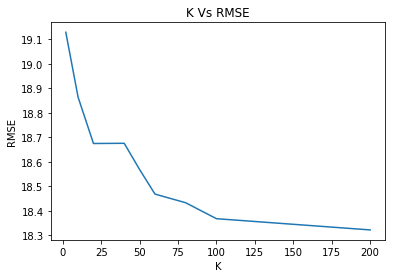

In [40]:
plt.plot([2, 10, 20, 40, 50, 60, 80, 100, 200], [19.12901,18.86376,18.67452,18.67543,18.56843,18.46798,18.43253,18.36743,18.32156])
plt.title('K Vs RMSE')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

# Step 12: Details of the program

In [ ]:
# Name: Amit Hulandageri
# Kaggle handle: Amit Sama
# Student ID: 109336747
# K = 15
# Learning rate:0.0001
# Epoch:5

# Kaggle score: 18.69676